<a href="https://colab.research.google.com/github/edenau/Machine-Learning-Climate-Parameterization/blob/master/main/stage-1/colab/netcdf2csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install xarray using conda

#!pip install xarray
#!pip install netcdf4
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local -c conda-forge xarray dask netCDF4 bottleneck

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

--2019-01-23 13:46:32--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.16.19.10, 104.16.18.10, 2606:4700::6810:120a, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.16.19.10|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: intel-openmp-2018.0.0-hc7b2577_8 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libgfortran-ng-7.2.0-h9f7466a_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: bzip2-1.0.6-h9a117a8_4 ...
installing: expat-2.2.5-he0dffb1_0 ...
installing: gmp-6.1.2-h6c8ec71_1 ...
installing: graphite2-1.3.10-hf63cedd_1 ...
installing: icu-58.2-h9c2bf20_1 ...
installing: jbig-2.

In [3]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, ceil
import seaborn as sns

import xarray as xr
#import tensorflow as tf
print('All packages imported.')

All packages imported.


In [4]:
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Check data
!ls '/content/gdrive/My Drive/Colab Notebooks/Parameterization/data/ARM/twp-c1/twparmbeatmC1'

twparmbeatmC1.c1.19960101.000000.cdf  twparmbeatmC1.c1.20040101.000000.cdf
twparmbeatmC1.c1.19970101.000000.cdf  twparmbeatmC1.c1.20050101.000000.cdf
twparmbeatmC1.c1.19980101.000000.cdf  twparmbeatmC1.c1.20060101.000000.cdf
twparmbeatmC1.c1.19990101.000000.cdf  twparmbeatmC1.c1.20070101.000000.cdf
twparmbeatmC1.c1.20000101.000000.cdf  twparmbeatmC1.c1.20080101.000000.cdf
twparmbeatmC1.c1.20010101.000000.cdf  twparmbeatmC1.c1.20090101.000000.cdf
twparmbeatmC1.c1.20020101.000000.cdf  twparmbeatmC1.c1.20100101.000000.cdf
twparmbeatmC1.c1.20030101.000000.cdf


In [6]:
# ncdump data

!ncdump -h '/content/gdrive/My Drive/Colab Notebooks/Parameterization/data/ARM/twp-c1/twparmbeatmC1/twparmbeatmC1.c1.19960101.000000.cdf'

netcdf twparmbeatmC1.c1.19960101.000000 {
dimensions:
	time = UNLIMITED ; // (8784 currently)
	range = 2 ;
	p = 37 ;
	z = 512 ;
variables:
	double base_time ;
		base_time:long_name = "Base time in Epoch" ;
		base_time:units = "seconds since 1970-1-1 0:00:00 0:00" ;
		base_time:string = "1996-01-01 00.00, GMT" ;
		base_time:ancillary_variables = "time_offset" ;
	double time_offset(time) ;
		time_offset:long_name = "Time offset from base_time" ;
		time_offset:units = "seconds since 1996-1-1 0:00:00 0:00" ;
		time_offset:bounds = "time_bounds" ;
		time_offset:calendar = "gregorian" ;
		time_offset:ancillary_variables = "base_time" ;
	double time(time) ;
		time:long_name = "Time offset from midnight " ;
		time:units = "seconds since 1996-1-1 0:00:00 0:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
		time:bounds = "time_bounds" ;
		time:standard_name = "time" ;
	double time_bounds(time, range) ;
		time_bounds:long_name = "Time range for the hourly averages, in time offset from mi

In [7]:
# Read data
  
DIR = '/content/gdrive/My Drive/Colab Notebooks/Parameterization/data/ARM/twp-c1/twparmbeatmC1/'
mf = DIR + 'twparmbeatmC1.c1.*.000000.cdf'
DS = xr.open_mfdataset(mf)
DS

<xarray.Dataset>
Dimensions:        (p: 37, range: 2, time: 131496, z: 512)
Coordinates:
  * time           (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
  * p              (p) float32 1000.0 975.0 950.0 925.0 ... 150.0 125.0 100.0
  * z              (z) float32 15.0 60.0 105.0 150.0 ... 22920.0 22965.0 23010.0
    z10            float32 10.0
    z2             float32 2.0
Dimensions without coordinates: range
Data variables:
    base_time      (time) datetime64[ns] 1996-01-01 1996-01-01 ... 2010-01-01
    time_offset    (time) datetime64[ns] dask.array<shape=(131496,), chunksize=(8784,)>
    time_bounds    (time, range) datetime64[ns] dask.array<shape=(131496, 2), chunksize=(8784, 2)>
    time_frac      (time) datetime64[ns] dask.array<shape=(131496,), chunksize=(8784,)>
    p_bounds       (time, p, range) float64 dask.array<shape=(131496, 37, 2), chunksize=(8784, 37, 2)>
    z_bounds       (time, z, range) float64 dask.array<shape=(131496, 512, 2), chunksize=(8784

In [8]:
# Flatten all variables into 1D

da_list = [] # initialize list of DataArray

var_1D = ['T', 'p', 'rh', 'u', 'v', 'prec', 'qc_precip']
for _var in var_1D:
  var_str = _var + '_sfc'
  da_list.append(var_str) # append the variable name string
  exec("{} = DS[var_str]".format(var_str)) # assign DataArray

plev = DS['p'].values.astype(np.int32) # array of pressure level
zlev = DS['z'].values.astype(np.int32) # array of height level
var_2D = ['T', 'Td', 'rh', 'u', 'v'] # array of variables with pressure coord

for _var in var_2D:
  for _p in plev:
    var_str = _var + '_p'
    new_var_str = var_str + str(_p)
    da_list.append(new_var_str) 
    exec("{} = DS[var_str].sel(p=_p).drop('p')".format(new_var_str))
    exec("{} = {}.rename('{}')".format(new_var_str, new_var_str, new_var_str)) # rename data variables to avoid merge collision
  #for _z in zlev:
  #  var_str = _var + '_z'
  #  new_var_str = var_str + str(_z)
  #  da_list.append(new_var_str) 
  #  exec("{} = DS[var_str].sel(z=_z).drop('z')".format(new_var_str)) 
  #  exec("{} = {}.rename('{}')".format(new_var_str, new_var_str, new_var_str))

print('Number of 1D variables= {}'.format(len(da_list)))
da_list

Number of 1D variables= 192


['T_sfc',
 'p_sfc',
 'rh_sfc',
 'u_sfc',
 'v_sfc',
 'prec_sfc',
 'qc_precip_sfc',
 'T_p1000',
 'T_p975',
 'T_p950',
 'T_p925',
 'T_p900',
 'T_p875',
 'T_p850',
 'T_p825',
 'T_p800',
 'T_p775',
 'T_p750',
 'T_p725',
 'T_p700',
 'T_p675',
 'T_p650',
 'T_p625',
 'T_p600',
 'T_p575',
 'T_p550',
 'T_p525',
 'T_p500',
 'T_p475',
 'T_p450',
 'T_p425',
 'T_p400',
 'T_p375',
 'T_p350',
 'T_p325',
 'T_p300',
 'T_p275',
 'T_p250',
 'T_p225',
 'T_p200',
 'T_p175',
 'T_p150',
 'T_p125',
 'T_p100',
 'Td_p1000',
 'Td_p975',
 'Td_p950',
 'Td_p925',
 'Td_p900',
 'Td_p875',
 'Td_p850',
 'Td_p825',
 'Td_p800',
 'Td_p775',
 'Td_p750',
 'Td_p725',
 'Td_p700',
 'Td_p675',
 'Td_p650',
 'Td_p625',
 'Td_p600',
 'Td_p575',
 'Td_p550',
 'Td_p525',
 'Td_p500',
 'Td_p475',
 'Td_p450',
 'Td_p425',
 'Td_p400',
 'Td_p375',
 'Td_p350',
 'Td_p325',
 'Td_p300',
 'Td_p275',
 'Td_p250',
 'Td_p225',
 'Td_p200',
 'Td_p175',
 'Td_p150',
 'Td_p125',
 'Td_p100',
 'rh_p1000',
 'rh_p975',
 'rh_p950',
 'rh_p925',
 'rh_p900',
 'rh

In [9]:
# Merge DataArray and Build a new DataSet

DS_flattened = xr.Dataset()
for _var in da_list:
  exec("DS_flattened = xr.merge([DS_flattened,{}])".format(_var))
  
DS_flattened = DS_flattened.drop(['z10', 'z2'])
DS_flattened

<xarray.Dataset>
Dimensions:        (time: 131496)
Coordinates:
  * time           (time) datetime64[ns] 1996-01-01T00:30:00 ... 2010-12-31T23:30:00
Data variables:
    T_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    p_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    rh_sfc         (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    u_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    v_sfc          (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    prec_sfc       (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    qc_precip_sfc  (time) float32 dask.array<shape=(131496,), chunksize=(87672,)>
    T_p1000        (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p975         (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p950         (time) float32 dask.array<shape=(131496,), chunksize=(8784,)>
    T_p925         (time

In [10]:
# Convert DataSet to dataframe

df = DS_flattened.to_dataframe().reset_index() # convert index (time) to a column

df

time  T_sfc  p_sfc  rh_sfc  u_sfc  v_sfc  prec_sfc  \
0      1996-01-01 00:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
1      1996-01-01 01:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
2      1996-01-01 02:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
3      1996-01-01 03:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
4      1996-01-01 04:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
5      1996-01-01 05:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
6      1996-01-01 06:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
7      1996-01-01 07:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
8      1996-01-01 08:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
9      1996-01-01 09:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
10     1996-01-01 10:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
11     1996-01-01 11:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
12     1996-01-01 12:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
13     1996-01-01 13:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
14     1996-01-01 14:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
15     1996-01-01 15:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
16     1996-01-01 16:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
17     1996-01-01 17:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
18     1996-01-01 18:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
19     1996-01-01 19:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
20     1996-01-01 20:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
21     1996-01-01 21:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
22     1996-01-01 22:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
23     1996-01-01 23:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
24     1996-01-02 00:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
25     1996-01-02 01:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
26     1996-01-02 02:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
27     1996-01-02 03:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
28     1996-01-02 04:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
29     1996-01-02 05:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
...                    ...    ...    ...     ...    ...    ...       ...   
131466 2010-12-30 18:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131467 2010-12-30 19:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131468 2010-12-30 20:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131469 2010-12-30 21:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131470 2010-12-30 22:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131471 2010-12-30 23:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131472 2010-12-31 00:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131473 2010-12-31 01:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131474 2010-12-31 02:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131475 2010-12-31 03:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131476 2010-12-31 04:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131477 2010-12-31 05:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131478 2010-12-31 06:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131479 2010-12-31 07:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131480 2010-12-31 08:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131481 2010-12-31 09:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131482 2010-12-31 10:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131483 2010-12-31 11:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131484 2010-12-31 12:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131485 2010-12-31 13:30:00    NaN    NaN     NaN    NaN    NaN       NaN   
131486 2010-12-31 14:30:00    NaN    NaN     NaN    NaN    NaN       N

In [0]:
# Save it to .csv

DIR = '/content/gdrive/My Drive/Colab Notebooks/Parameterization/data/stage-1_cleaned/'
f = DIR + 'twparmbeatmC1.csv'

df.to_csv(f)

In [11]:
# Count number of not NaN

(~df.isna()).sum()

time             131496
T_sfc             97666
p_sfc             97182
rh_sfc            97167
u_sfc             97667
v_sfc             97667
prec_sfc          97575
qc_precip_sfc         0
T_p1000            7945
T_p975             7932
T_p950             7932
T_p925             7926
T_p900             7920
T_p875             7914
T_p850             7903
T_p825             7901
T_p800             7896
T_p775             7888
T_p750             7881
T_p725             7875
T_p700             7871
T_p675             7864
T_p650             7840
T_p625             7829
T_p600             7822
T_p575             7798
T_p550             7761
T_p525             7734
T_p500             7706
T_p475             7688
                  ...  
v_p825             7052
v_p800             7068
v_p775             7074
v_p750             7078
v_p725             7095
v_p700             7098
v_p675             7096
v_p650             7103
v_p625             7106
v_p600             7108
v_p575          

In [12]:
# Extract columns that we want from df

var_1D = ['T', 'rh', 'u', 'v', 'prec']
var_2D = ['T', 'rh', 'u', 'v']

columns = ['time'] # initialize
for _var in var_1D:
  var_str = _var + '_sfc'
  columns.append(var_str)
for _var in var_2D:
  for _p in plev:
    var_str = _var + '_p' + str(_p)
    columns.append(var_str)
    
df_sel = df[columns]
df_sel

time  T_sfc  rh_sfc  u_sfc  v_sfc  prec_sfc     T_p1000  \
0      1996-01-01 00:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
1      1996-01-01 01:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
2      1996-01-01 02:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
3      1996-01-01 03:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
4      1996-01-01 04:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
5      1996-01-01 05:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
6      1996-01-01 06:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
7      1996-01-01 07:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
8      1996-01-01 08:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
9      1996-01-01 09:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
10     1996-01-01 10:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
11     1996-01-01 11:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
12     1996-01-01 12:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
13     1996-01-01 13:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
14     1996-01-01 14:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
15     1996-01-01 15:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
16     1996-01-01 16:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
17     1996-01-01 17:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
18     1996-01-01 18:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
19     1996-01-01 19:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
20     1996-01-01 20:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
21     1996-01-01 21:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
22     1996-01-01 22:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
23     1996-01-01 23:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
24     1996-01-02 00:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
25     1996-01-02 01:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
26     1996-01-02 02:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
27     1996-01-02 03:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
28     1996-01-02 04:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
29     1996-01-02 05:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
...                    ...    ...     ...    ...    ...       ...         ...   
131466 2010-12-30 18:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131467 2010-12-30 19:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131468 2010-12-30 20:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131469 2010-12-30 21:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131470 2010-12-30 22:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131471 2010-12-30 23:30:00    NaN     NaN    NaN    NaN       NaN  300.967621   
131472 2010-12-31 00:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131473 2010-12-31 01:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131474 2010-12-31 02:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131475 2010-12-31 03:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131476 2010-12-31 04:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131477 2010-12-31 05:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131478 2010-12-31 06:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131479 2010-12-31 07:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131480 2010-12-31 08:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131481 2010-12-31 09:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131482 2010-12-31 10:30:00    NaN     NaN    NaN    NaN       NaN         NaN   
131483 2010-12-31 11:30:00    NaN     NaN    NaN    N

In [13]:
# Find time difference between consecutive entries

hour_delta = df_sel['time'].astype(np.int64).rolling(window=2).apply(lambda j: j[1] - j[0]) / 10**9 / 3600
for _hd in range(1,24+1):
  _cnt = hour_delta[hour_delta==_hd].count()
  if _cnt > 0:
    print('hour_delta= {}, count= {}'.format(_hd,_cnt))

hour_delta= 1, count= 131495


In [14]:
# Find out the shift of the parameter (column) of interest that maximizes our non-NaN sample size

for shift in range(1,24+1):
  df_shift = df_sel.copy() # deep copy
  prec_sfc_next = df['prec_sfc'][shift:].values # turn to np values to get rid of index
  for j in range(1,shift+1):
    prec_sfc_next = np.append(prec_sfc_next,float('NaN')) # consistent length
  df_shift.insert(loc=0, column='prec_sfc_next', value=prec_sfc_next) # insert the shifted column
  print('#shifted hour= ' + str(shift) + ', sample size= ' + str((~df_shift.isnull().T.any()).sum()))

#shifted hour= 1, sample size= 4808
#shifted hour= 2, sample size= 4809
#shifted hour= 3, sample size= 4807
#shifted hour= 4, sample size= 4806
#shifted hour= 5, sample size= 4806
#shifted hour= 6, sample size= 4804
#shifted hour= 7, sample size= 4803
#shifted hour= 8, sample size= 4802
#shifted hour= 9, sample size= 4803
#shifted hour= 10, sample size= 4802
#shifted hour= 11, sample size= 4804
#shifted hour= 12, sample size= 4801
#shifted hour= 13, sample size= 4798
#shifted hour= 14, sample size= 4797
#shifted hour= 15, sample size= 4796
#shifted hour= 16, sample size= 4796
#shifted hour= 17, sample size= 4796
#shifted hour= 18, sample size= 4796
#shifted hour= 19, sample size= 4795
#shifted hour= 20, sample size= 4792
#shifted hour= 21, sample size= 4793
#shifted hour= 22, sample size= 4793
#shifted hour= 23, sample size= 4794
#shifted hour= 24, sample size= 4790


In [14]:
# Decided to take 1-hour shifted precipitation as labels

prec_sfc_1hrlater = df_sel['prec_sfc'][1:].values # ditto
prec_sfc_1hrlater = np.append(prec_sfc_1hrlater,float('NaN')) 
try: # enable re-run
  df_sel.insert(loc=0, column='prec_sfc_1hrlater', value=prec_sfc_1hrlater)
except:
  print('Column prec_sfc_1hrlater has already inserted.')

df_no_nan = df_sel[~df_sel.isnull().T.any()] # delete rows with incomplete data
print('#shifted hour= ' + str(1) + ', sample size= ' + str(len(df_no_nan)) + ', it should match the previous')
df_no_nan

#shifted hour= 1, sample size= 4808, it should match the previous


prec_sfc_1hrlater                time       T_sfc     rh_sfc  \
14524            0.049667 1997-08-28 04:30:00  300.927338  80.570000   
14758            0.050000 1997-09-06 22:30:00  301.035370  72.501755   
14782            0.050492 1997-09-07 22:30:00  301.438141  59.494999   
15046            0.050000 1997-09-18 22:30:00  301.155731  76.859024   
15142            0.050000 1997-09-22 22:30:00  301.063171  78.365570   
15166            0.050000 1997-09-23 22:30:00  301.062683  76.059013   
15214            0.045902 1997-09-25 22:30:00  300.177826  94.581360   
15238            0.050000 1997-09-26 22:30:00  301.300690  81.977051   
15286            0.057627 1997-09-28 22:30:00  301.635284  82.754234   
15382            0.050000 1997-10-02 22:30:00  301.072449  75.645905   
15454            0.050164 1997-10-05 22:30:00  300.527618  80.883598   
15622            0.050000 1997-10-12 22:30:00  300.152985  84.524590   
15646            1.541148 1997-10-13 22:30:00  301.555115  80.047531   
15670            0.047869 1997-10-14 22:30:00  301.924255  77.968857   
15694            0.050000 1997-10-15 22:30:00  301.338684  74.439339   
15766            0.044576 1997-10-18 22:30:00  301.258514  82.645920   
15886            0.049672 1997-10-23 22:30:00  301.979523  76.439346   
15910            0.050000 1997-10-24 22:30:00  301.675537  79.089821   
15934           32.556438 1997-10-25 22:30:00  300.164673  88.190170   
16030            0.050833 1997-10-29 22:30:00  301.893860  76.893219   
16078            0.050000 1997-10-31 22:30:00  301.988678  77.868858   
16102            0.091803 1997-11-01 22:30:00  301.063293  80.611855   
16132            0.050000 1997-11-03 04:30:00  301.723419  77.011482   
16156            0.050000 1997-11-04 04:30:00  301.991486  73.291794   
16174            0.050000 1997-11-04 22:30:00  301.317078  81.027122   
16198            0.050000 1997-11-05 22:30:00  301.727448  82.361023   
16270            0.050656 1997-11-08 22:30:00  301.739014  81.496727   
16294            0.050164 1997-11-09 22:30:00  301.305237  82.729500   
16366            0.056721 1997-11-12 22:30:00  302.025696  81.832802   
16390            0.051148 1997-11-13 22:30:00  301.977692  81.265572   
...                   ...                 ...         ...        ...   
128027           0.000000 2010-08-09 11:30:00  299.944489  87.598358   
128039           0.000000 2010-08-09 23:30:00  301.566803  75.509987   
128051           0.000000 2010-08-10 11:30:00  301.141144  80.098335   
128063           0.000000 2010-08-10 23:30:00  301.830139  78.969994   
128075           0.000000 2010-08-11 11:30:00  298.499512  94.863335   
128087           0.000000 2010-08-11 23:30:00  302.106476  75.443329   
128100           0.000000 2010-08-12 12:30:00  300.304901  81.647522   
128111           0.000000 2010-08-12 23:30:00  301.297821  74.788330   
128123           0.000000 2010-08-13 11:30:00  298.949371  89.001678   
128135           0.000000 2010-08-13 23:30:00  302.068970  76.244987   
128148           0.000000 2010-08-14 12:30:00  300.637390  80.388519   
128159           0.010770 2010-08-14 23:30:00  302.763611  74.613350   
128171           0.000000 2010-08-15 11:30:00  301.467468  75.736664   
128183           0.000770 2010-08-15 23:30:00  304.018005  71.625832   
128207           0.000000 2010-08-16 23:30:00  303.228668  71.428345   
128231           0.000000 2010-08-17 23:30:00  302.267670  77.860016   
128243           0.000000 2010-08-18 11:30:00  301.323883  75.928329   
128255           0.001311 2010-08-18 23:30:00  301.999878  77.598335   
128267           0.000000 2010-08-19 11:30:00  301.225647  79.741661   
128291           0.000000 2010-08-20 11:30:00  301.036346  78.106674   
128303           0.000000 2010-08-20 23:30:00  302.965637  71.579994   
128315           1.021016 2010-08-21 11:30:00  297.961792  96.036659   
128339           0.000000 2010-08-22 11:30:00  300.624847  80.748344   
128351           0.000000 2010-08-22 23:30:00  3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


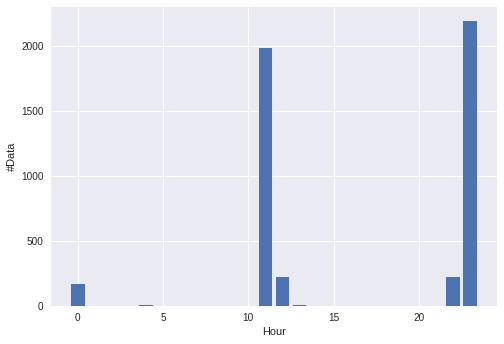

In [15]:
# Check hour imbalance

import datetime as dt

df_no_nan['hour'] = df_no_nan['time'].dt.hour.values
hour_dis = df_no_nan.groupby(['hour']).count().iloc[:,0]

plt.bar(hour_dis.index, hour_dis)
plt.xlabel('Hour')
plt.ylabel('#Data')
plt.show()

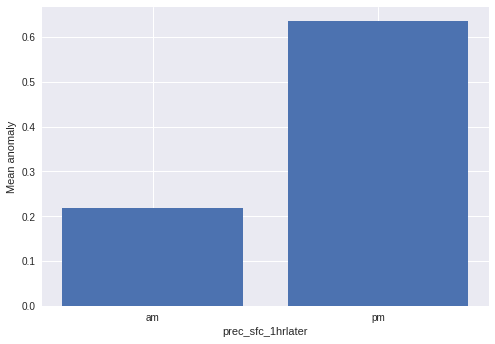

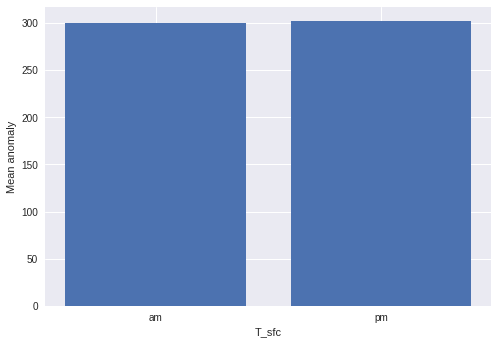

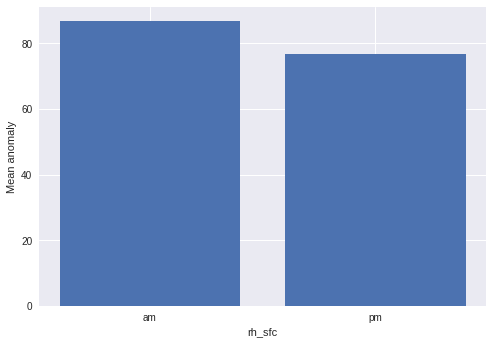

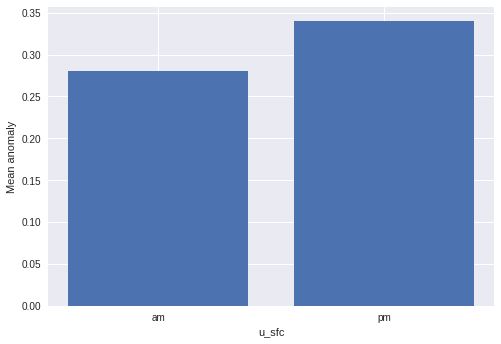

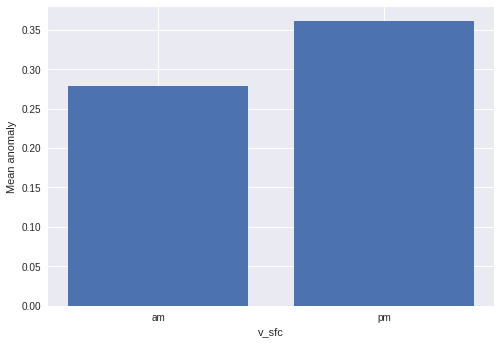

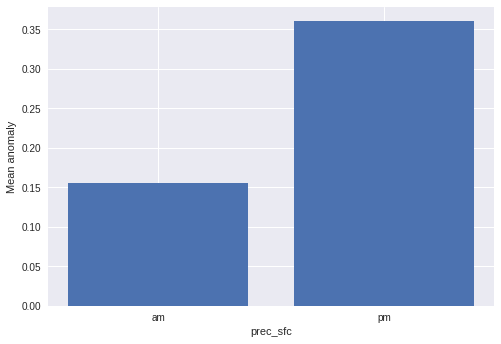

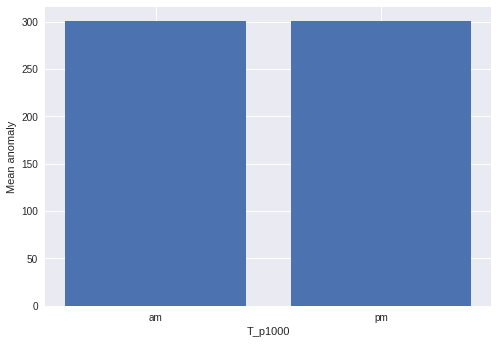

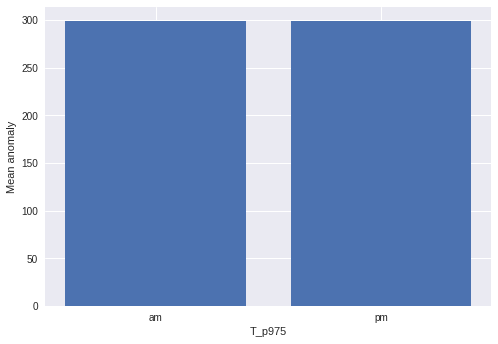

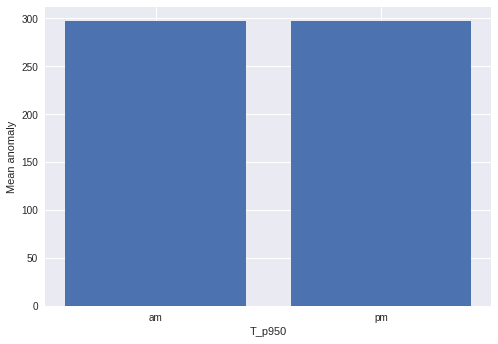

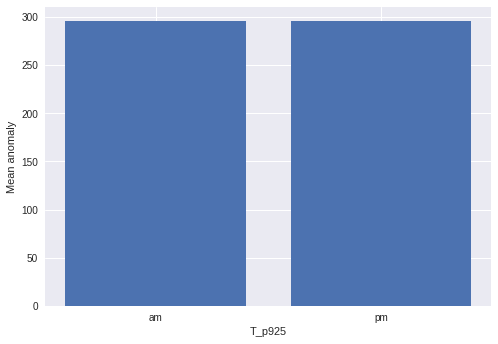

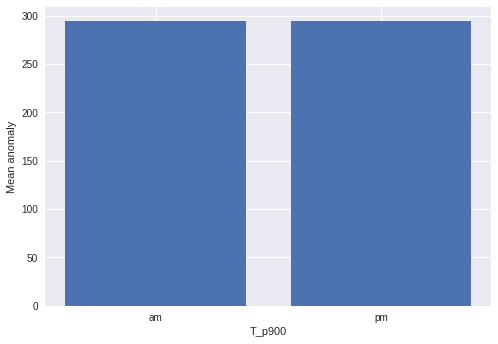

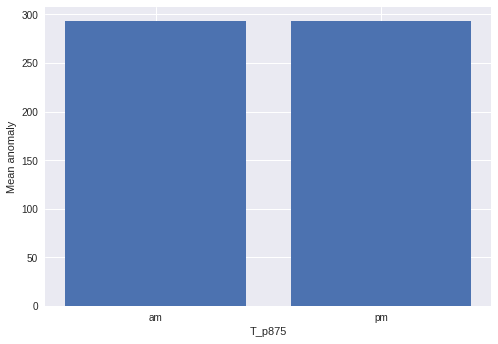

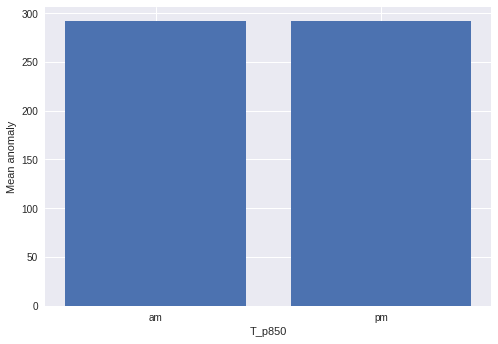

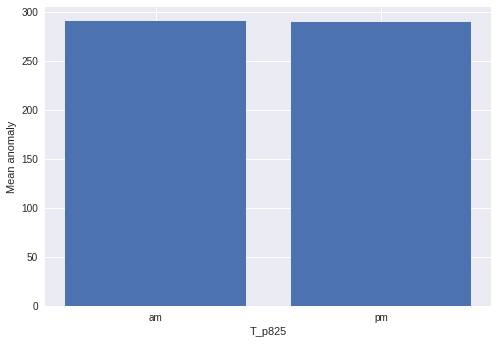

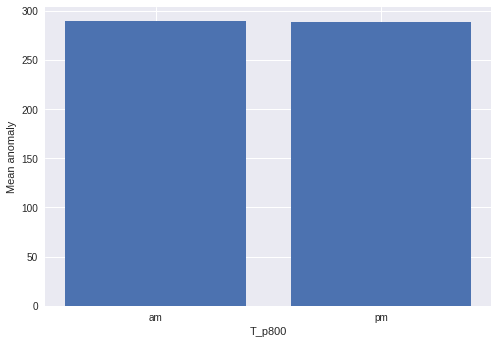

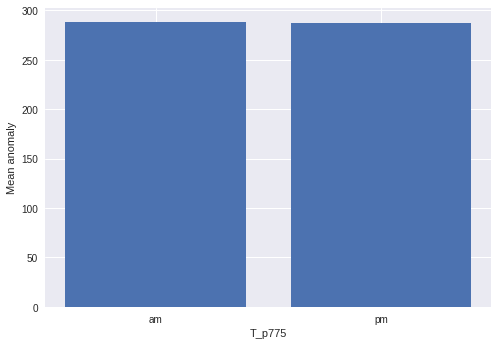

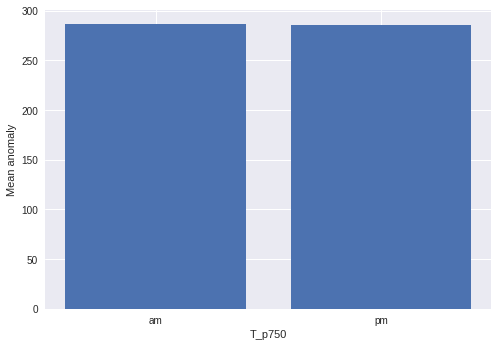

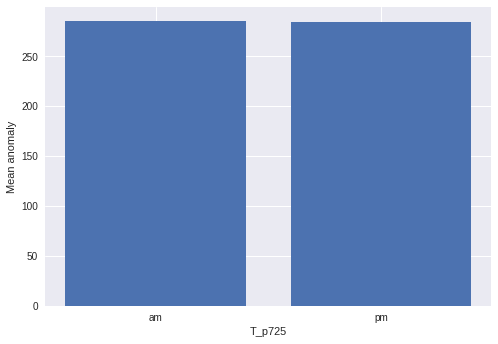

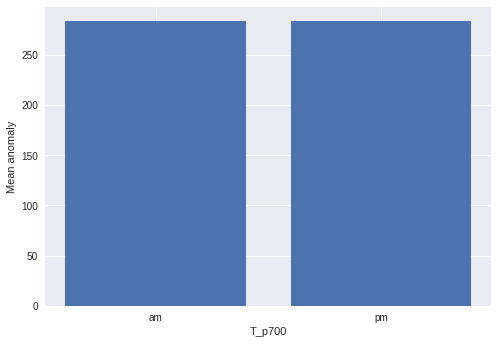

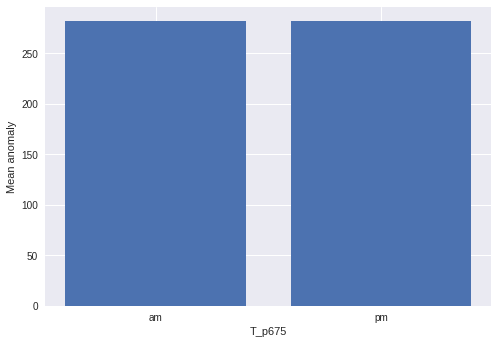

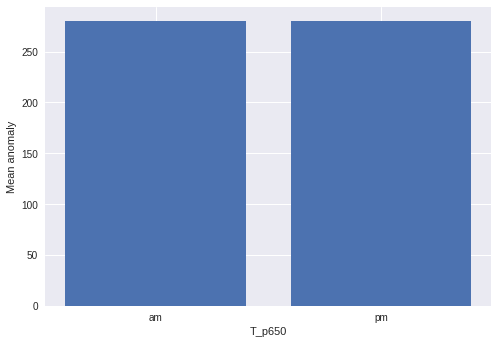

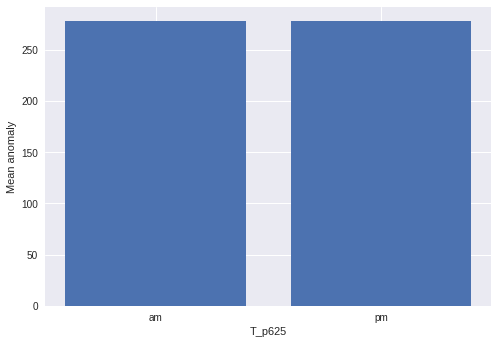

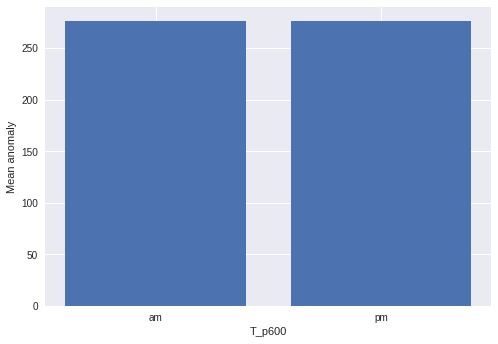

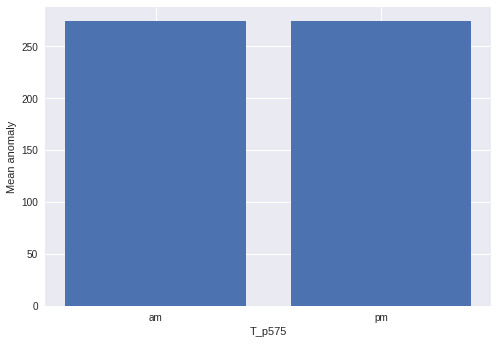

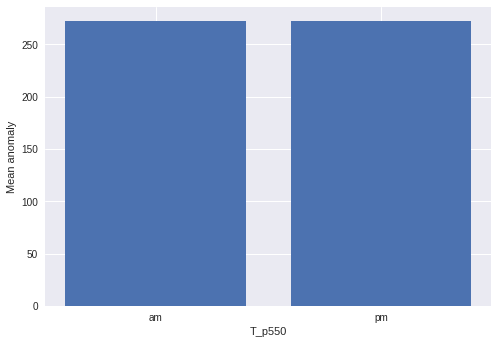

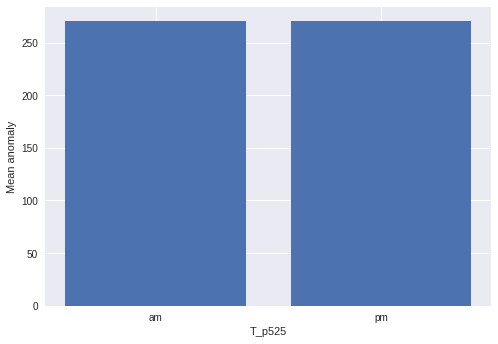

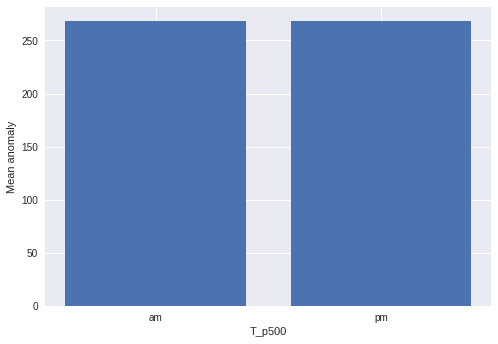

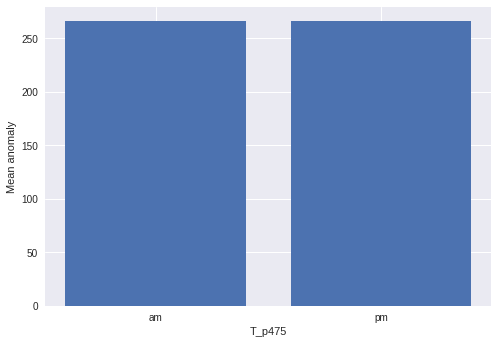

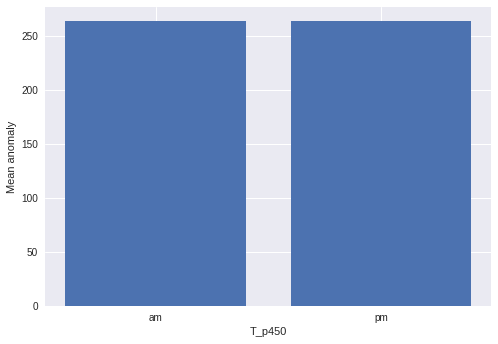

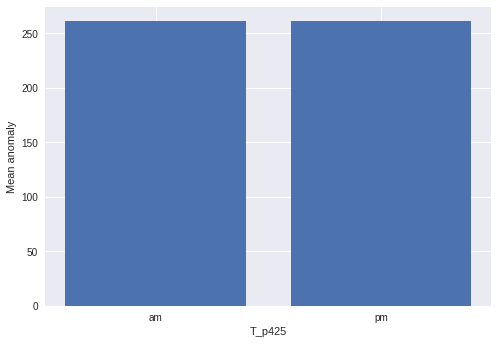

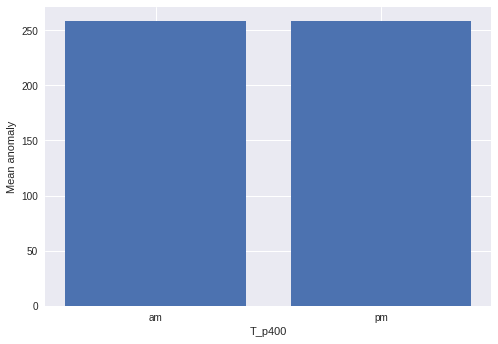

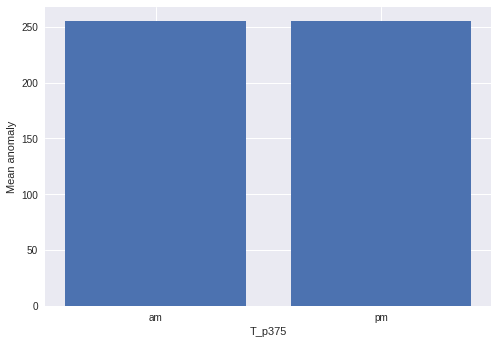

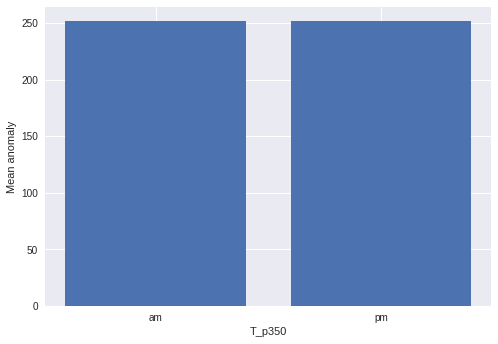

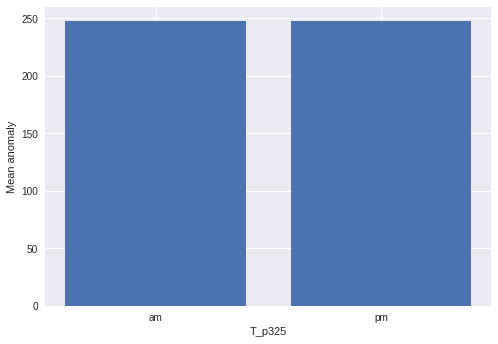

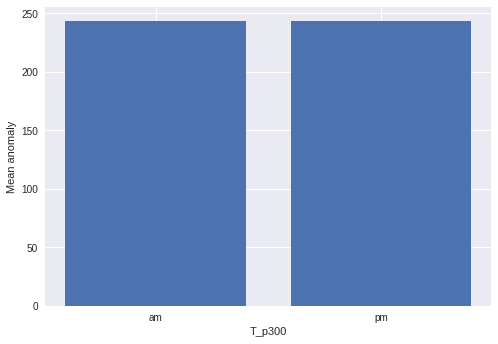

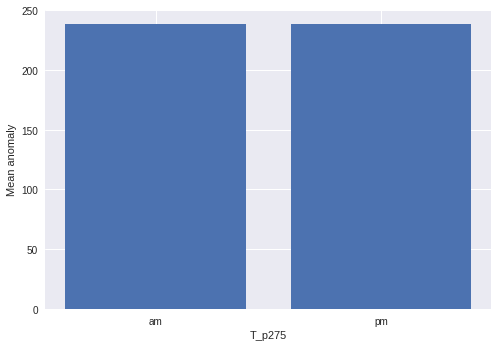

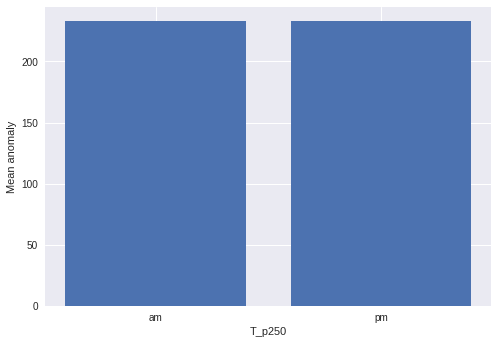

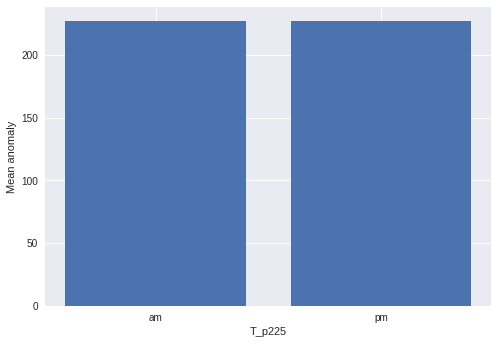

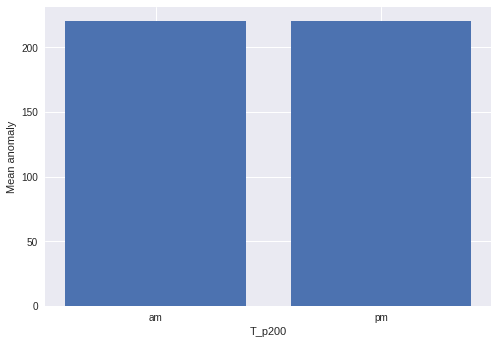

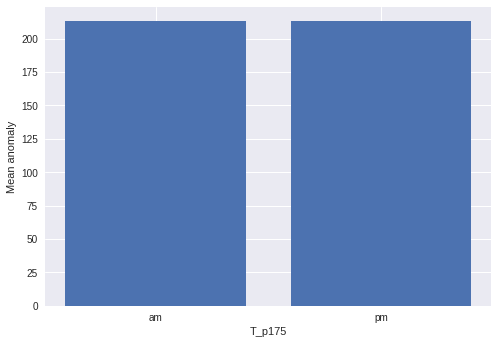

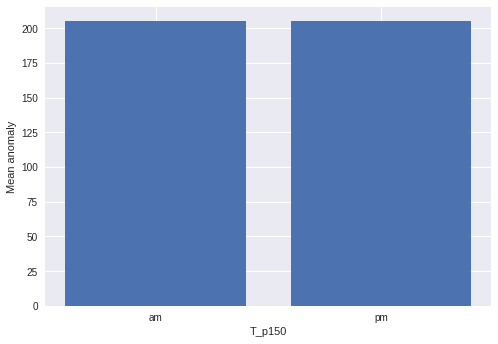

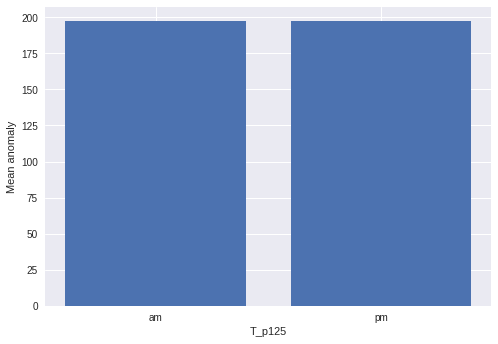

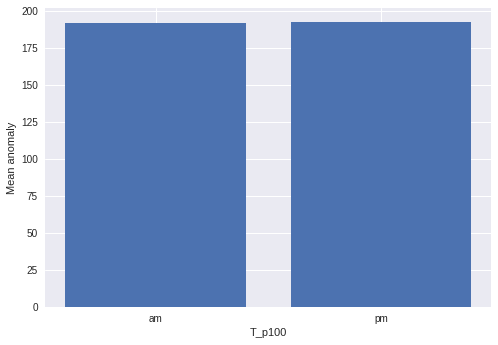

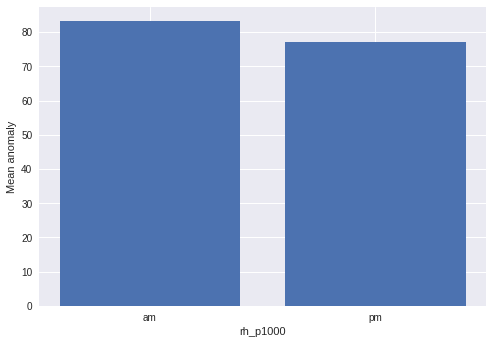

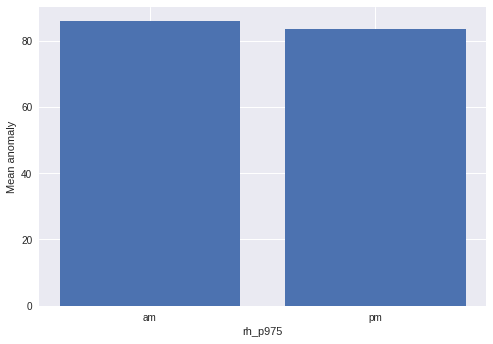

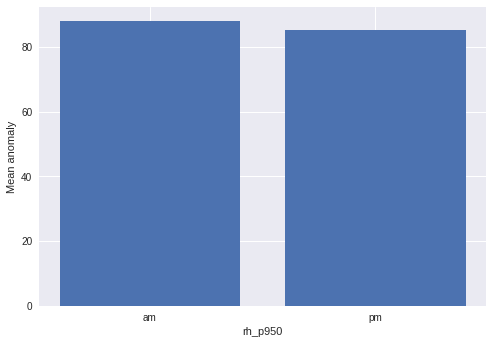

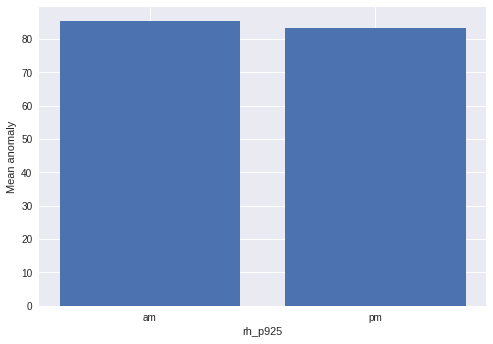

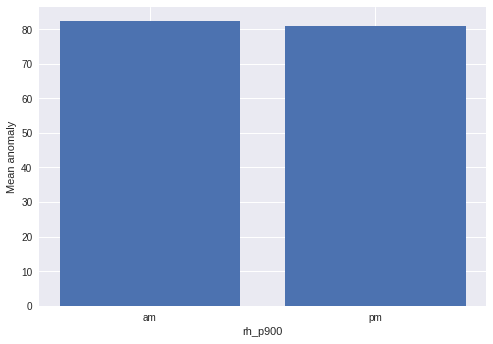

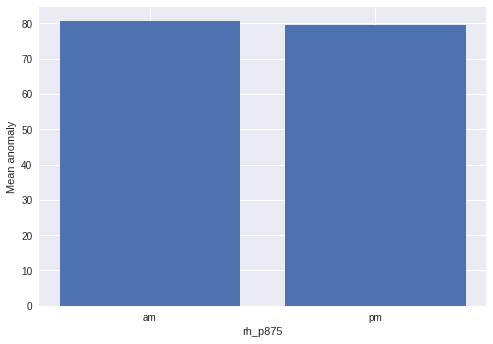

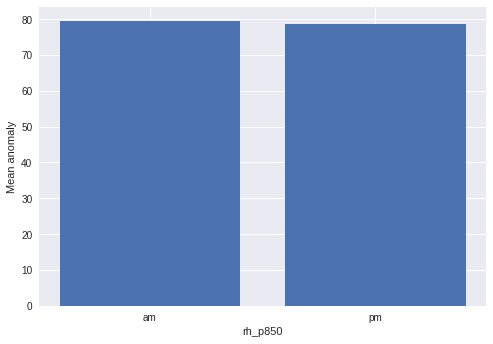

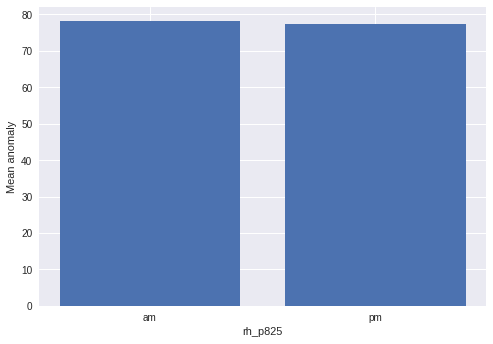

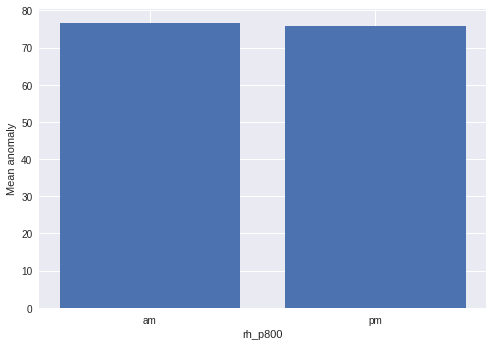

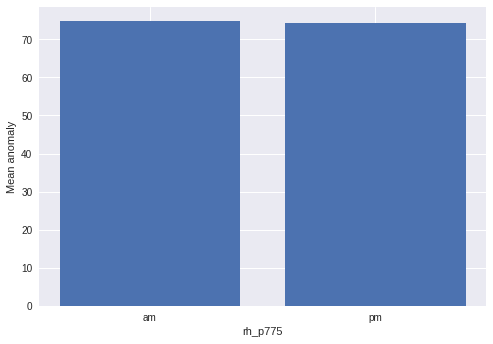

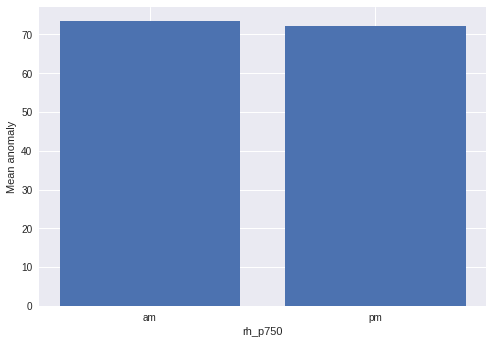

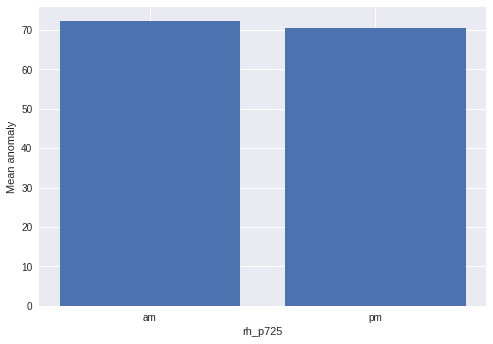

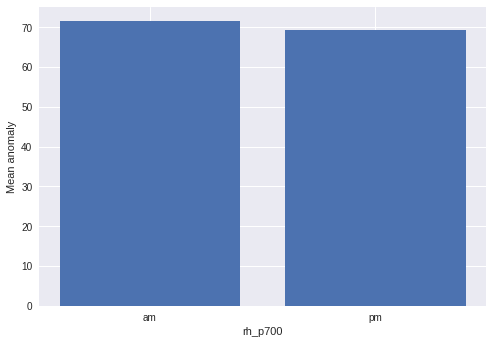

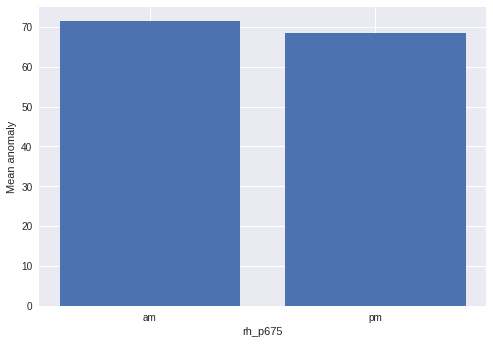

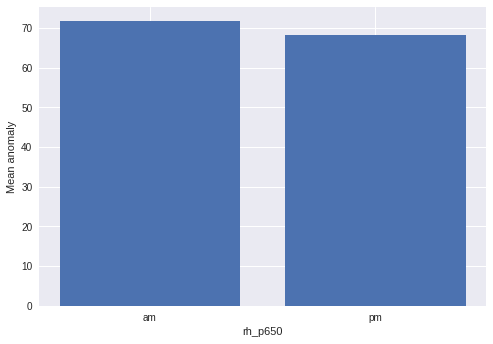

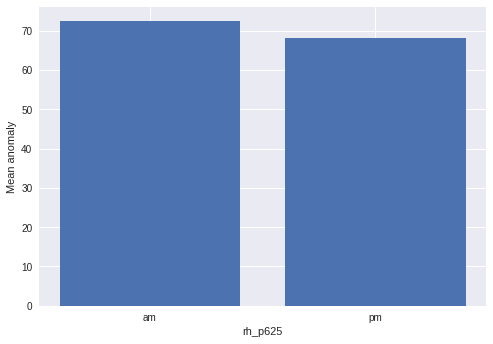

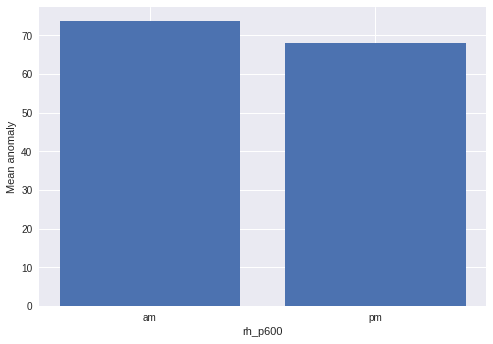

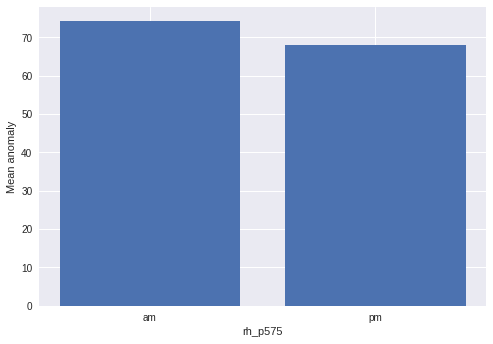

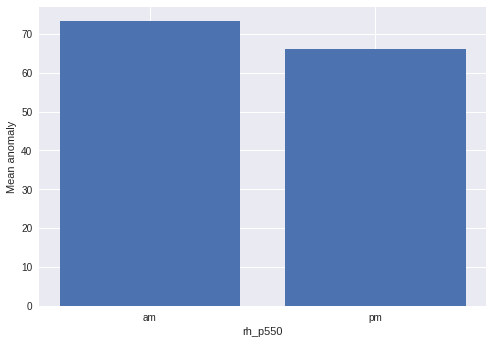

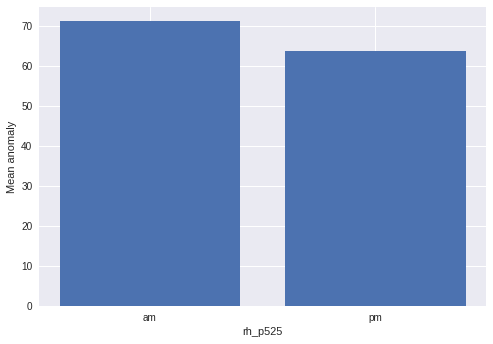

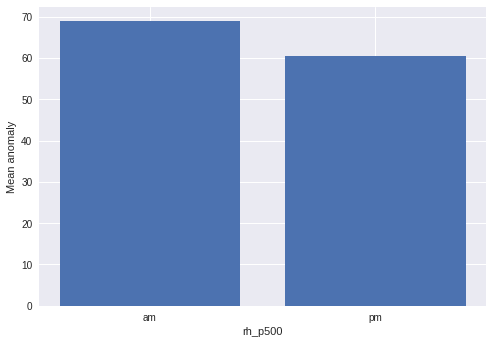

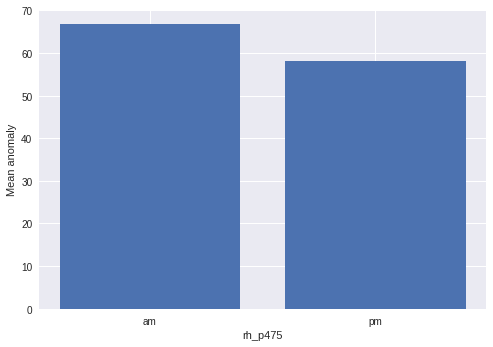

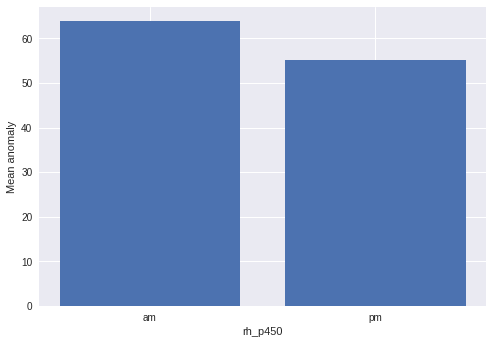

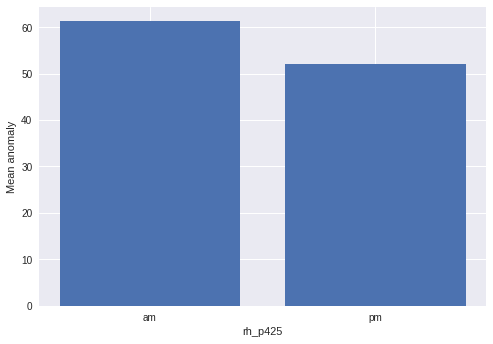

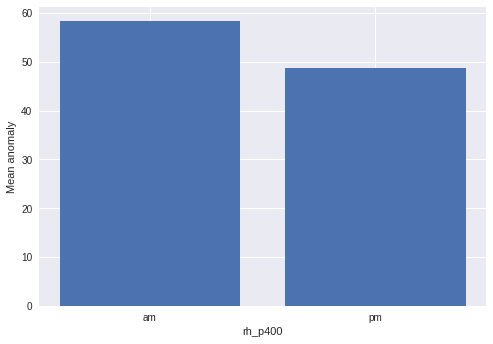

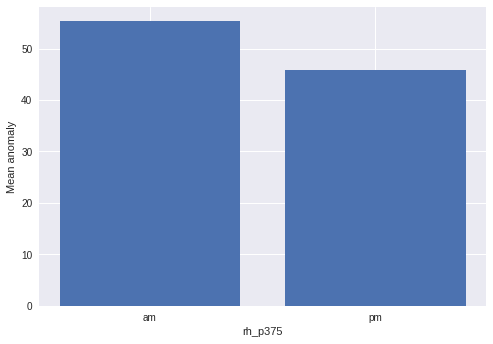

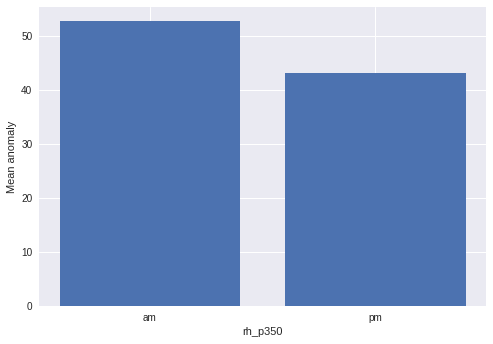

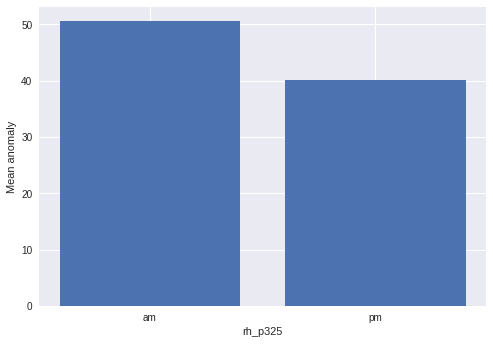

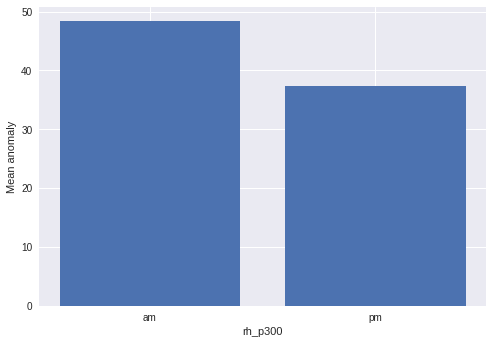

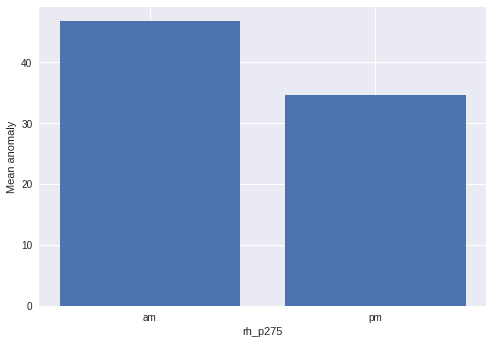

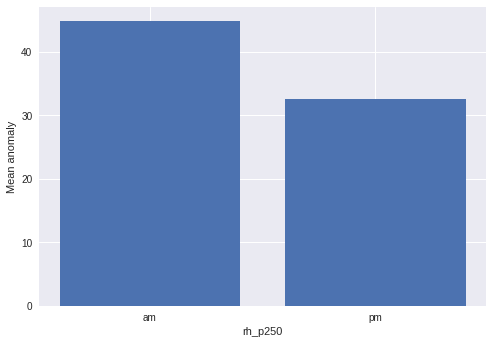

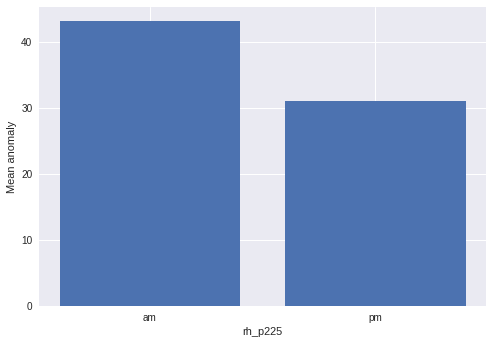

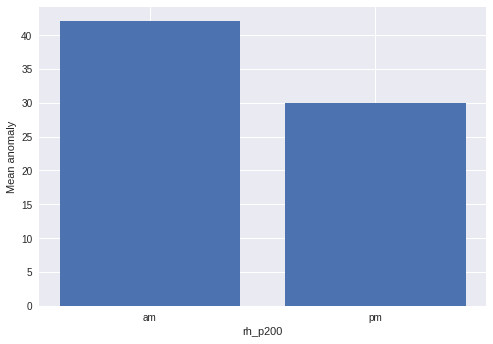

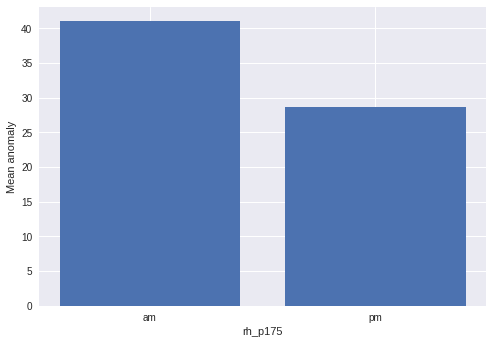

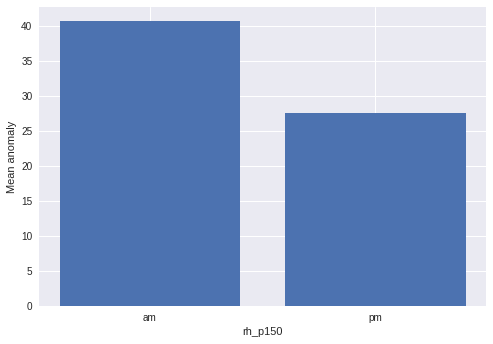

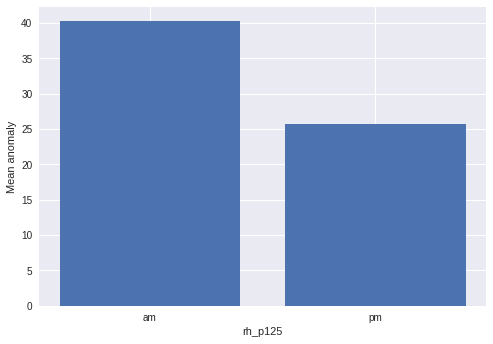

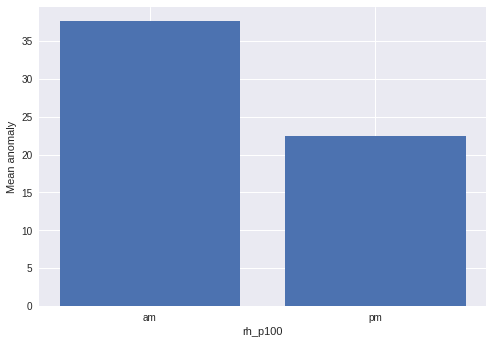

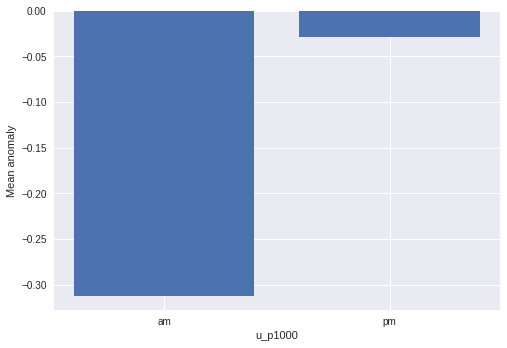

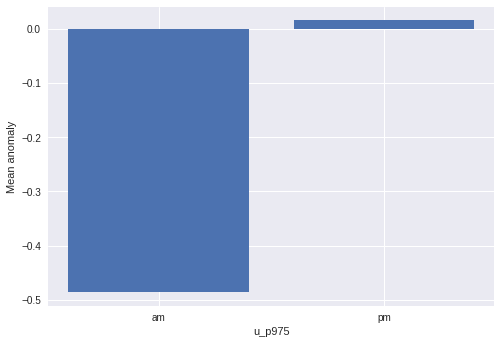

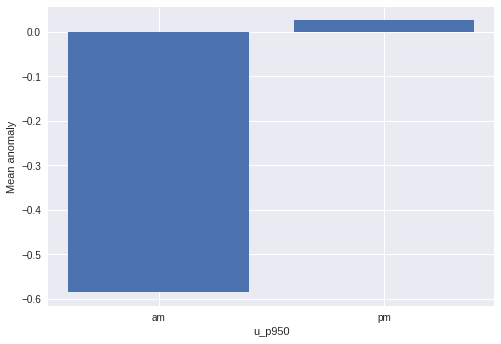

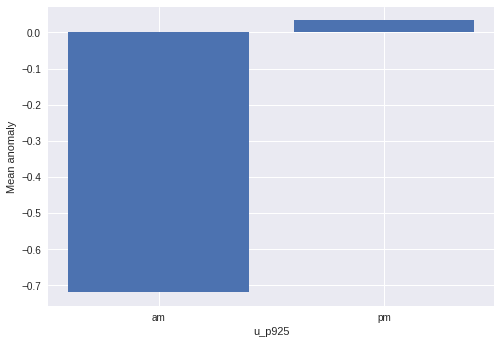

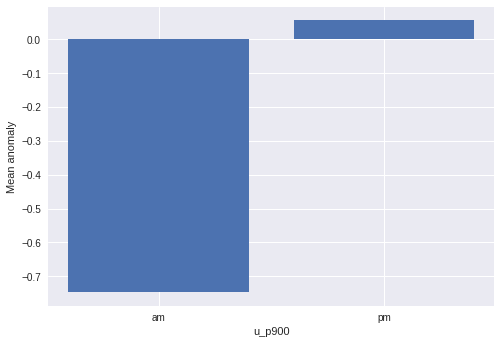

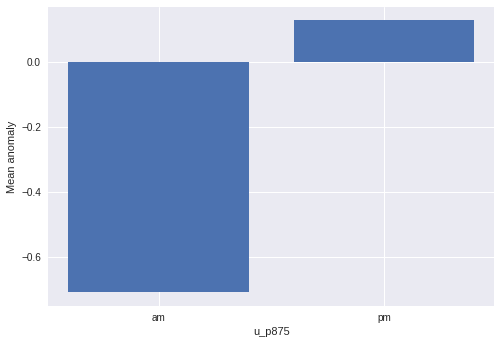

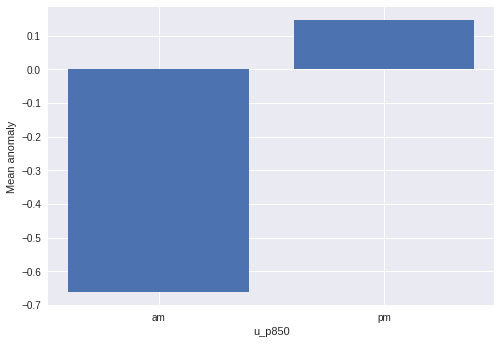

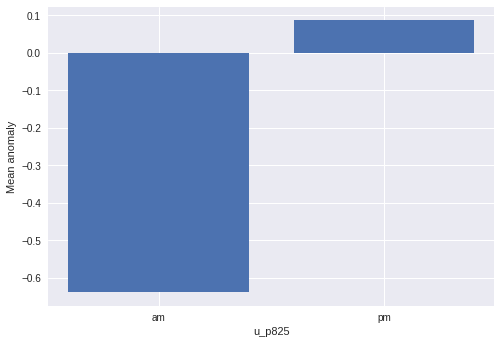

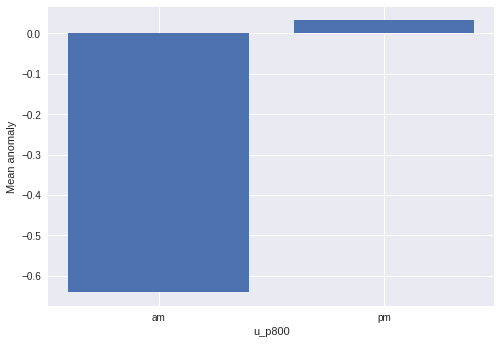

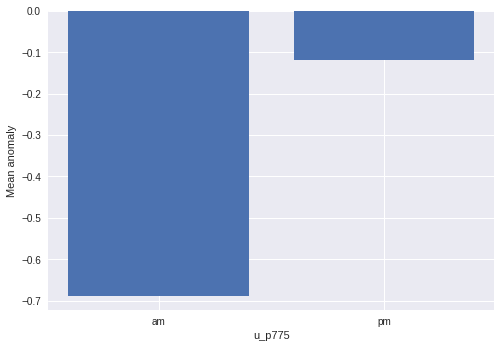

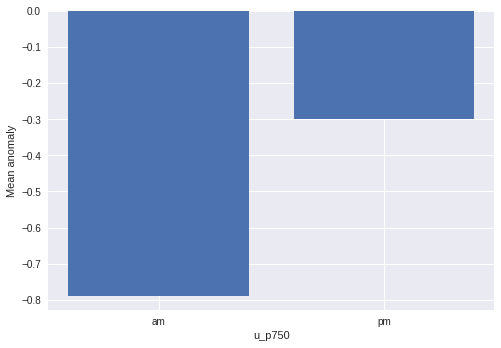

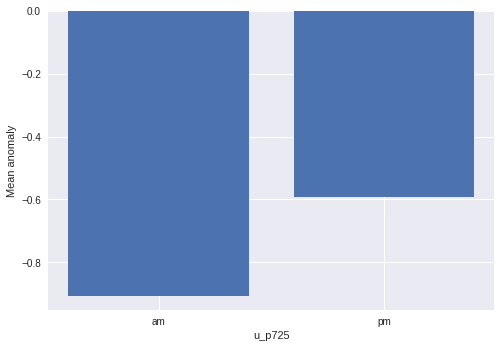

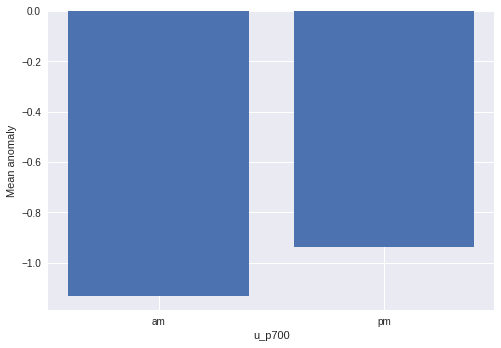

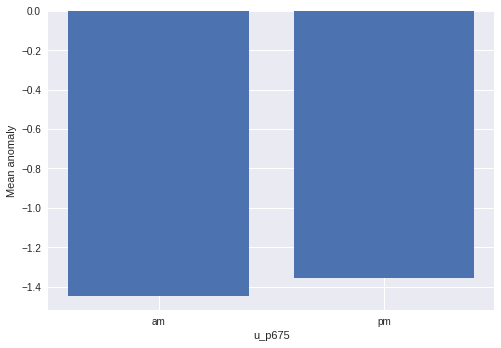

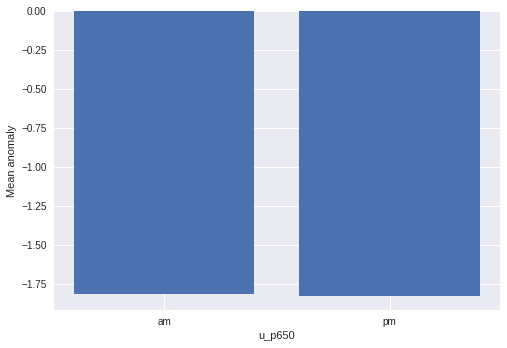

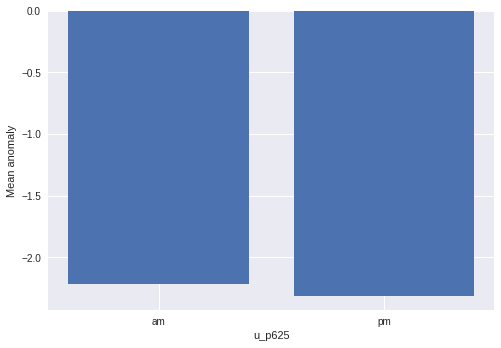

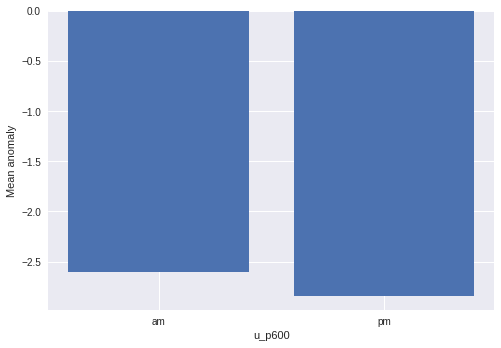

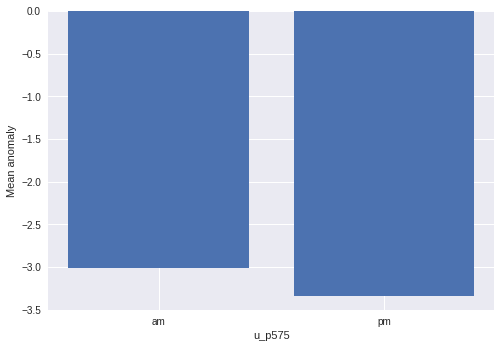

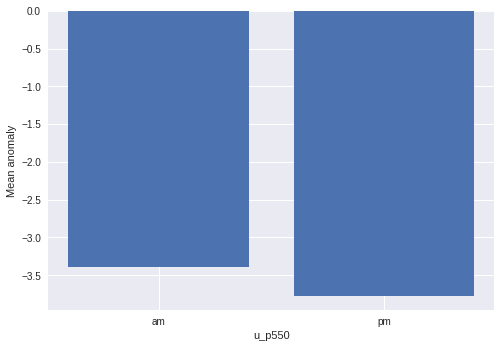

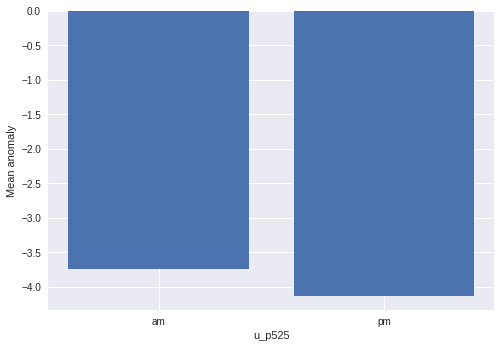

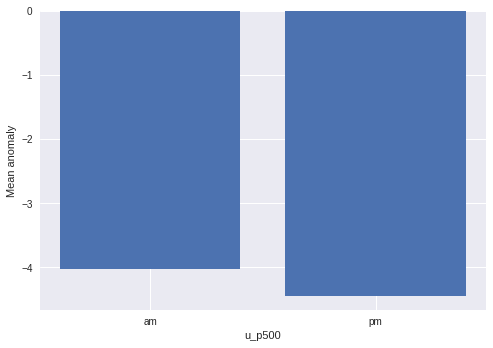

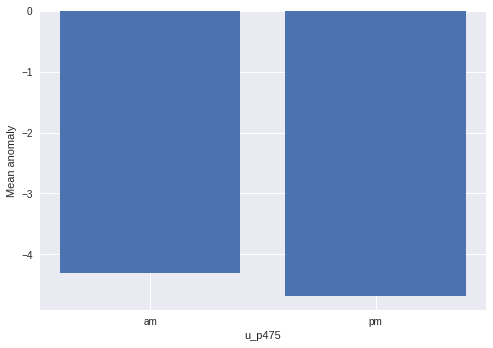

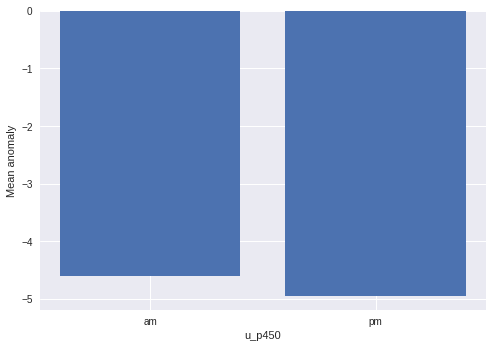

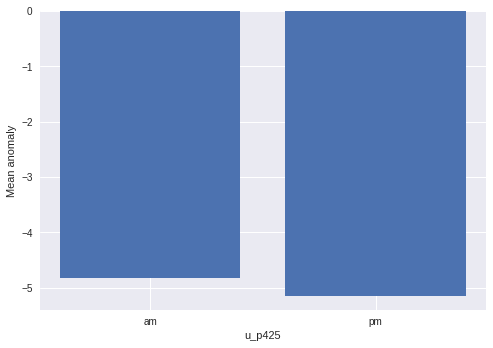

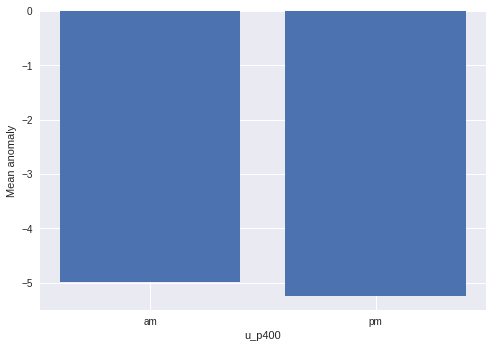

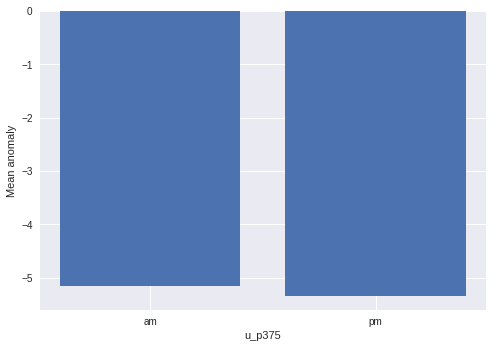

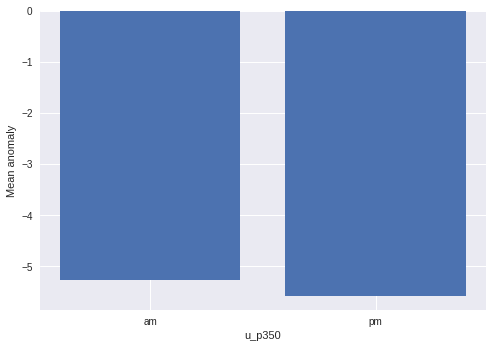

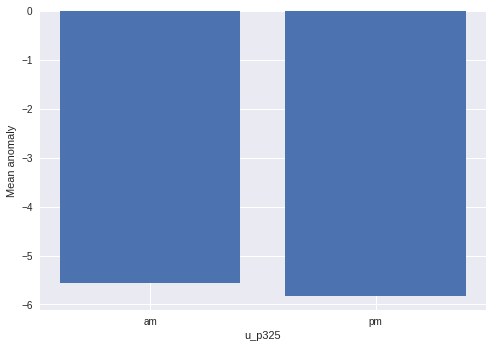

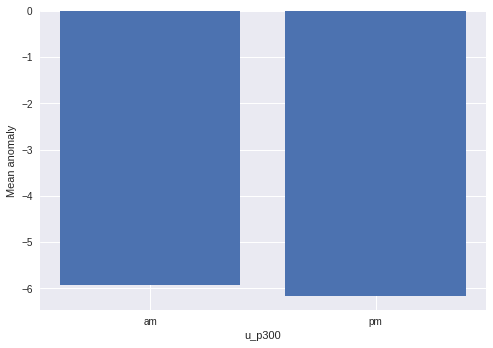

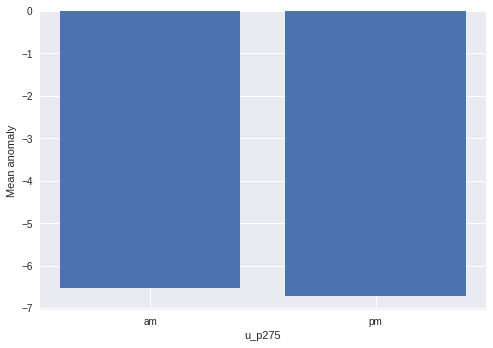

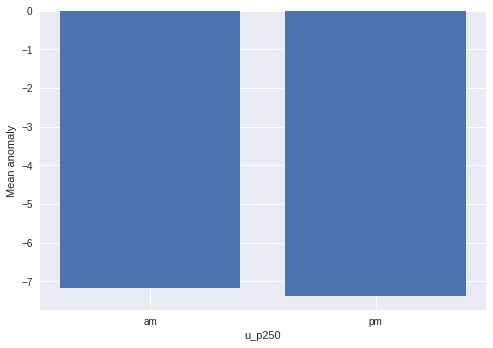

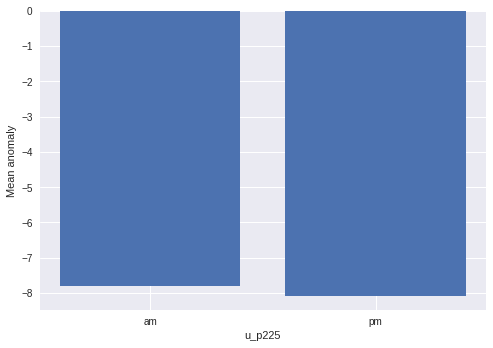

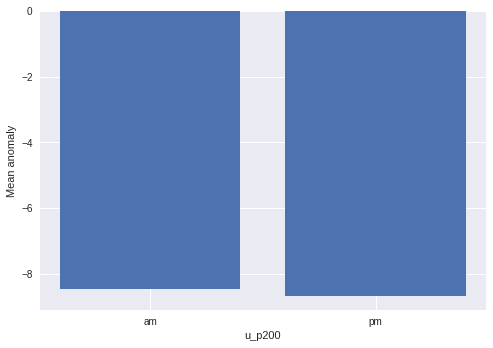

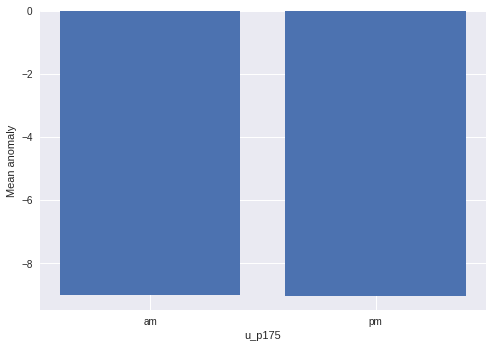

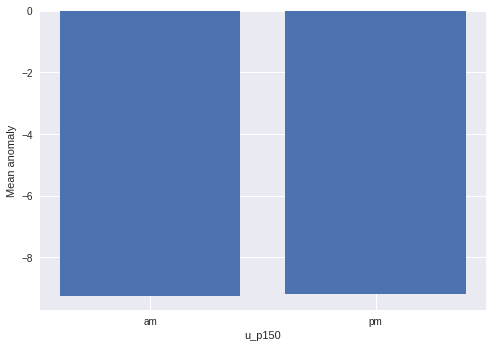

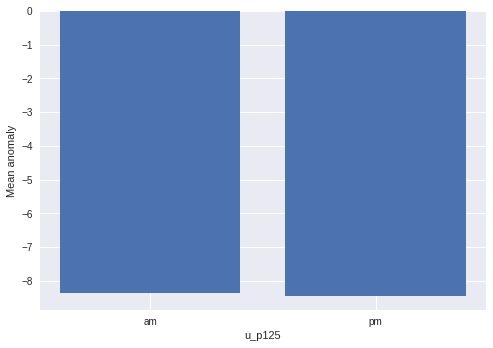

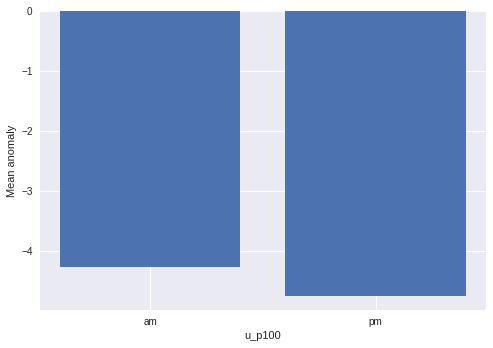

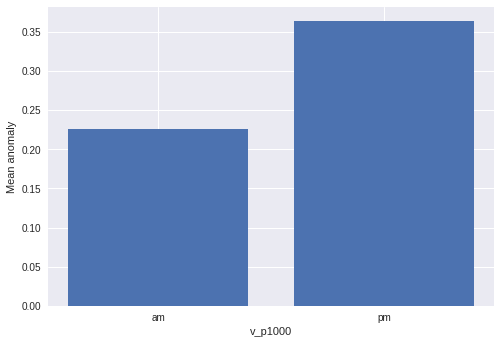

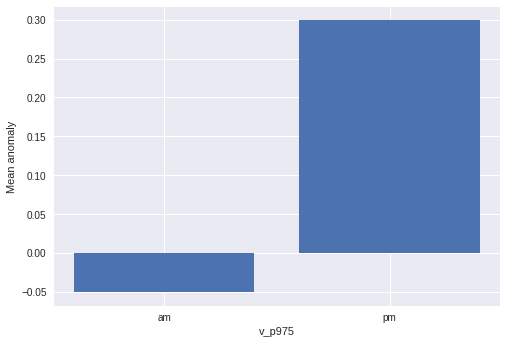

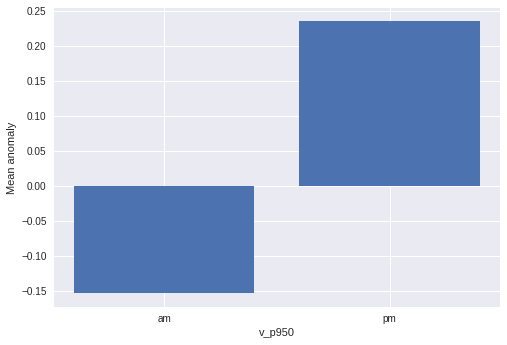

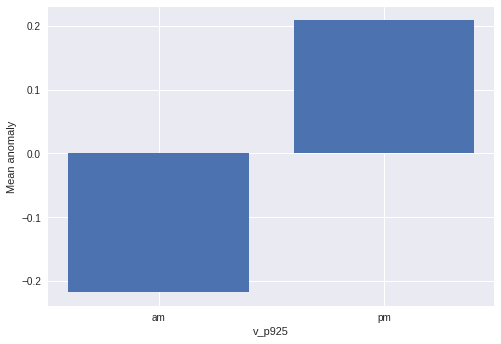

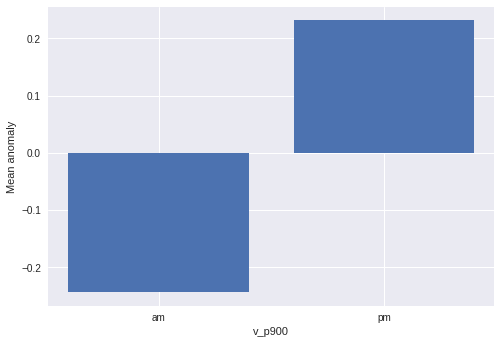

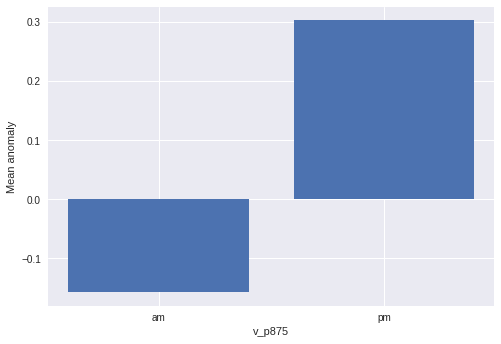

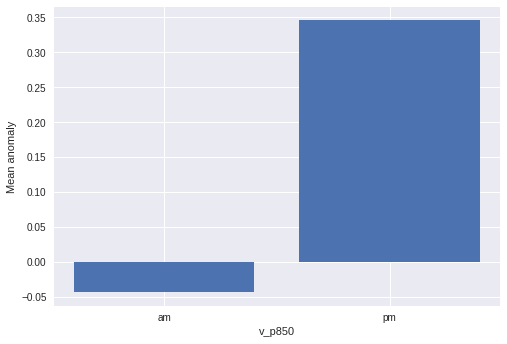

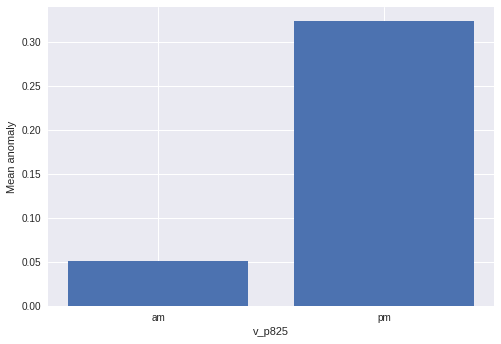

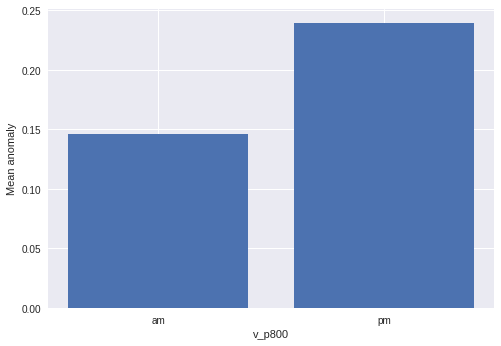

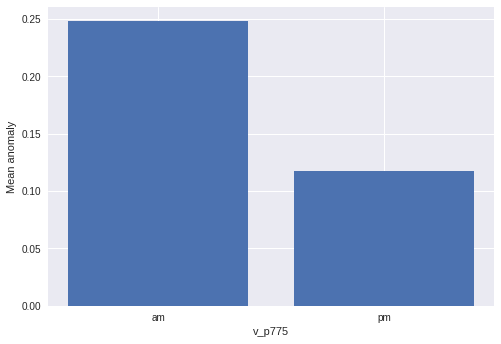

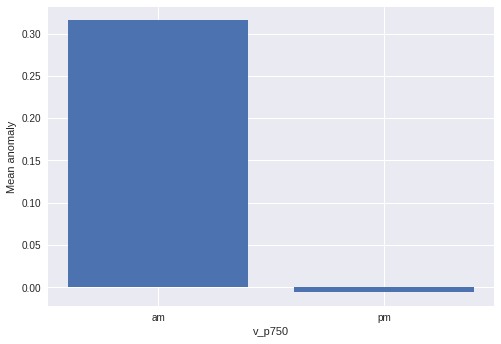

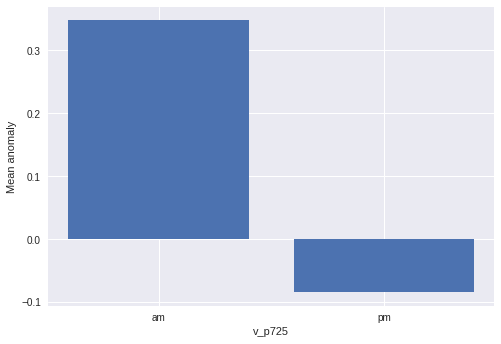

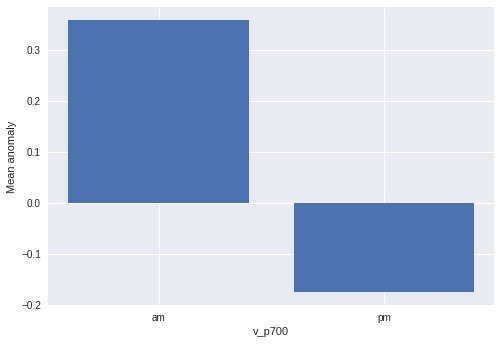

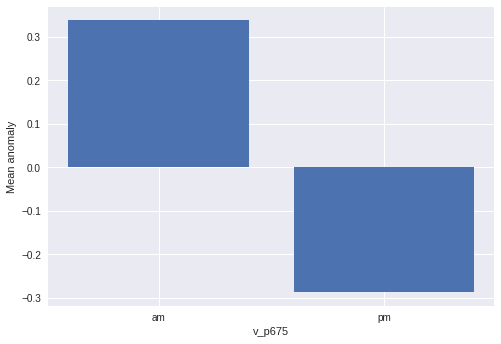

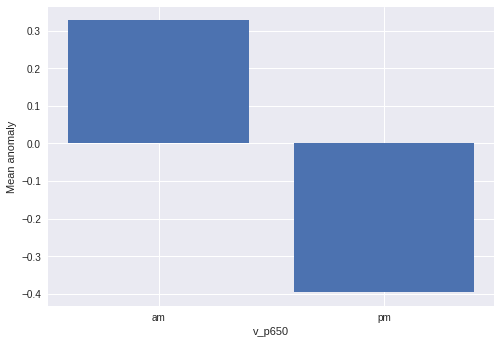

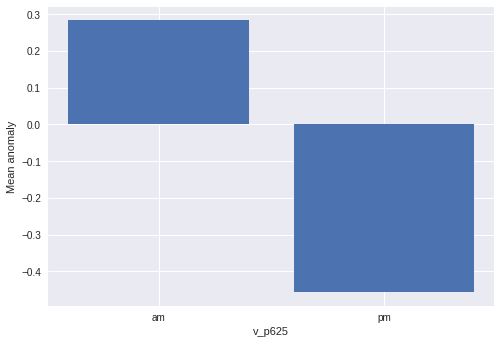

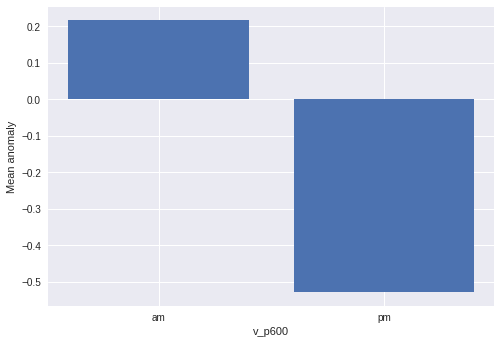

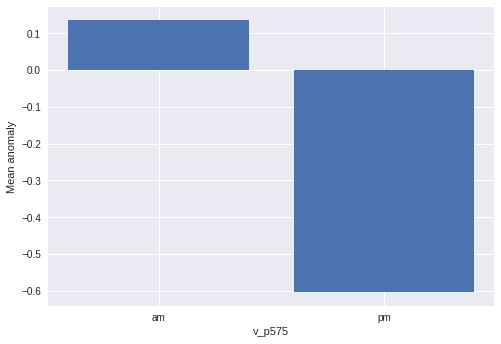

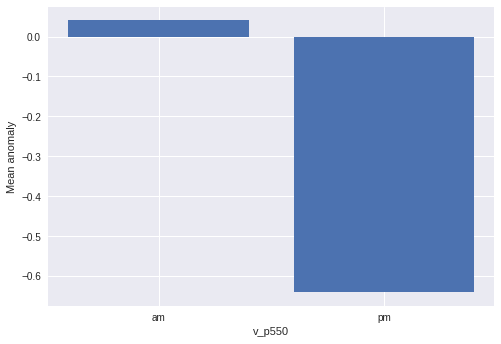

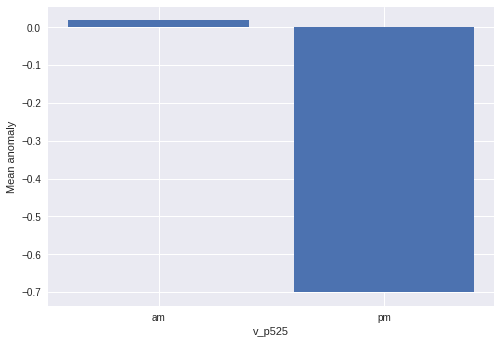

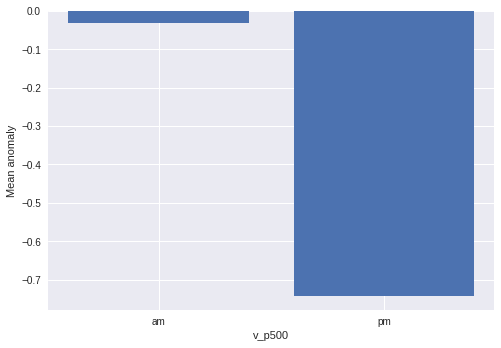

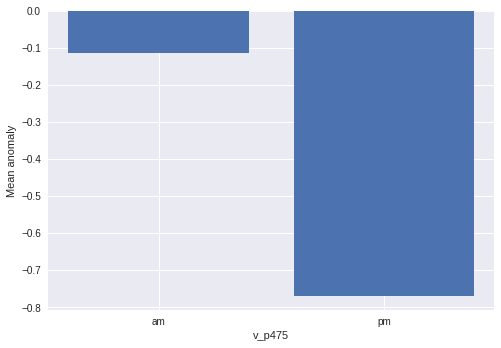

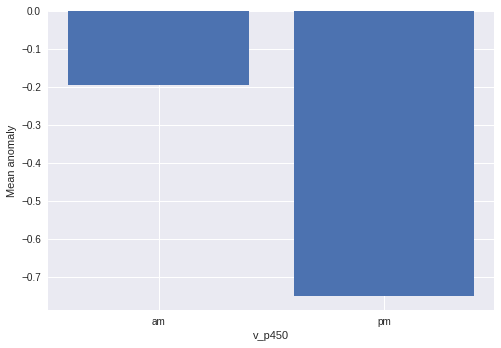

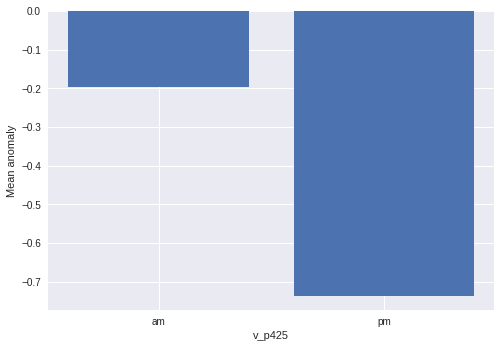

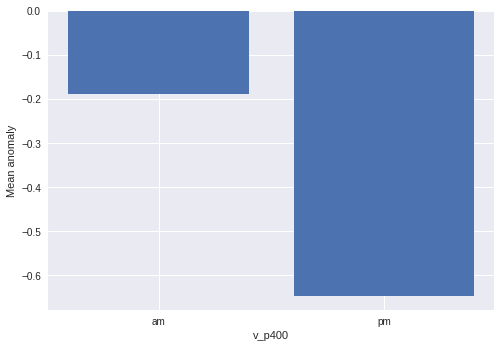

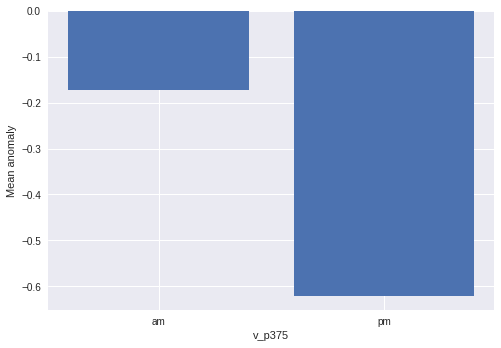

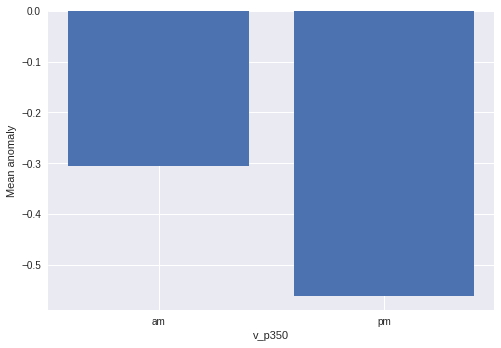

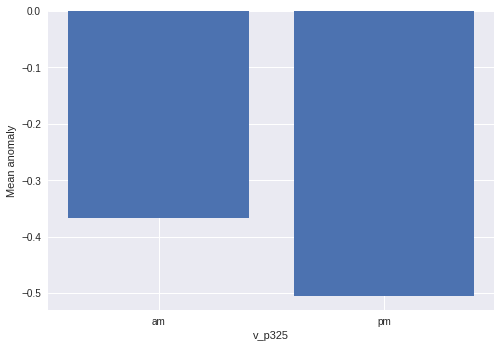

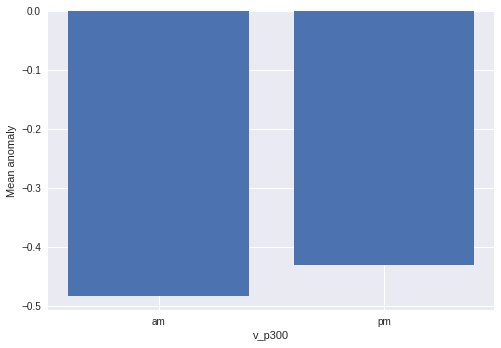

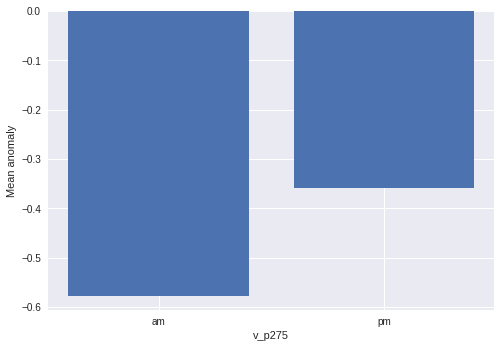

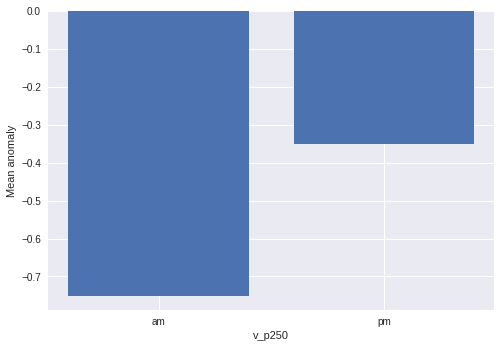

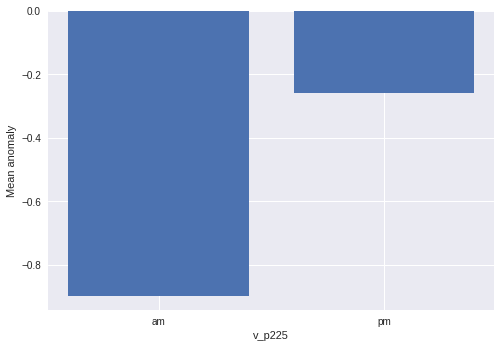

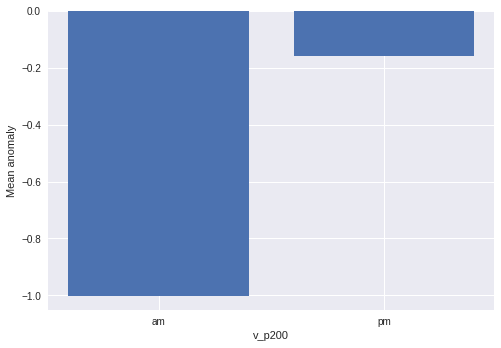

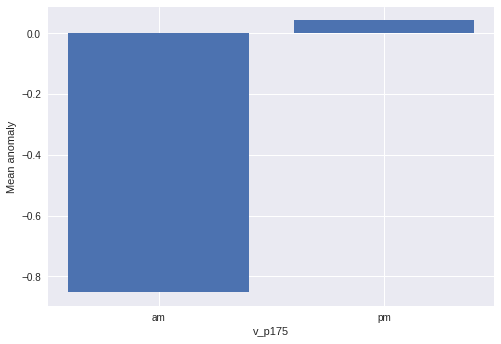

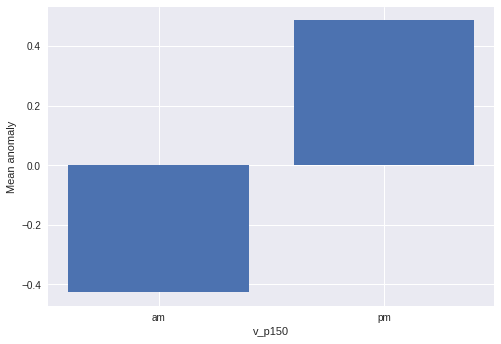

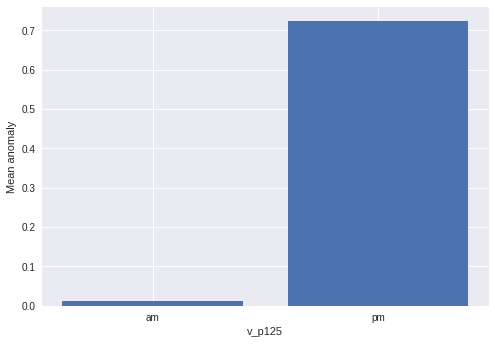

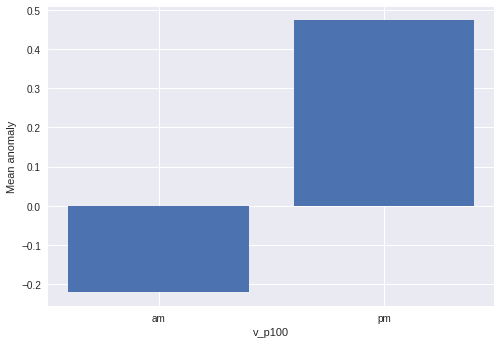

In [16]:
# Visualize hourly variation

df_hourly_mean = df_no_nan.groupby(['hour']).mean()
df_hourly_mean = df_hourly_mean.loc[[11, 23]]

columns = list(df_hourly_mean)

for _col in columns:

  plt.figure()
  plt.bar(['am','pm'], df_hourly_mean[_col])
  plt.xlabel(_col)
  plt.ylabel('Mean anomaly')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


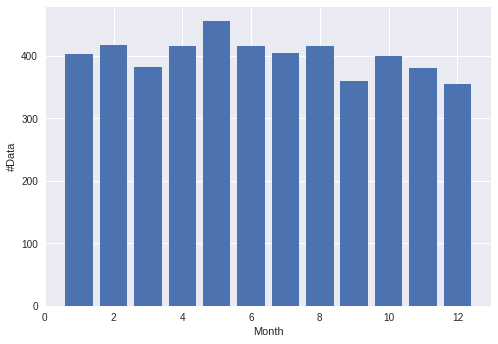

prec_sfc_1hrlater       T_sfc     rh_sfc     u_sfc     v_sfc  prec_sfc  \
month                                                                           
1               0.513418  300.963562  81.882614  1.596116 -1.477279  0.306618   
2               0.436834  300.720184  81.971245  1.078602 -1.476879  0.320894   
3               0.293902  300.560303  82.741447  0.965618 -0.894639  0.293724   
4               0.658431  300.696838  83.811829  0.378612 -0.152128  0.367902   
5               0.521869  300.986847  82.476311 -0.077615  0.415448  0.205417   
6               0.327122  300.883606  81.420486 -0.236259  0.933616  0.215615   
7               0.241947  300.667450  81.179153 -0.503756  1.895624  0.321621   
8               0.334082  300.894012  79.038277 -0.634837  2.123063  0.227716   
9               0.374435  300.610107  80.810776 -0.486093  1.610521  0.402359   
10              0.620817  301.040527  80.250000 -0.174270  1.074619  0.147011   
11              1.005665  300.888702  82.211067  0.451272 -0.031951  0.334490   
12              0.280701  300.957611  82.463890  0.877228 -0.425683  0.190986   

          T_p1000      T_p975      T_p950      T_p925    ...        v_p300  \
month                                                    ...                 
1      300.471039  298.848785  297.215881  295.827057    ...      0.273891   
2      300.454132  298.788025  297.107819  295.719482    ...      0.601285   
3      300.203217  298.598267  296.989136  295.600739    ...     -0.080124   
4      300.264618  298.547729  296.889740  295.505737    ...     -0.143338   
5      300.823853  299.040283  297.332916  295.913910    ...     -0.484787   
6      300.629211  298.852325  297.113708  295.658325    ...     -0.419031   
7      300.389526  298.601868  296.856781  295.415070    ...     -1.327432   
8      300.211639  298.304901  296.527008  295.037292    ...     -0.705069   
9      300.196808  298.372589  296.650787  295.261047    ...     -0.849947   
10     300.544250  298.722473  296.970398  295.502838    ...     -0.742597   
11     300.907104  299.182404  297.479126  296.036896    ...     -0.934829   
12     300.773743  299.100555  297.410217  295.971252    ...      0.060320   

         v_p275    v_p250    v_p225    v_p200    v_p175    v_p150    v_p125  \
month                                                                         
1      0.901385  1.645126  2.452259  3.186809  3.841269  4.112606  2.500660   
2      1.399582  2.123404  2.855788  3.621309  4.271713  3.992352  1.812702   
3      0.460315  0.916358  1.591625  2.188671  2.877894  2.771575  0.994665   
4     -0.070081  0.060192  0.254003  0.444952  0.789362  0.899413  0.677258   
5     -0.538361 -0.644446 -0.829572 -0.749175 -0.382018  0.090500  0.377039   
6     -0.479465 -0.716935 -0.996937 -1.026056 -0.830606 -0.094274  0.815949   
7     -1.586591 -2.038979 -2.547231 -3.025315 -3.370039 -2.852074 -0.681882   
8     -1.552291 -2.431697 -3.107295 -3.844964 -4.475650 -3.414708 -1.014594   
9     -1.538424 -2.210769 -2.896663 -3.755640 -4.328495 -3.387974 -1.092558   
10    -1.395188 -1.985408 -2.548861 -2.916773 -2.740208 -1.748326  0.032459   
11    -0.909840 -0.868848 -0.756723 -0.794859 -0.713187 -0.201864  0.363767   
12     0.407895  0.596137  0.914111  1.344703  1.616148  1.444957  0.988593   

         v_p100       hour  
month                       
1      0.048590  17.284653  
2      0.208449  16.800959  
3      0.148036  16.209424  
4      0.134329  16.201923  
5      1.066099  16.098684  
6      0.800595  16.798077  
7      0.195305  16.530864  
8      0.213202  16.646635  
9     -0.233266  16.783333  
10     0.263733  16.705000  
11    -0.463750  16.931759  
12     0.290315  16.740845  

[12 rows x 155 columns]

In [17]:
# Check month imbalance

df_no_nan['month'] = df_no_nan['time'].dt.month.values
month_dis = df_no_nan.groupby(['month']).count().iloc[:,0]

plt.bar(month_dis.index, month_dis)
plt.xlabel('Month')
plt.ylabel('#Data')
plt.show()

df_monthly_mean = df_no_nan.groupby(['month']).mean()
df_monthly_mean

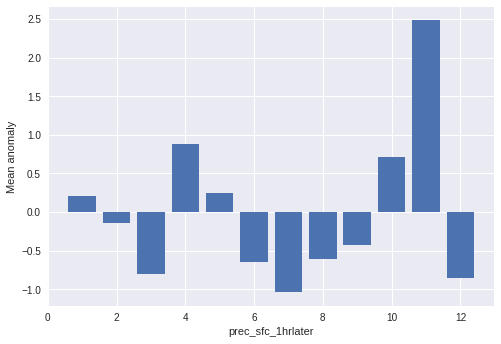

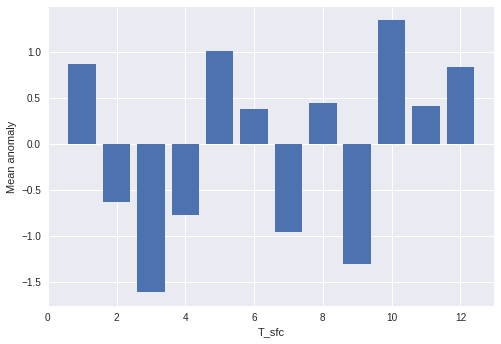

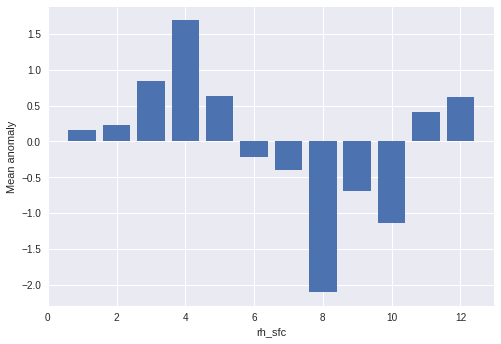

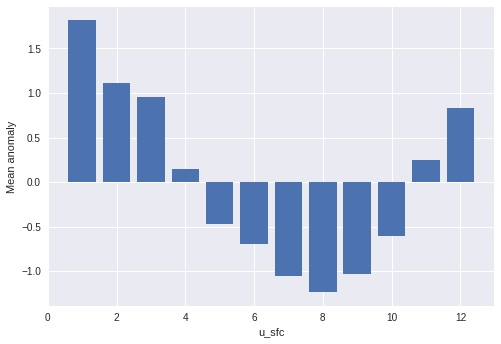

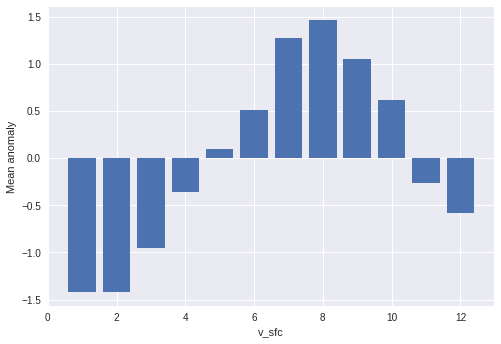

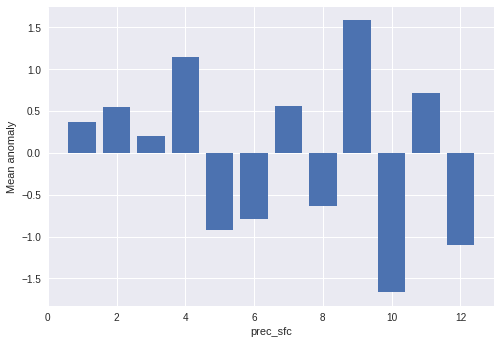

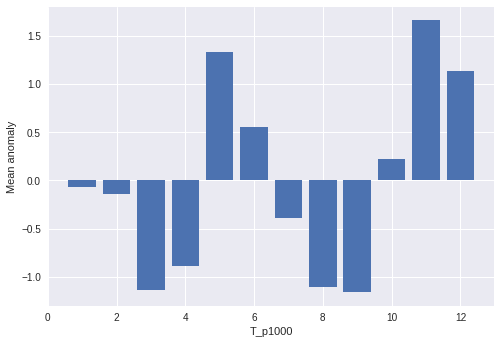

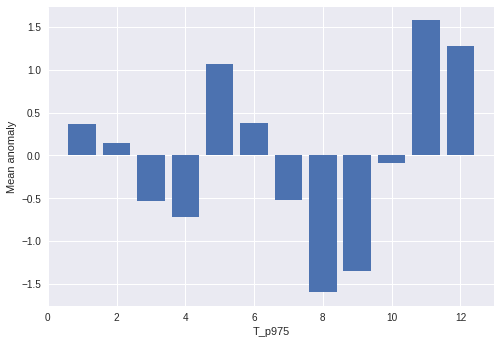

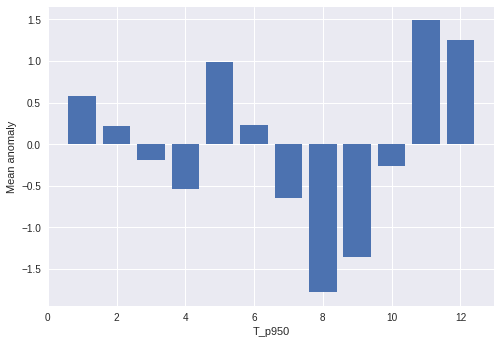

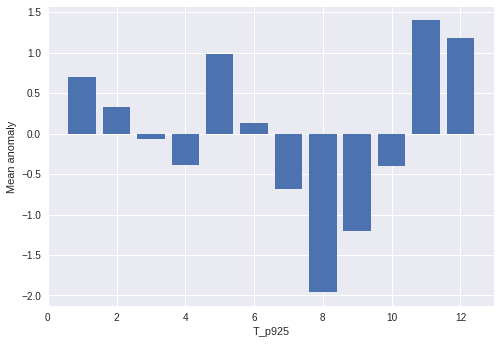

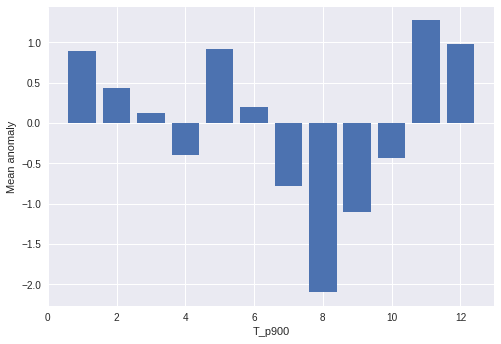

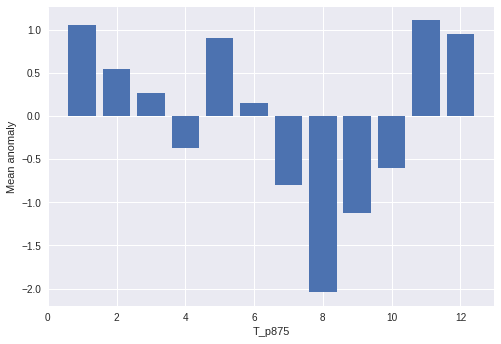

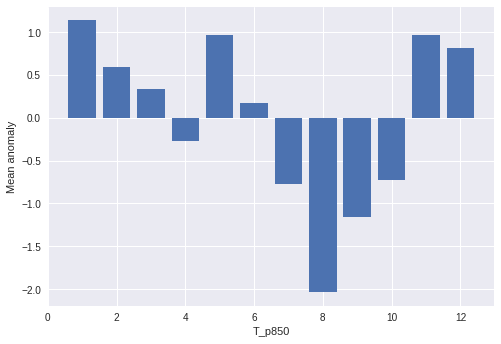

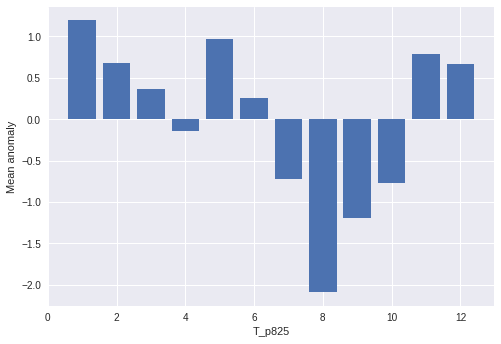

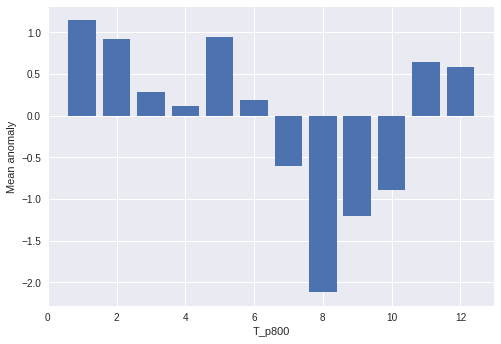

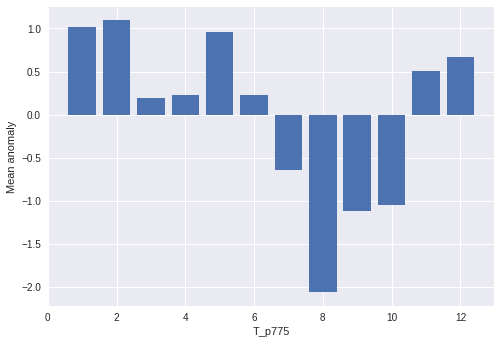

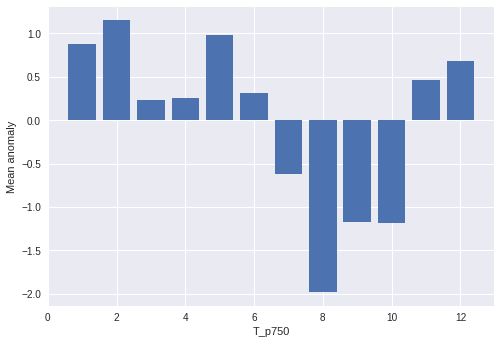

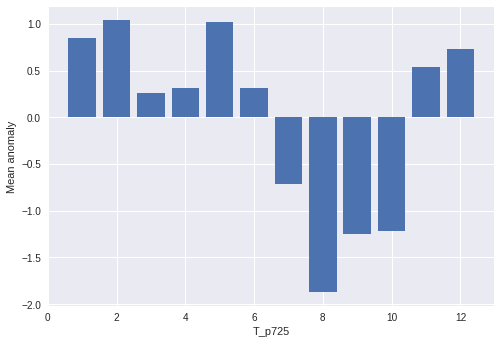

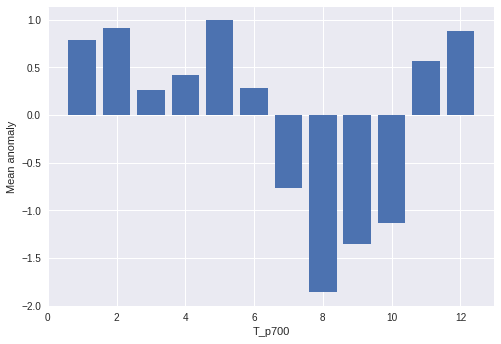

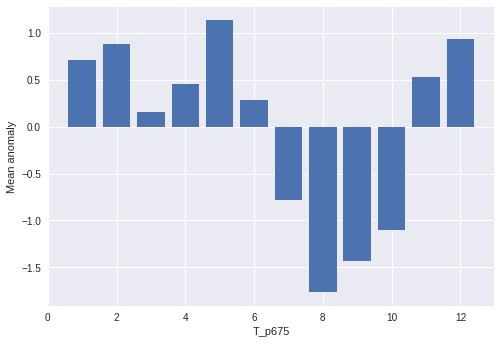

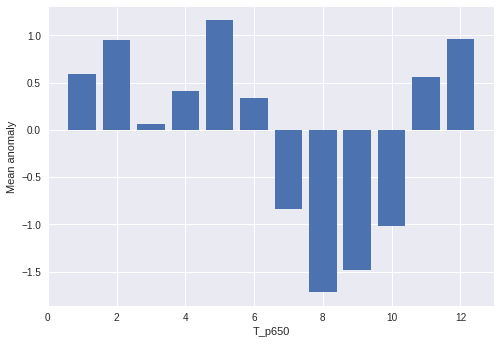

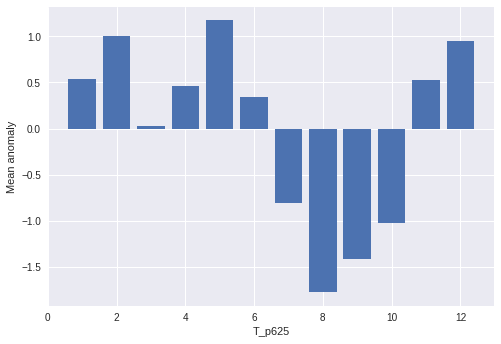

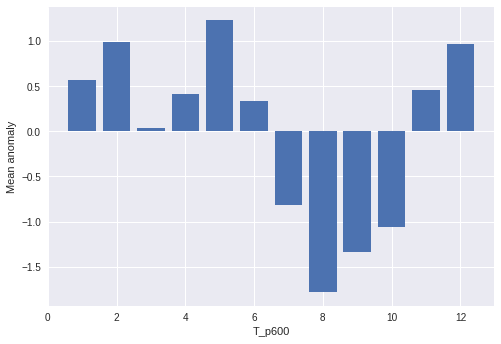

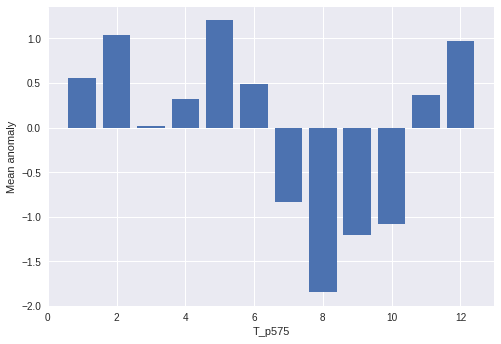

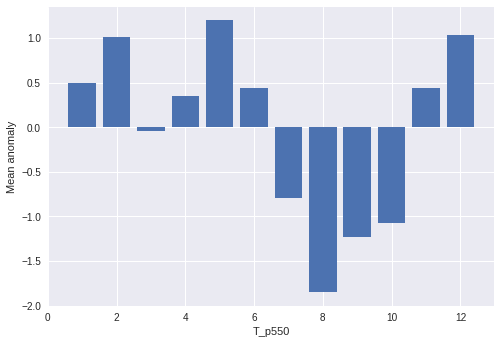

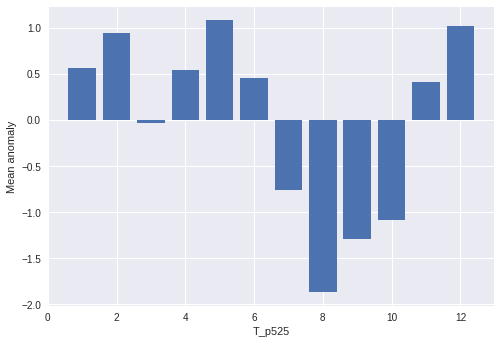

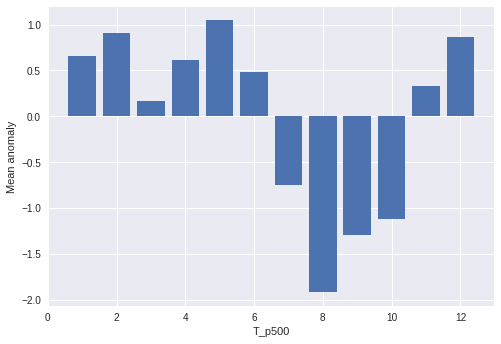

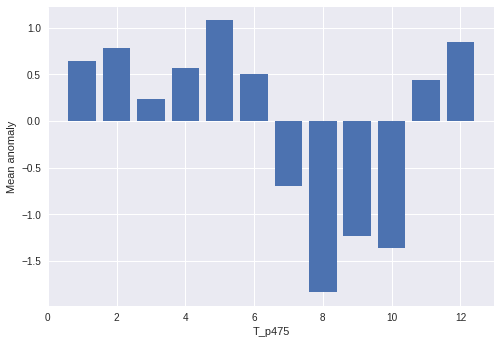

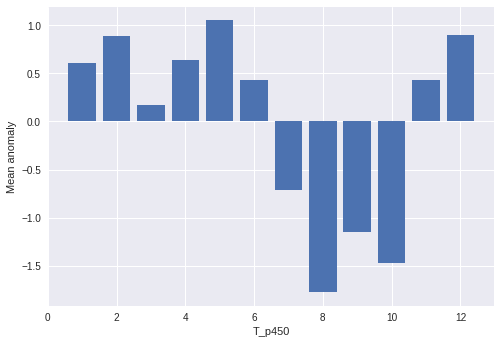

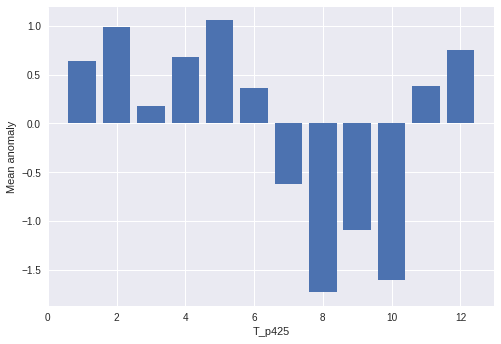

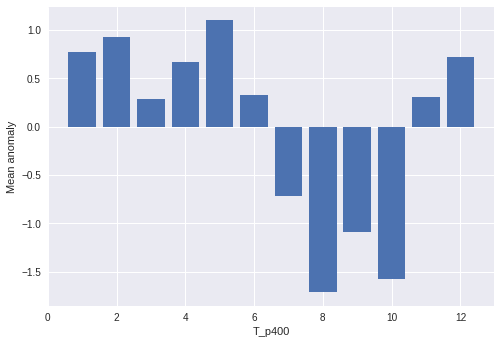

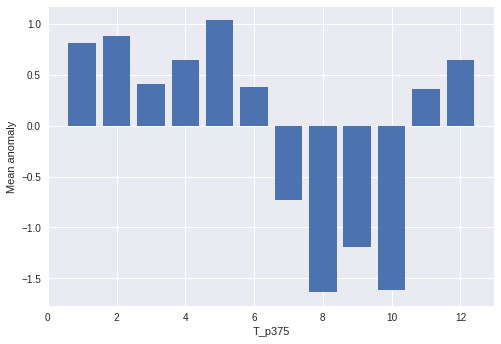

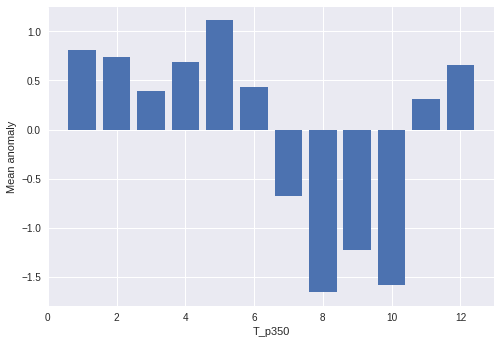

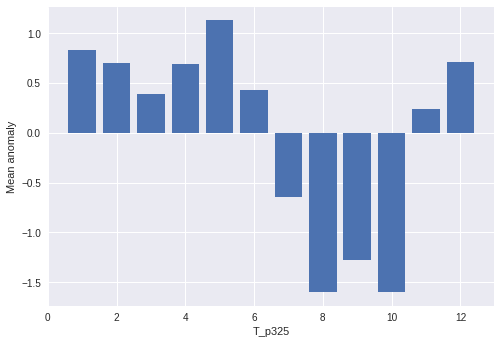

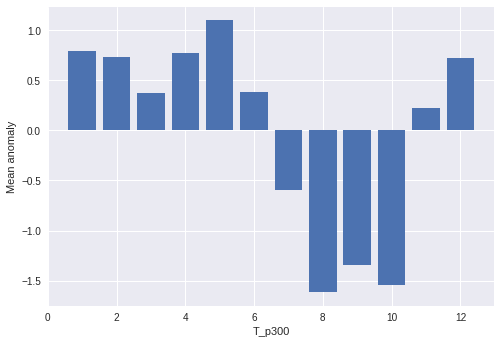

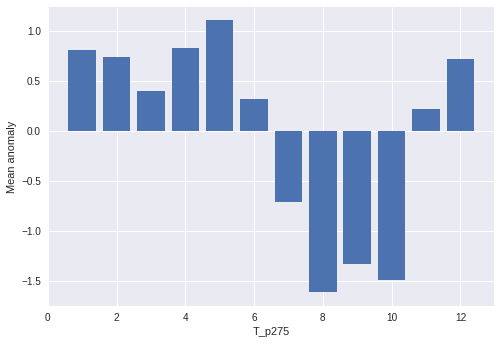

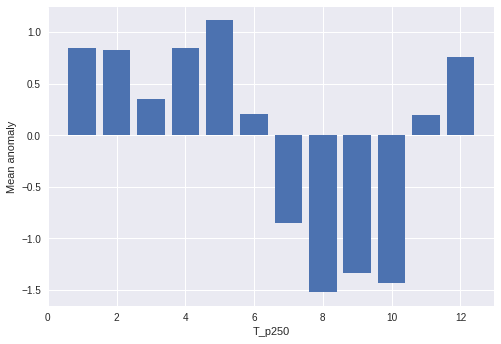

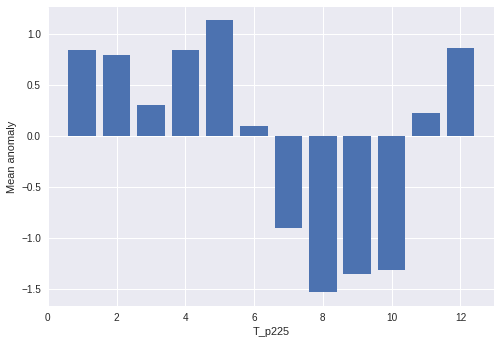

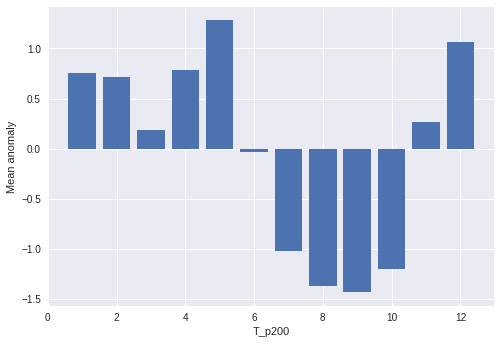

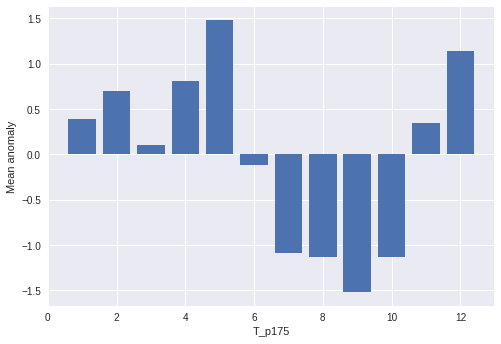

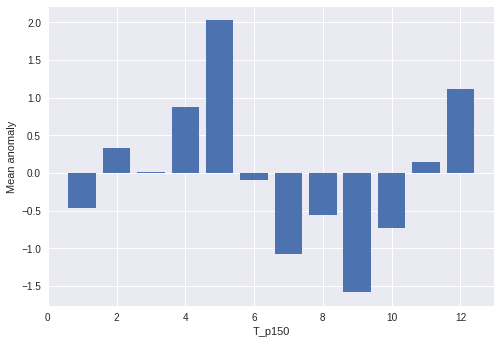

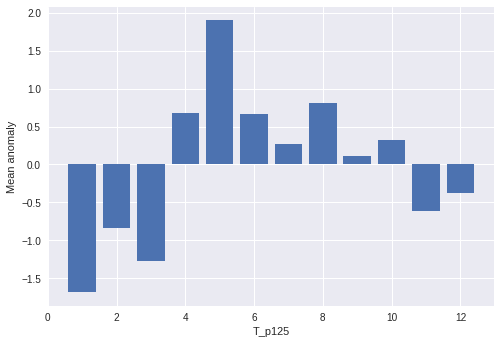

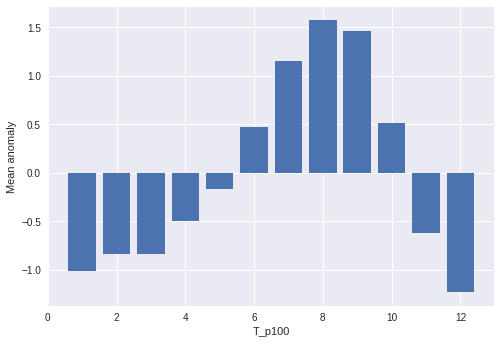

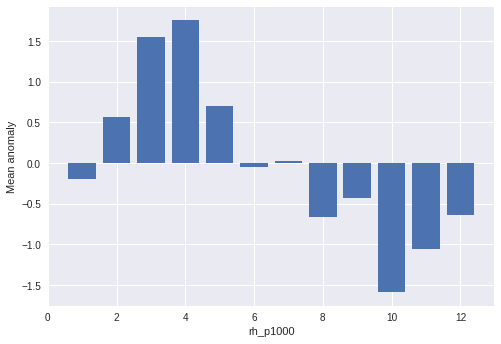

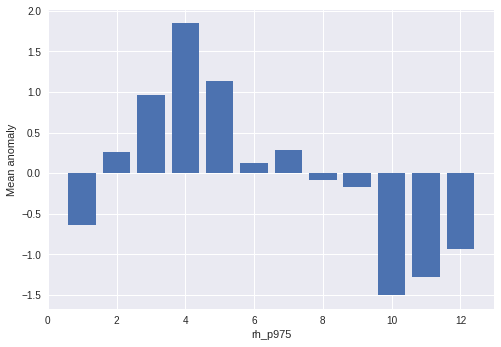

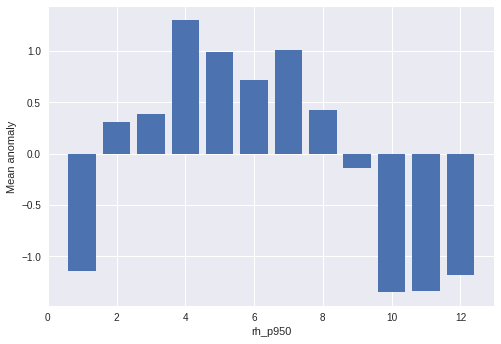

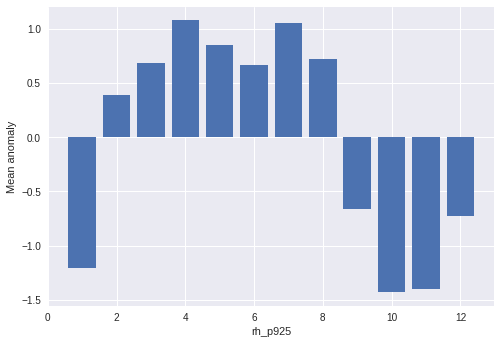

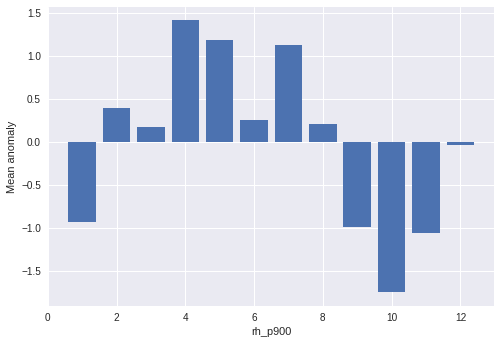

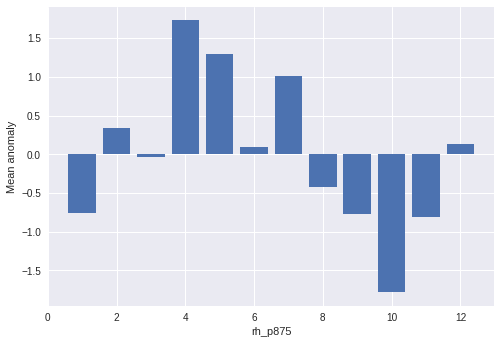

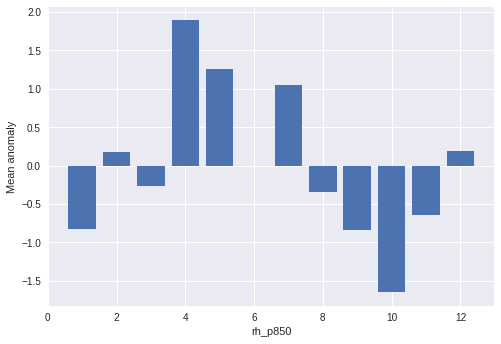

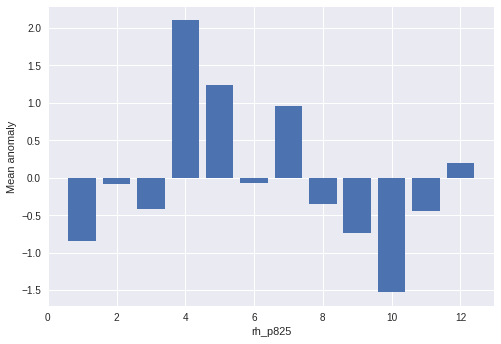

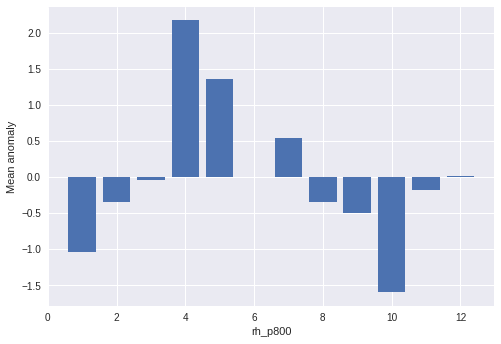

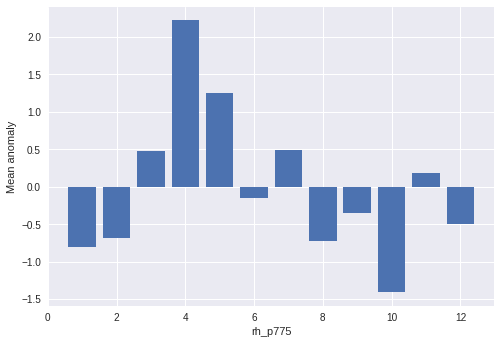

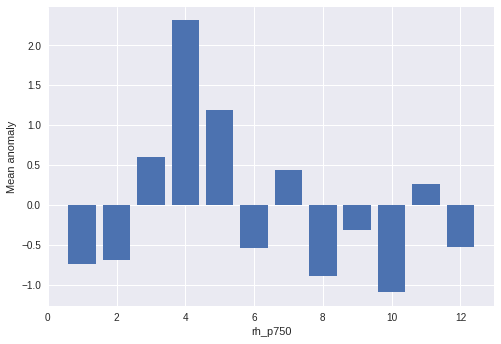

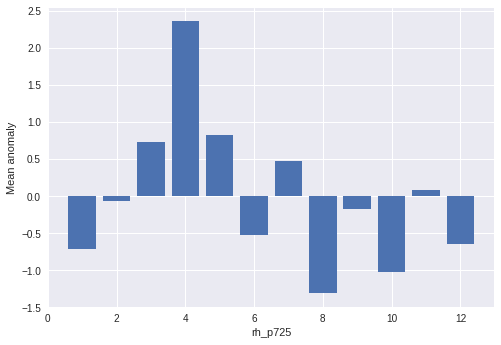

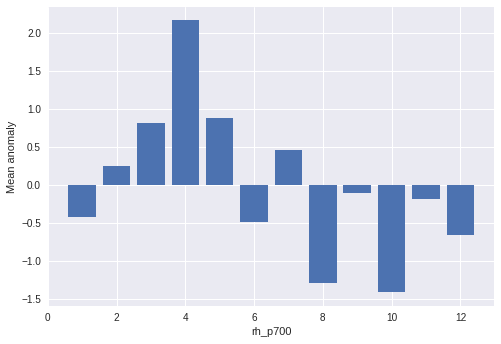

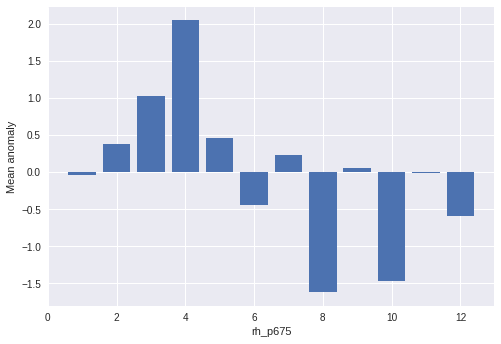

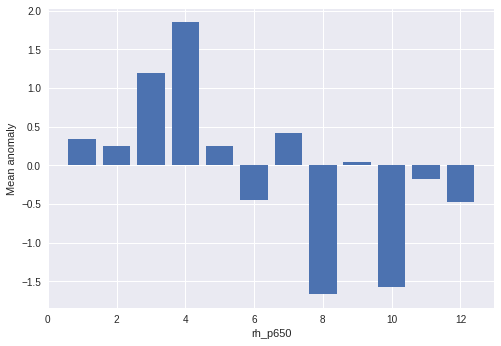

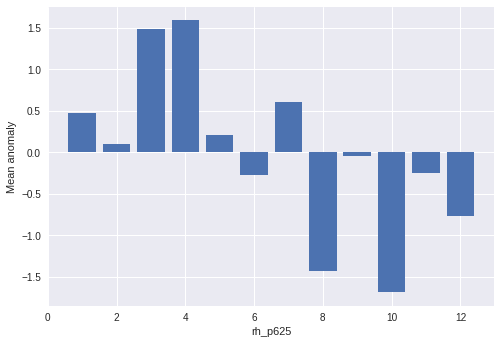

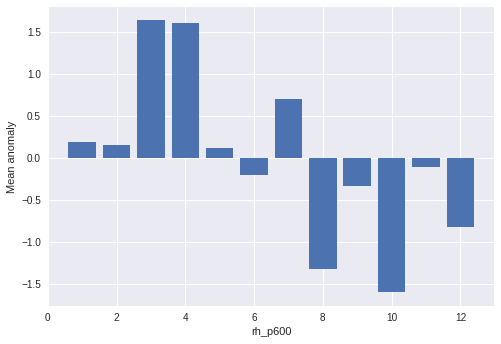

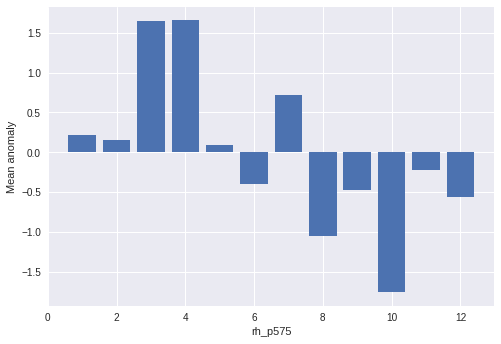

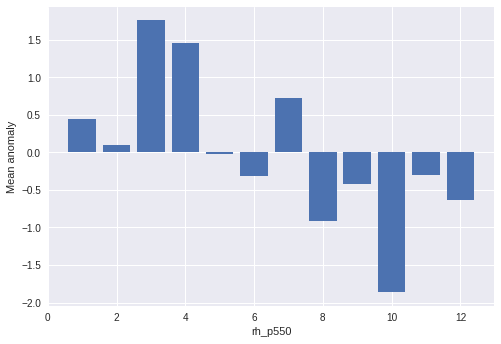

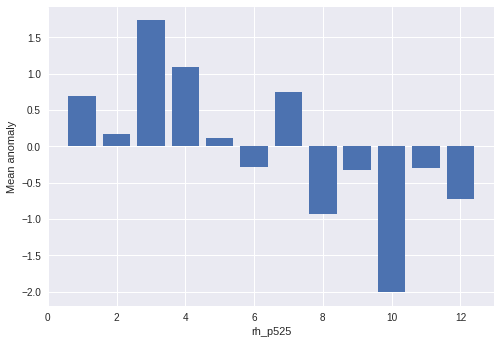

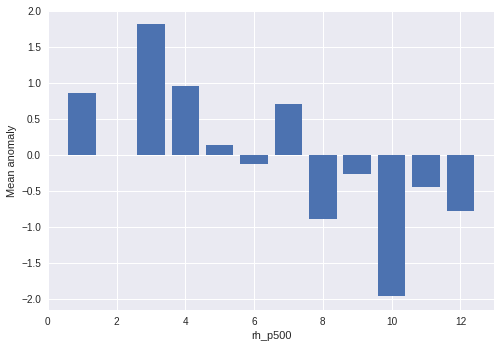

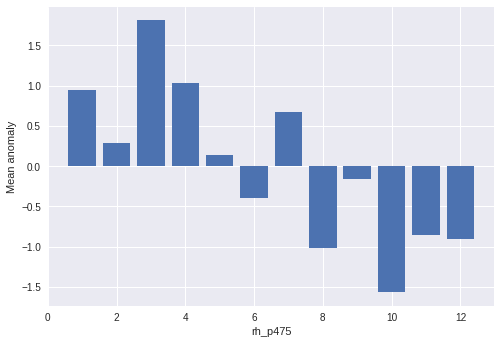

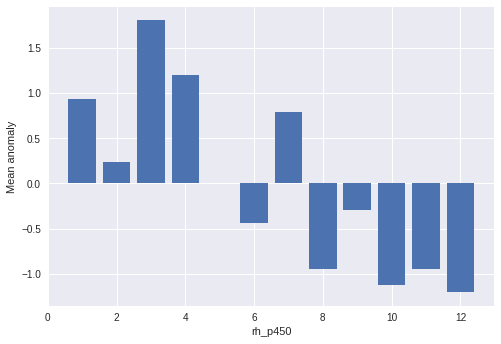

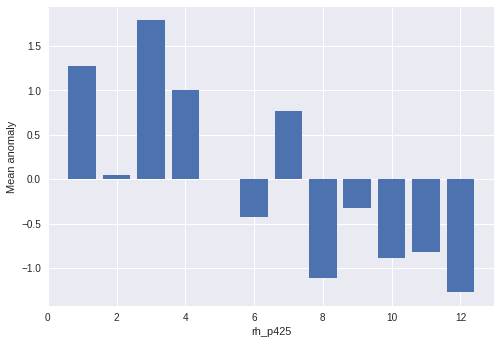

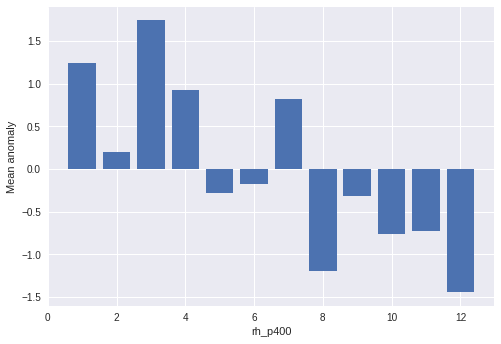

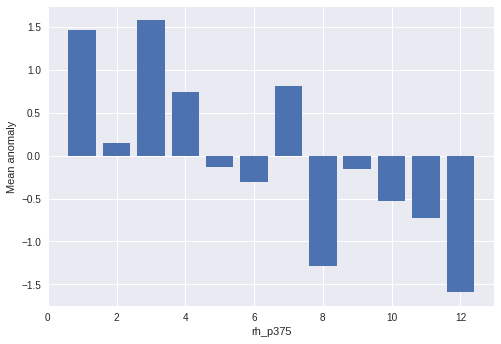

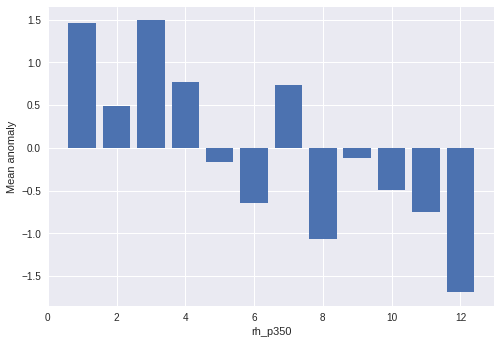

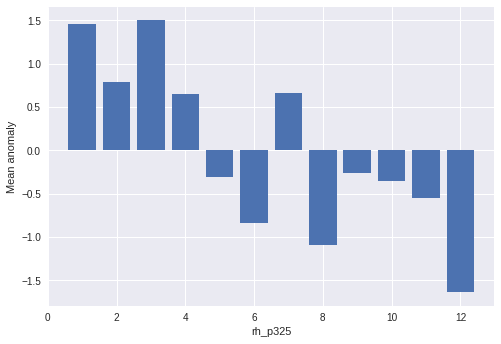

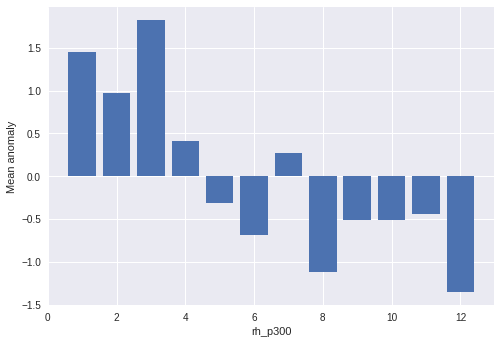

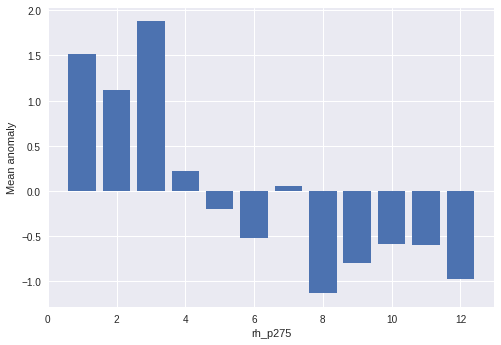

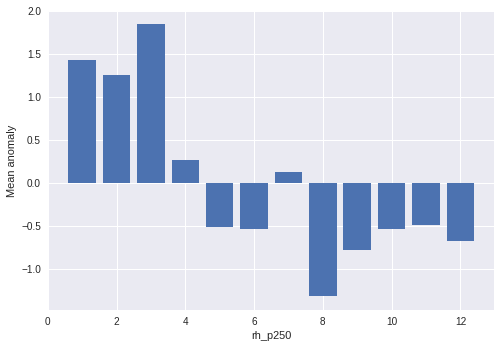

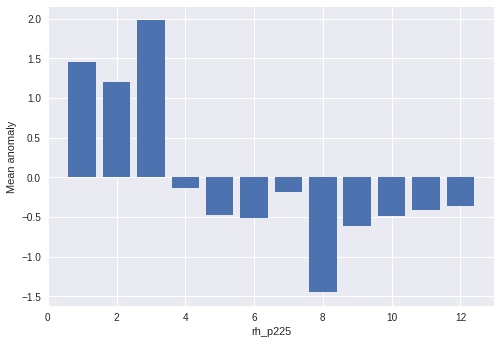

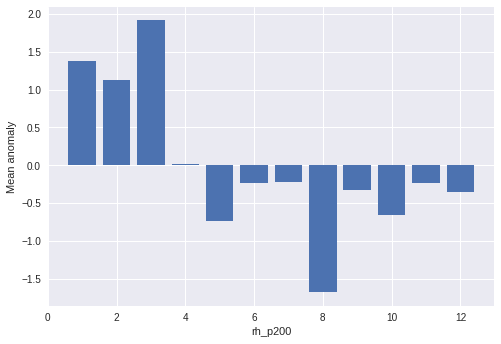

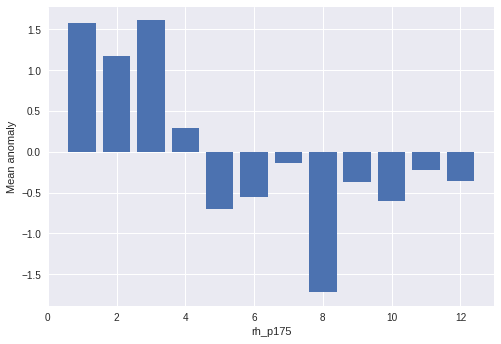

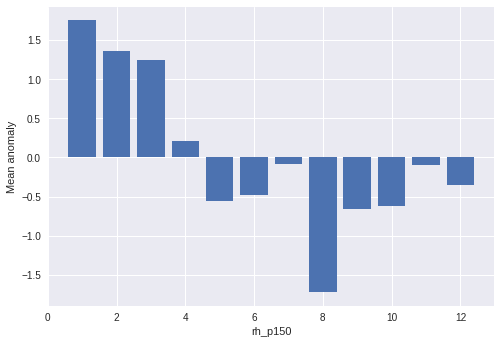

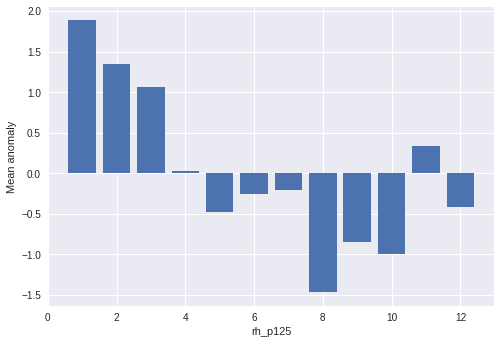

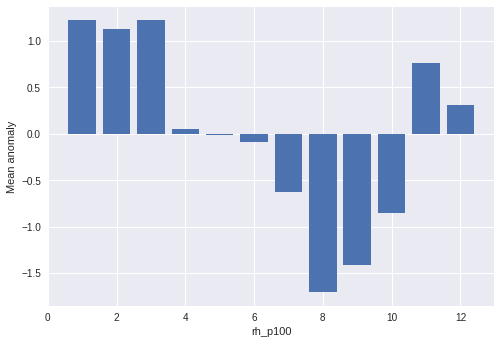

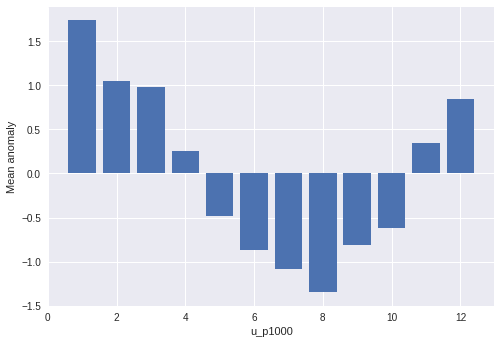

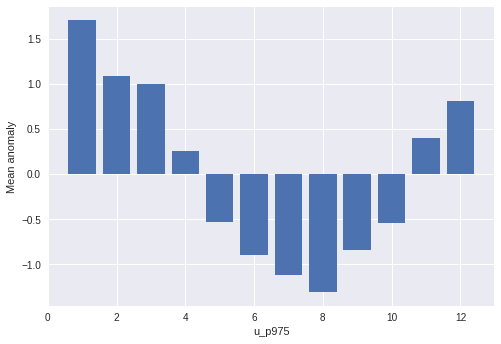

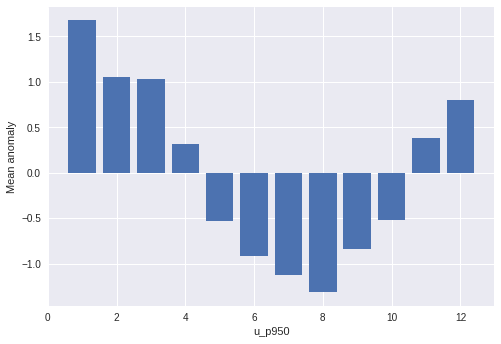

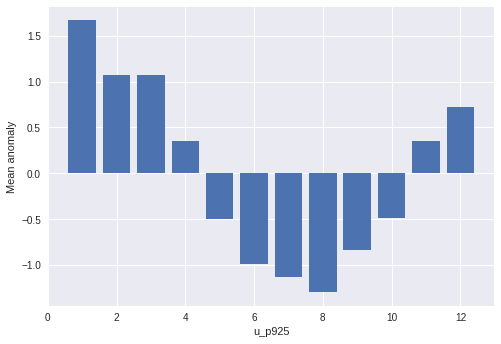

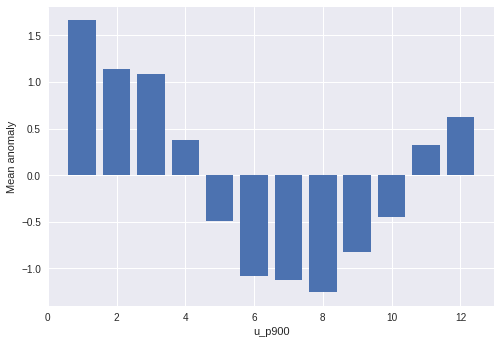

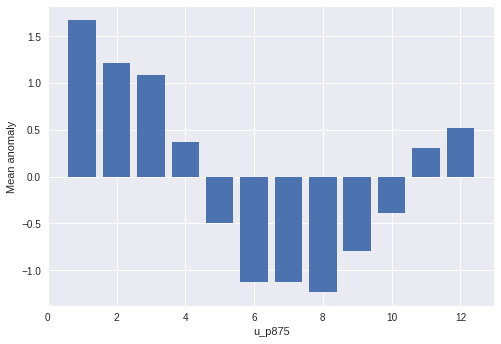

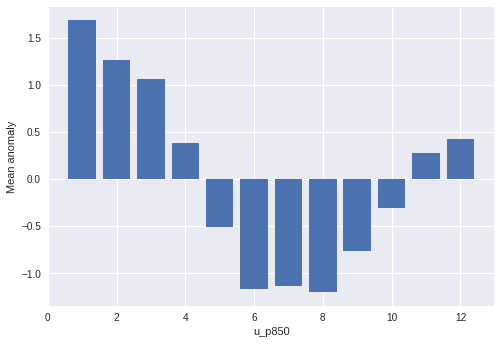

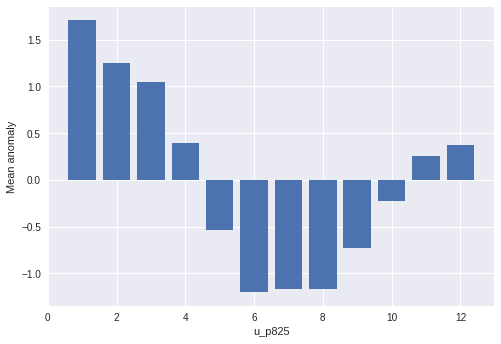

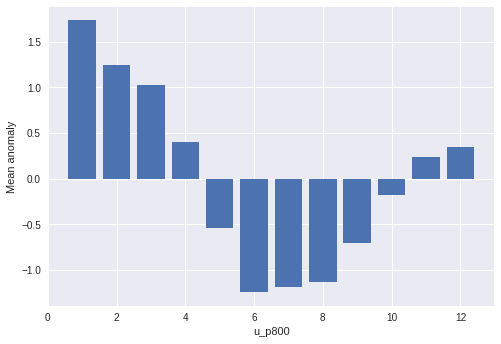

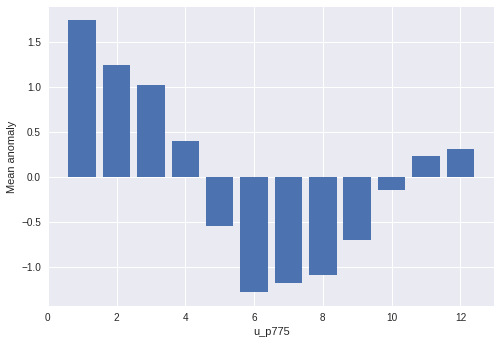

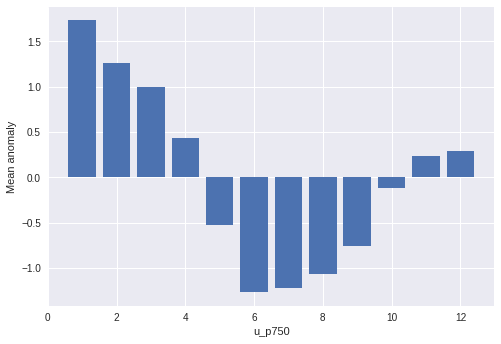

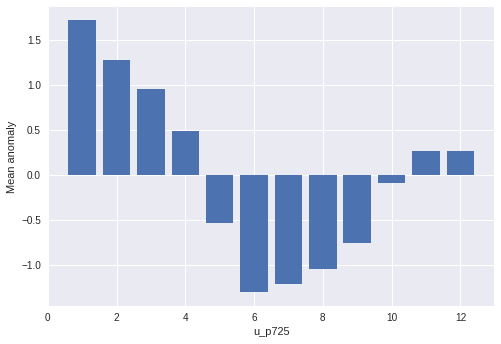

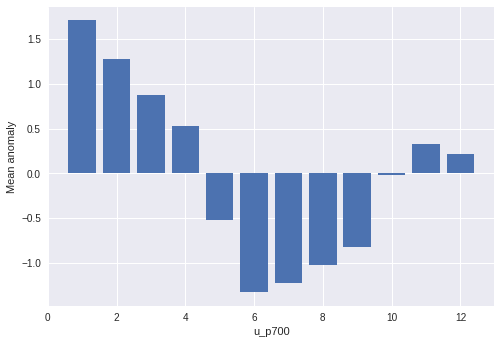

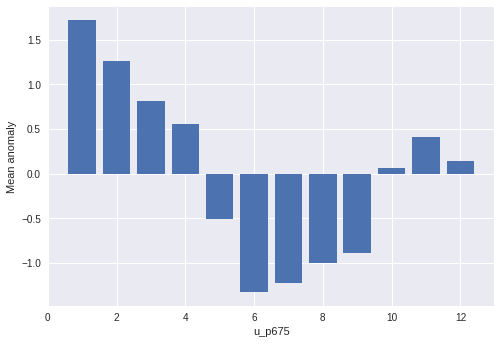

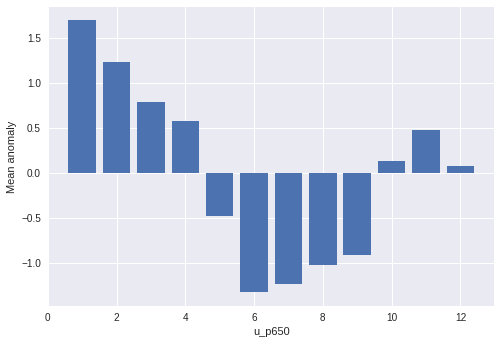

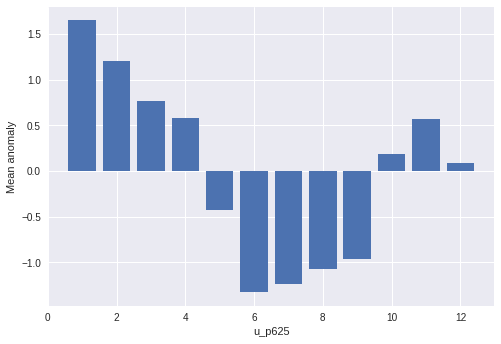

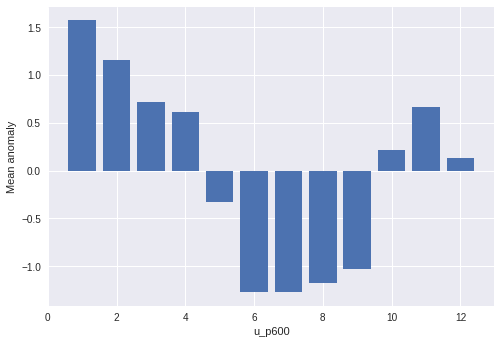

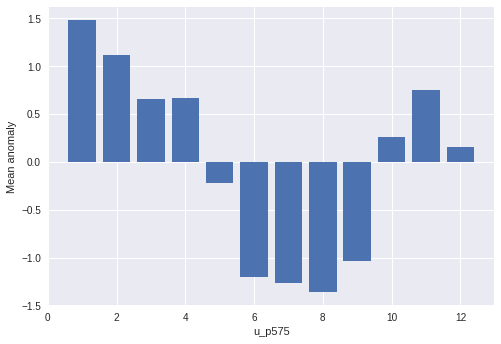

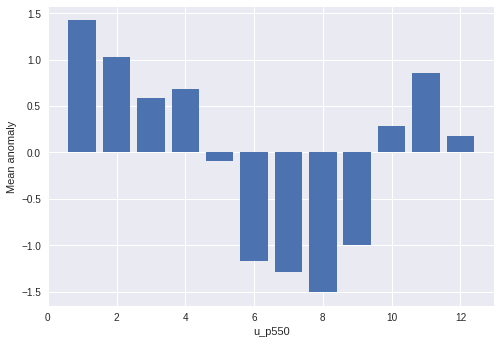

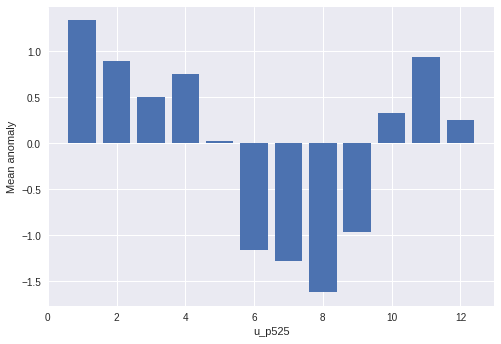

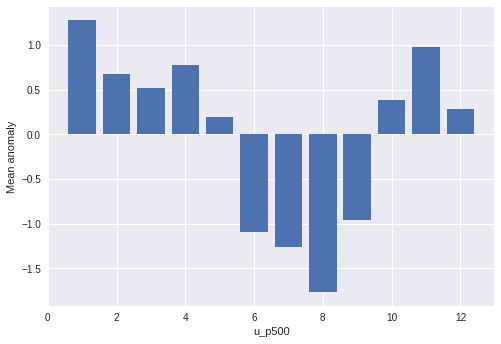

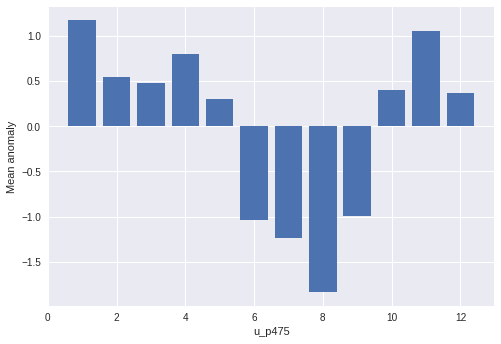

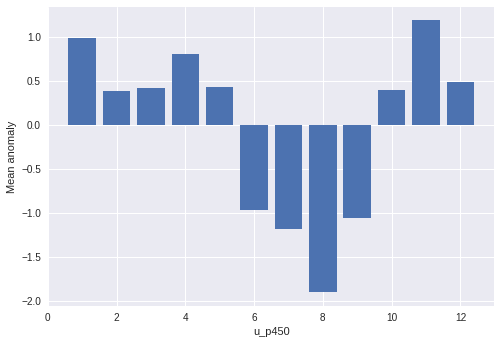

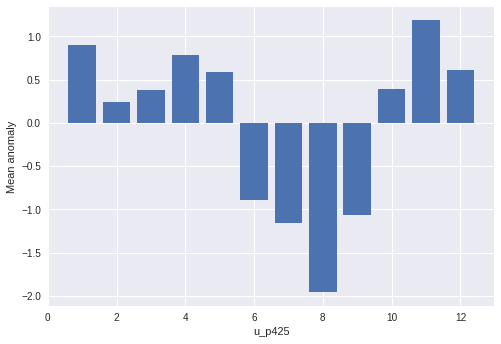

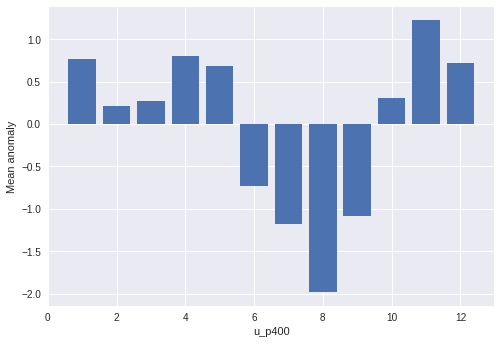

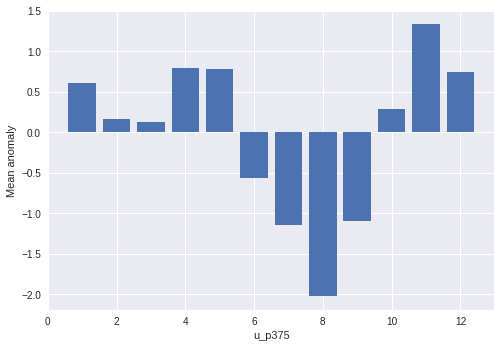

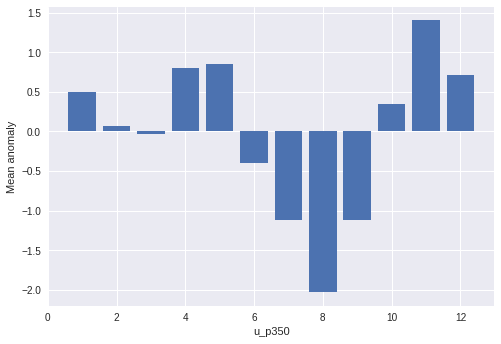

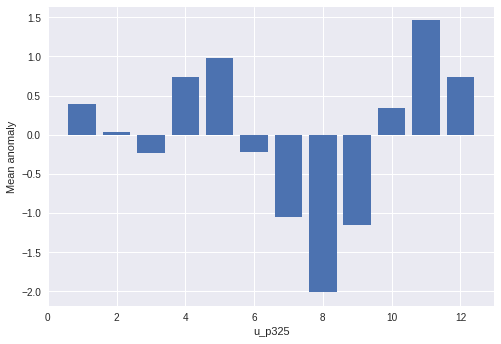

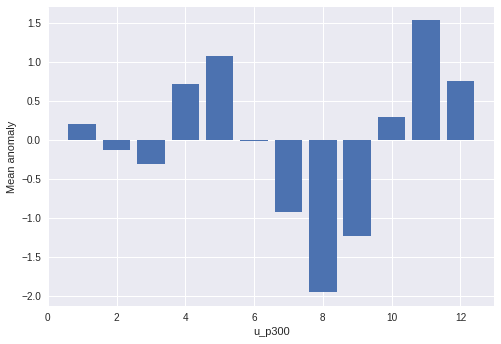

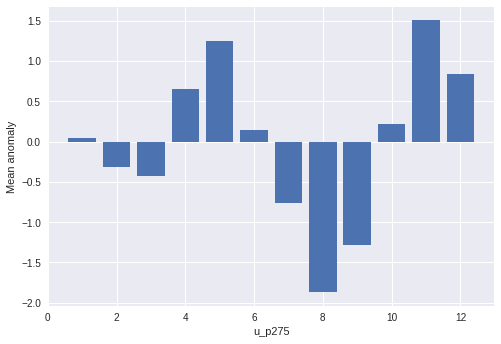

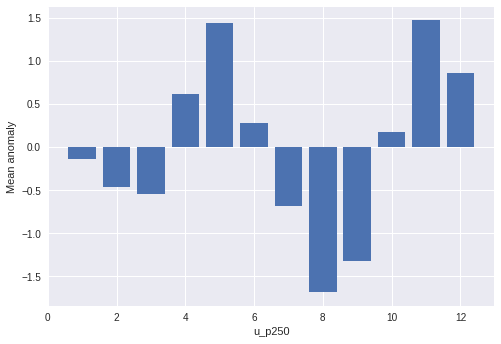

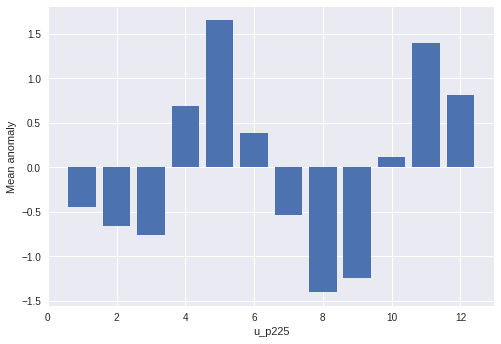

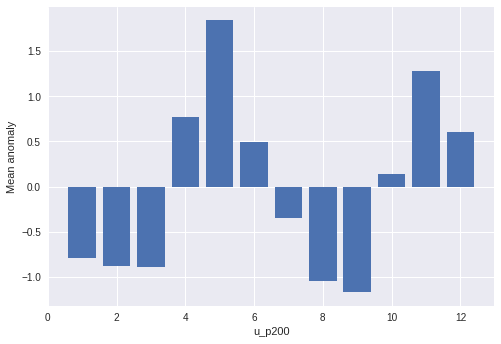

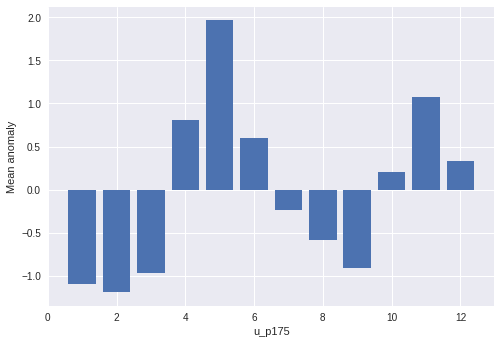

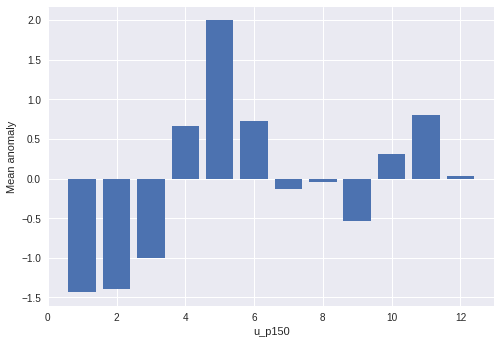

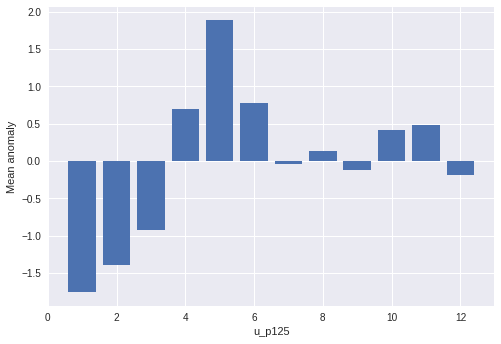

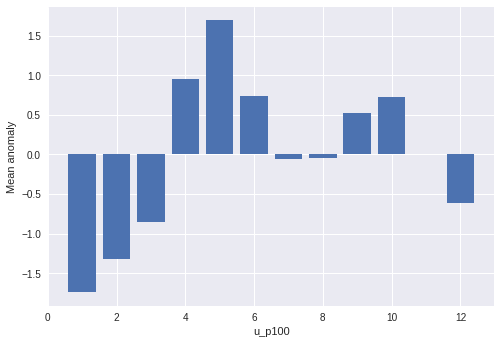

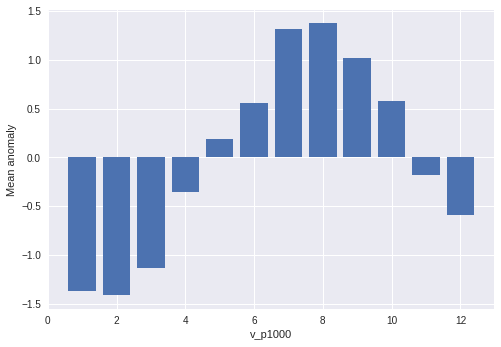

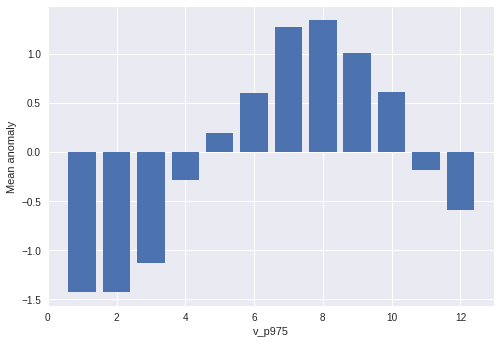

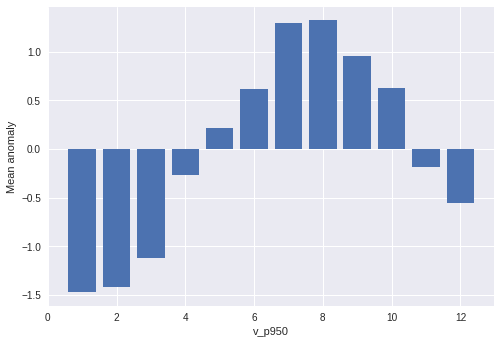

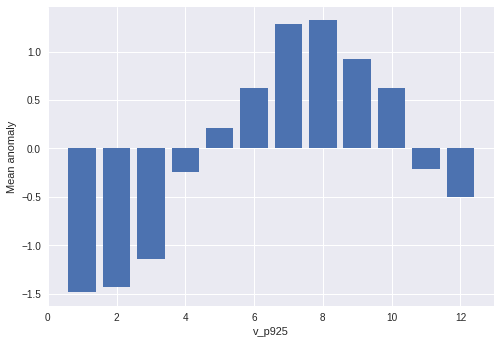

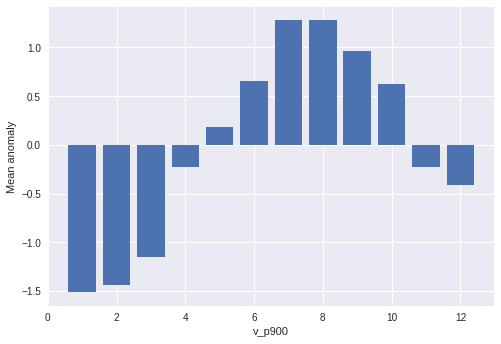

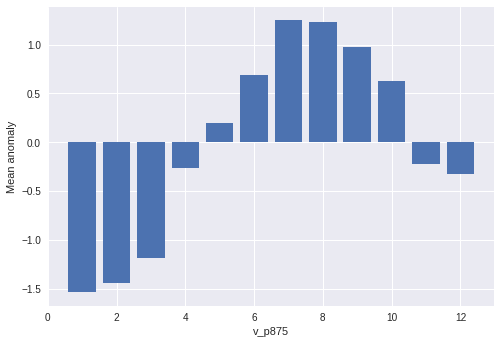

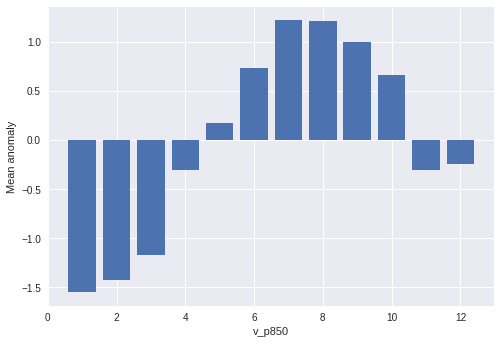

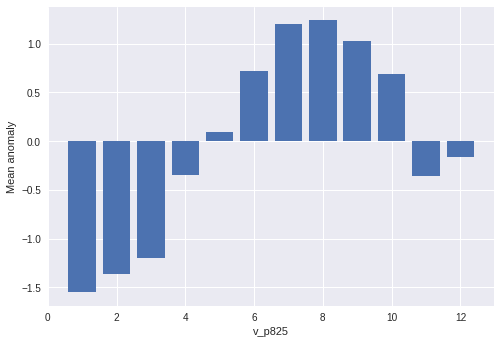

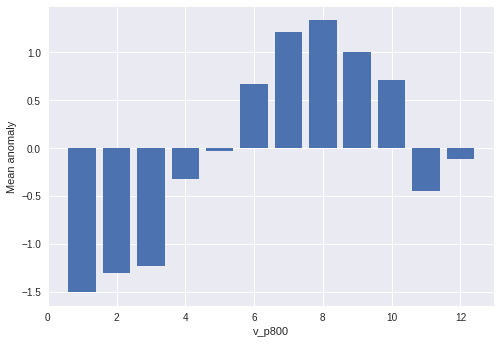

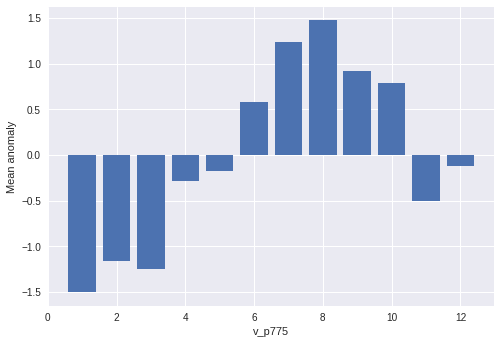

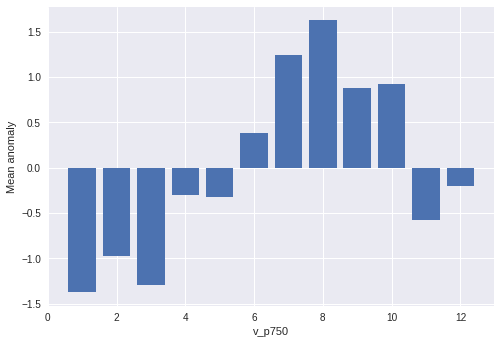

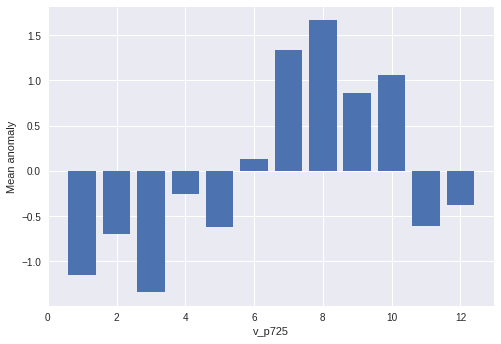

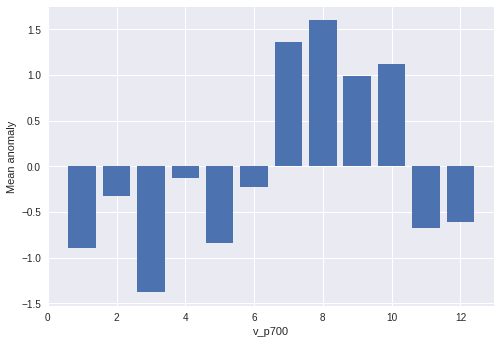

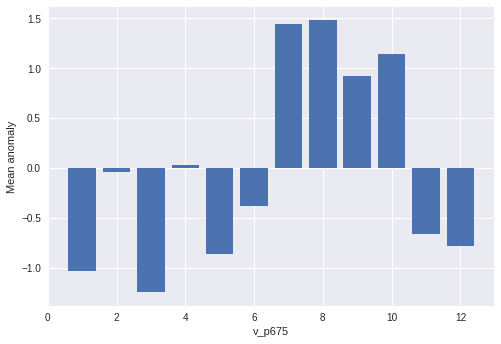

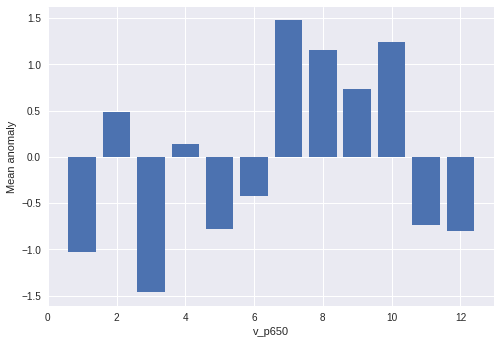

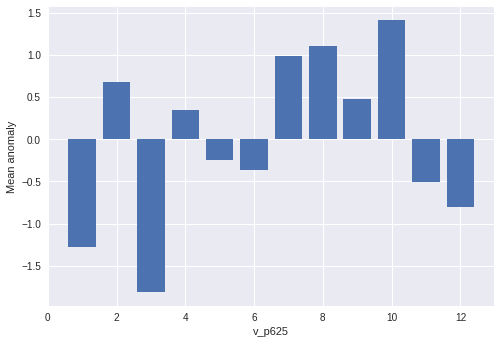

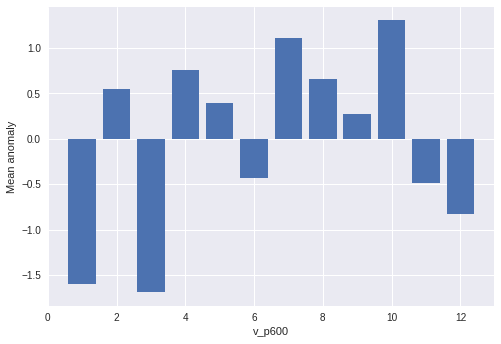

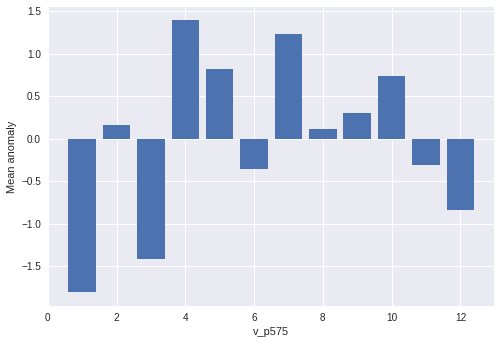

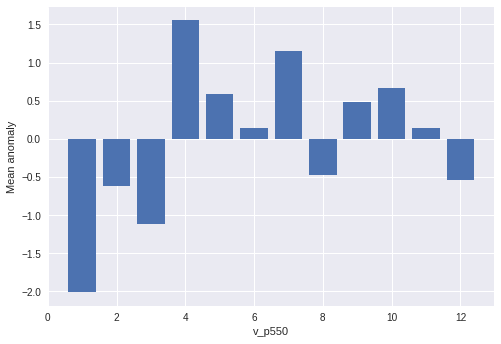

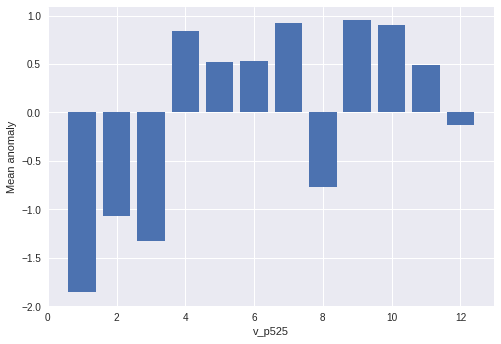

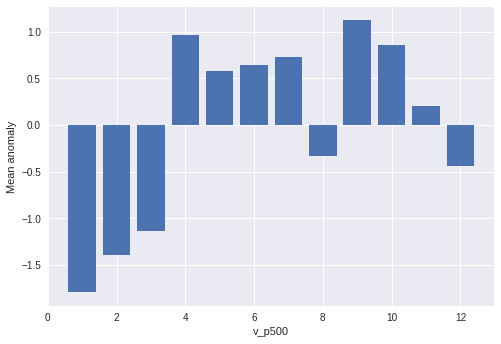

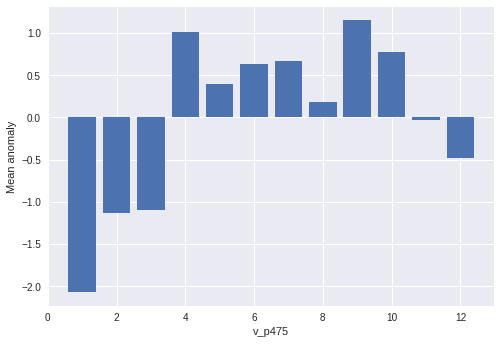

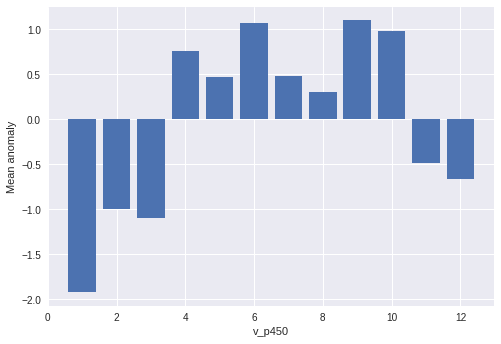

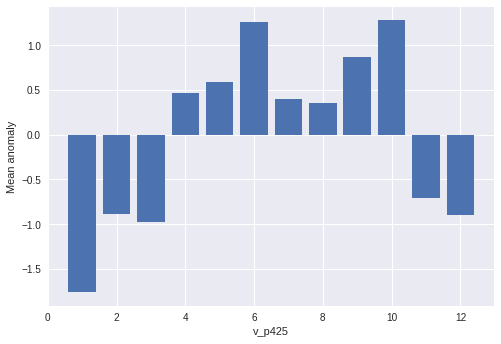

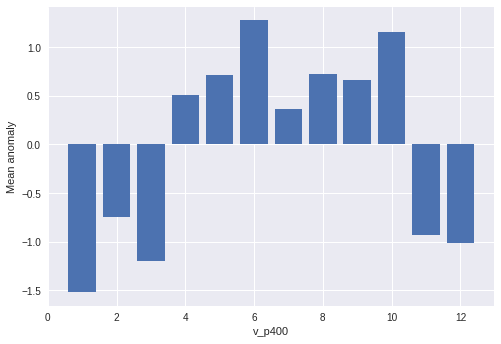

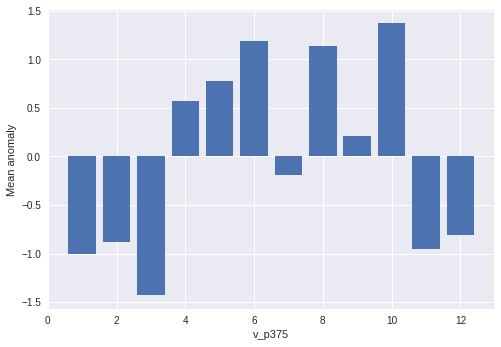

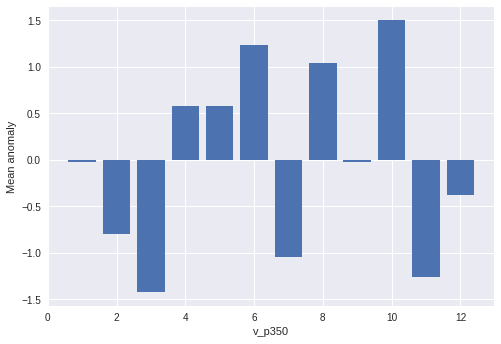

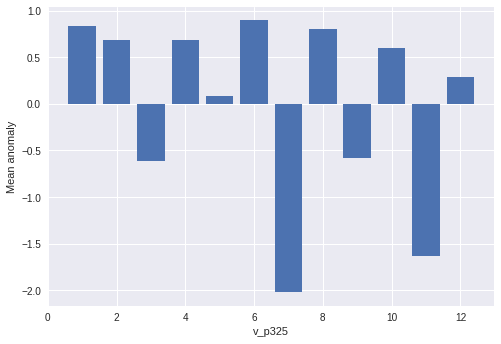

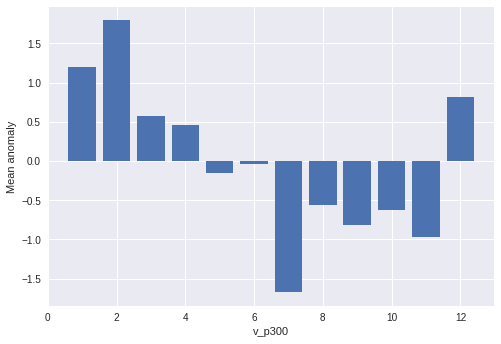

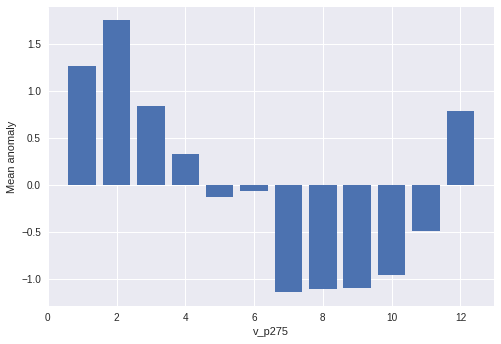

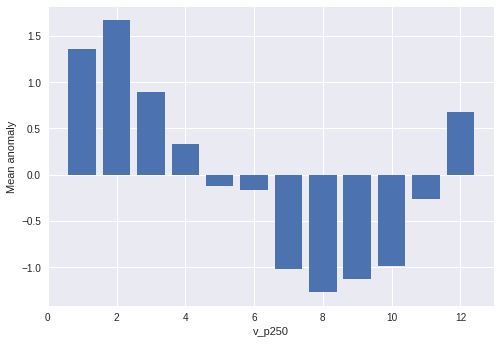

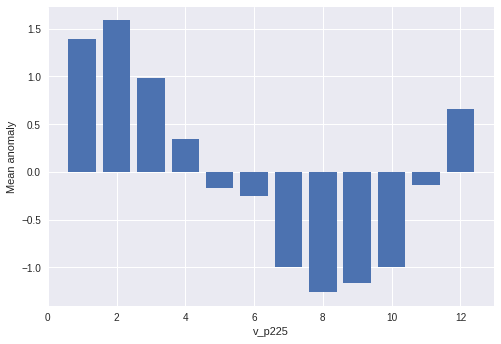

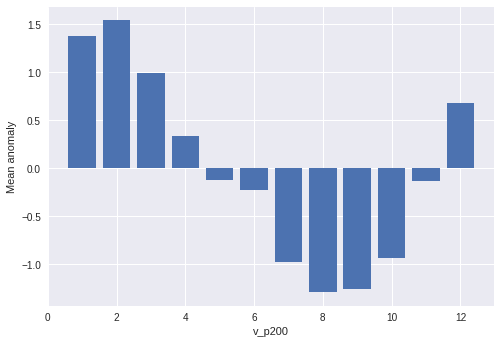

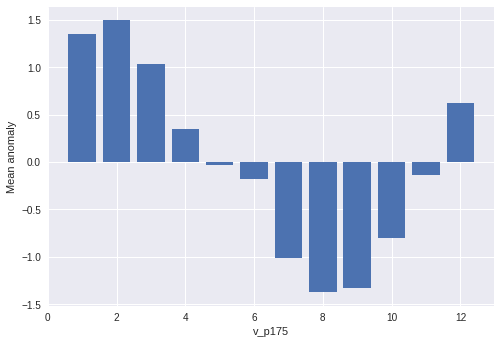

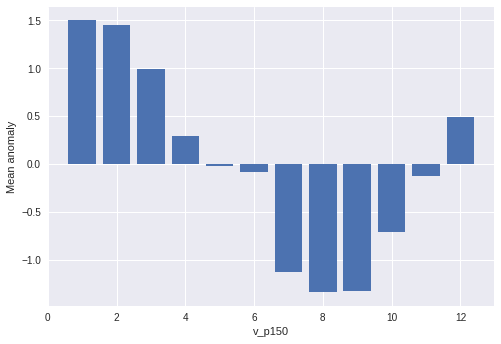

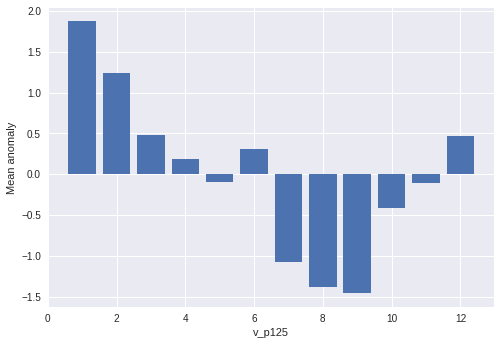

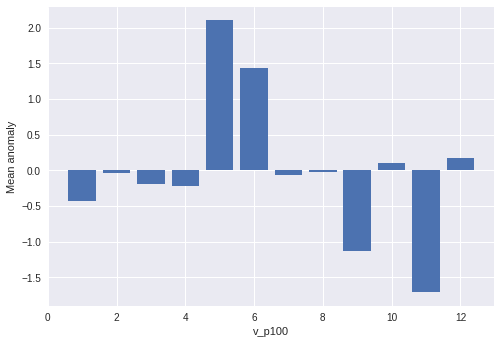

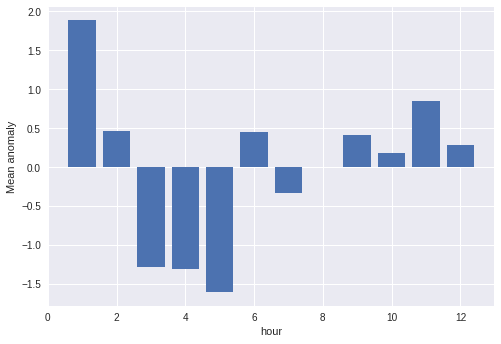

In [18]:
# Visualize monthly variation

columns = list(df_monthly_mean)

for _col in columns:
  c = df_monthly_mean[_col].copy()
  c = (c-c.mean())/c.std()

  plt.figure()
  plt.bar(c.index, c)
  plt.xlabel(_col)
  plt.ylabel('Mean anomaly')
  plt.show()

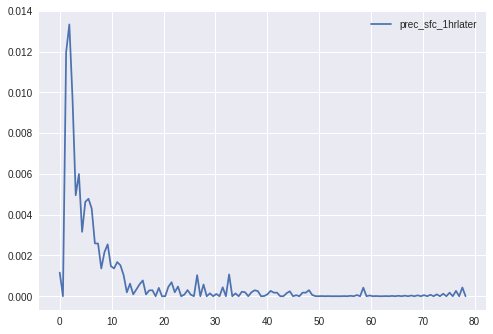

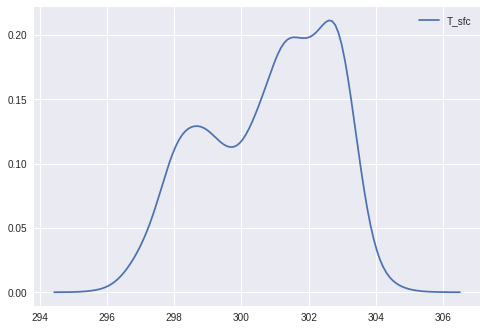

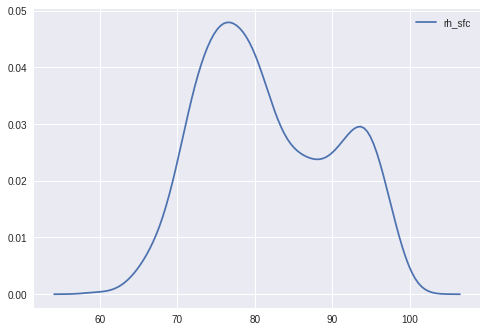

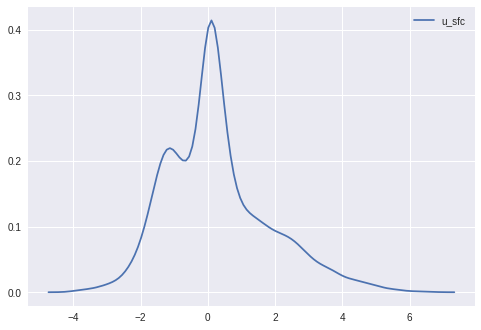

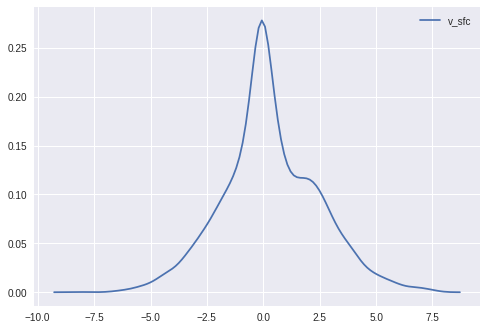

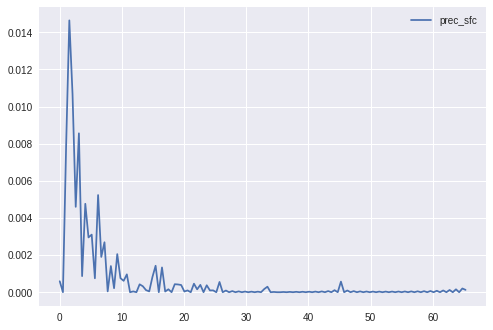

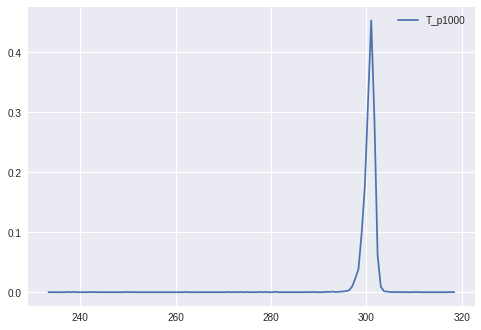

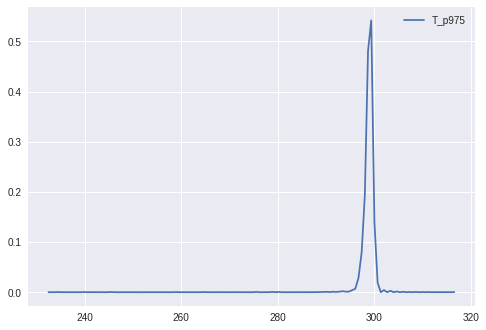

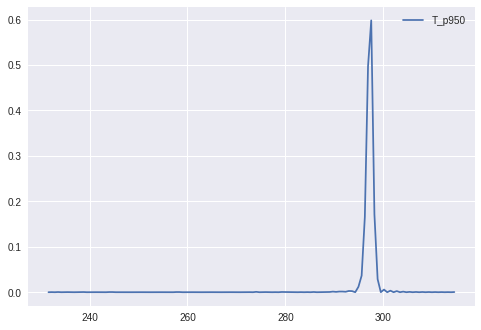

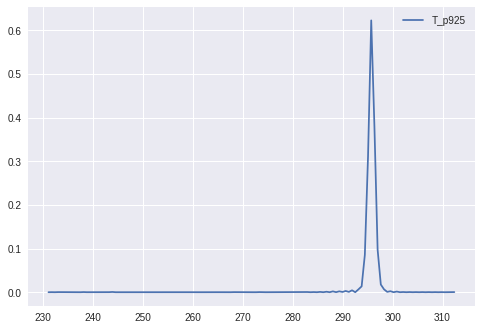

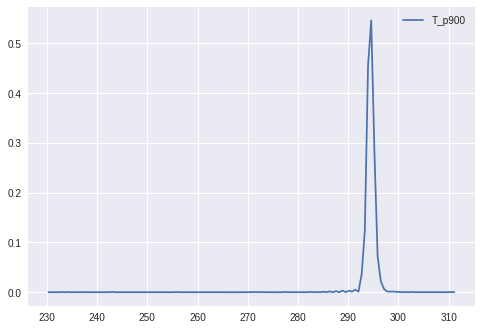

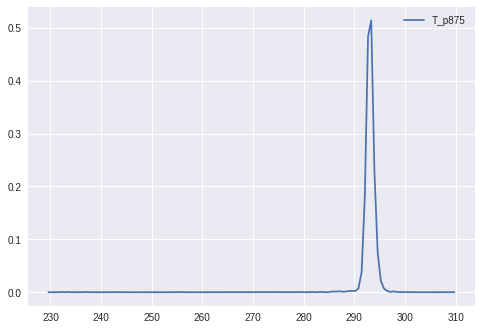

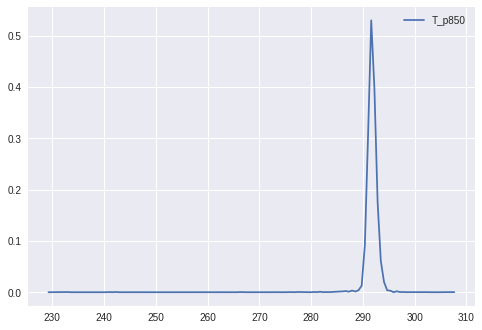

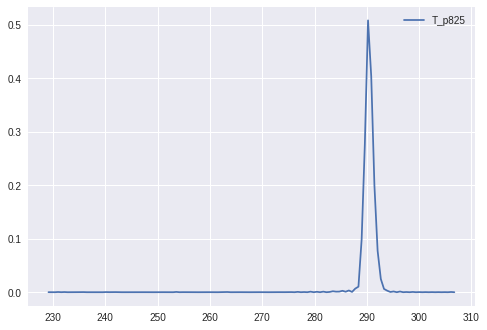

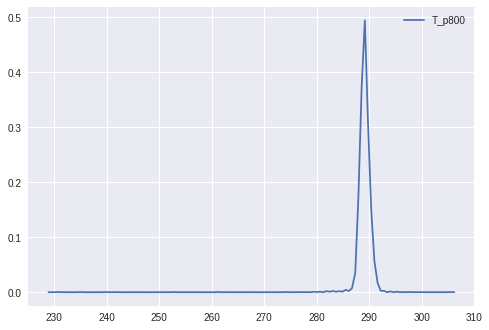

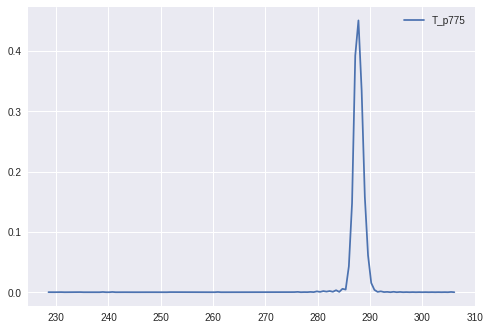

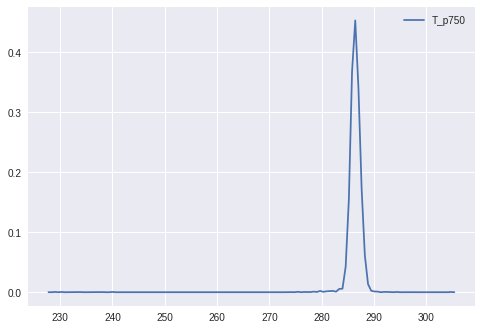

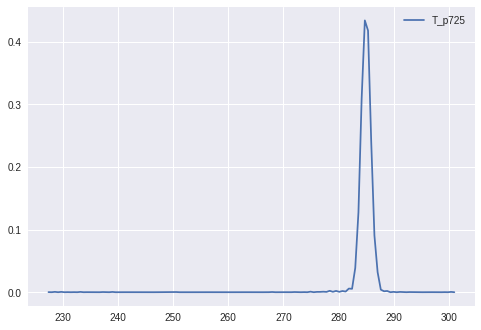

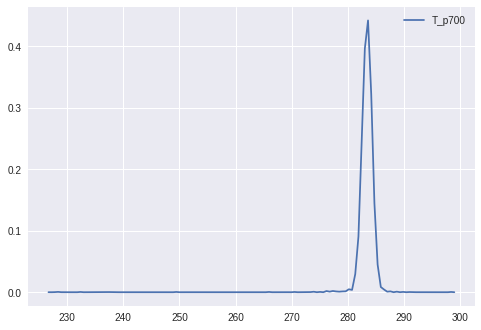

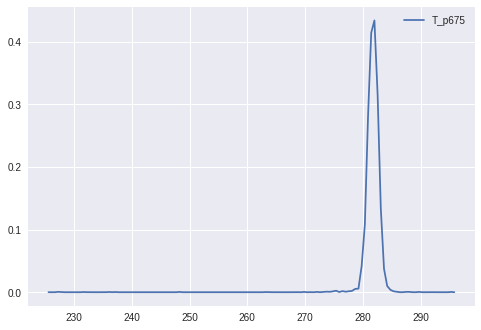

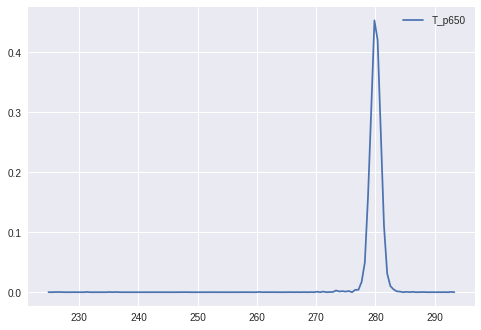

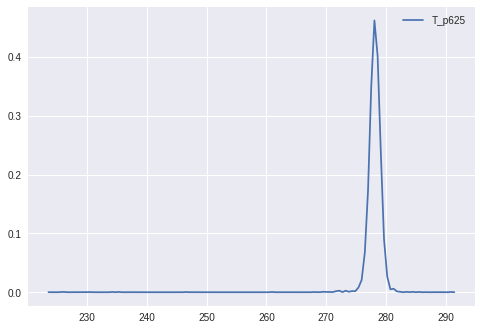

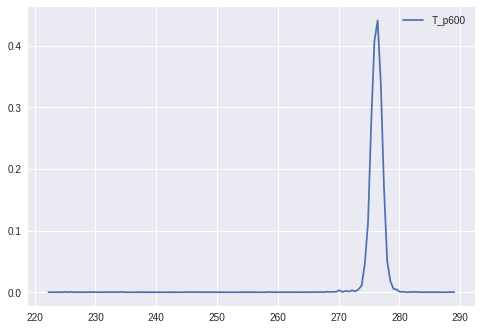

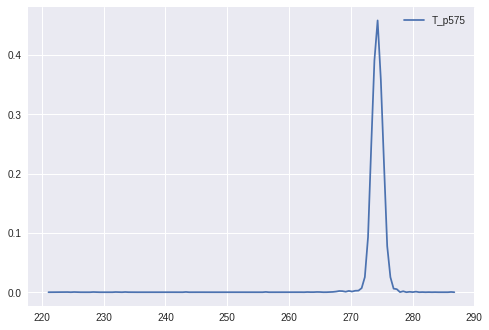

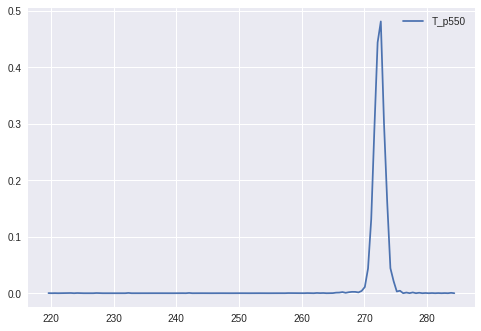

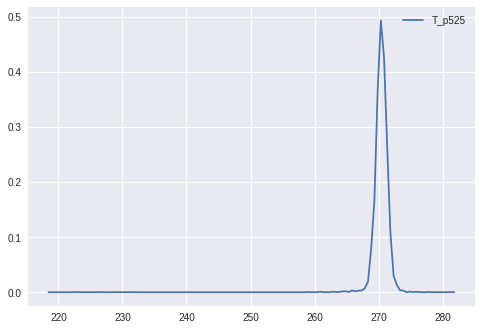

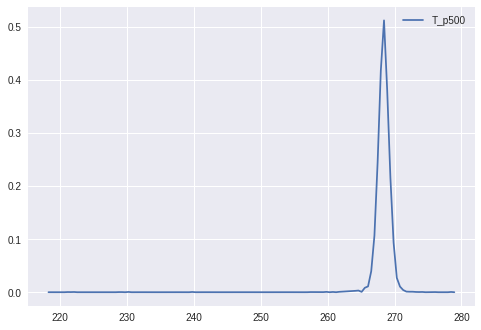

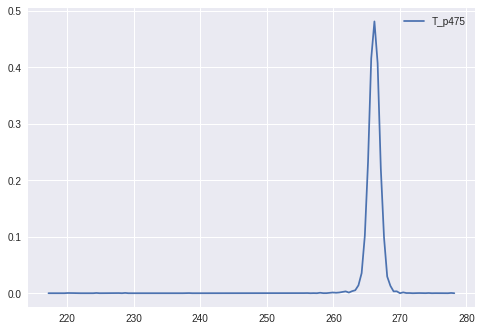

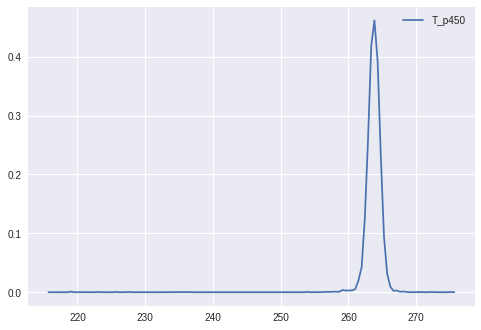

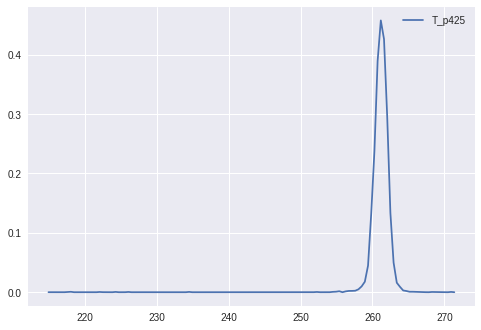

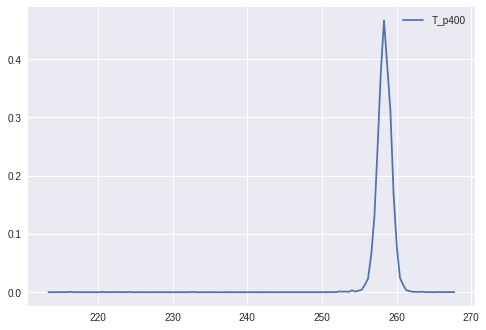

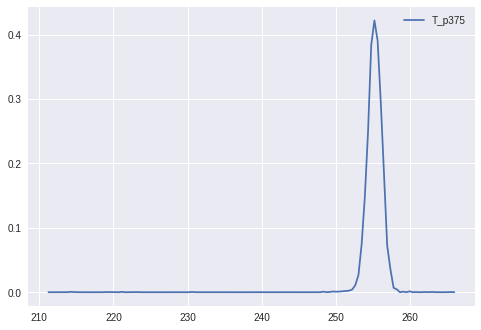

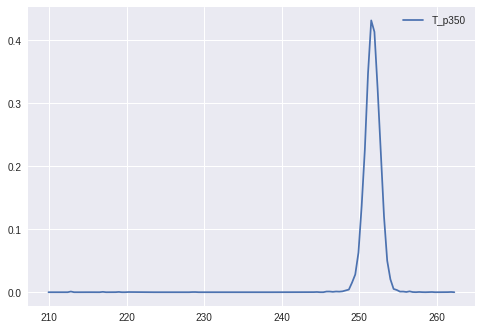

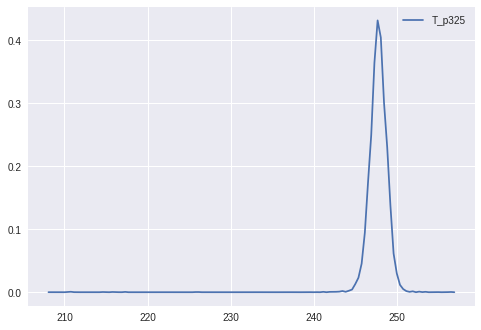

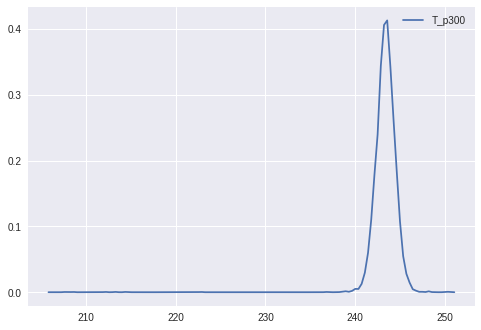

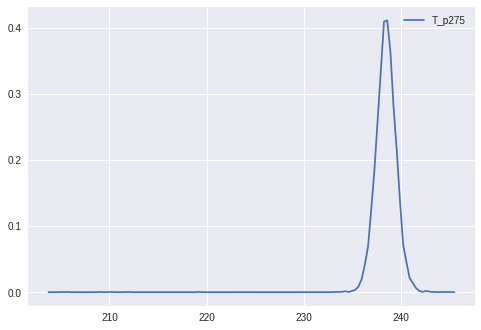

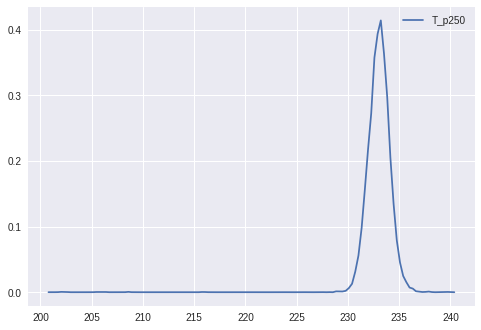

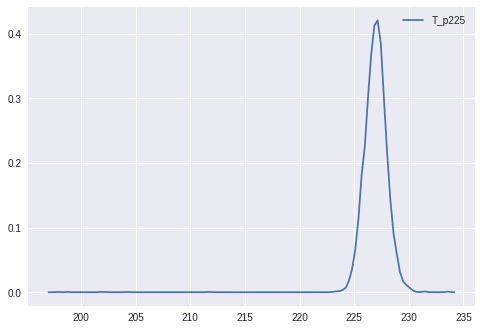

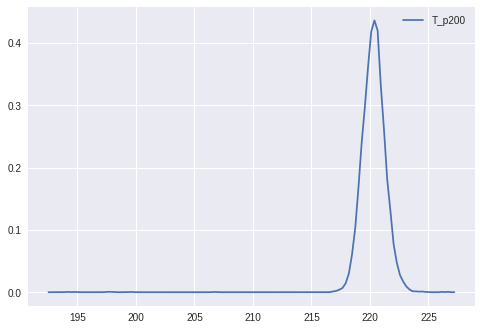

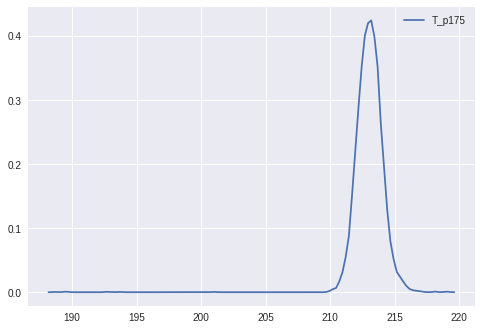

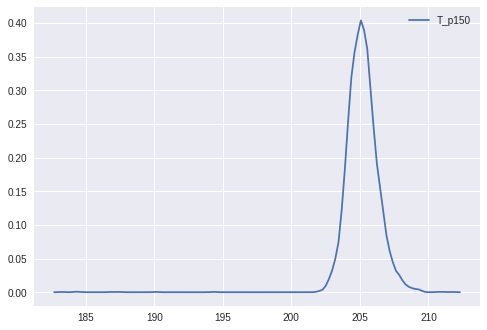

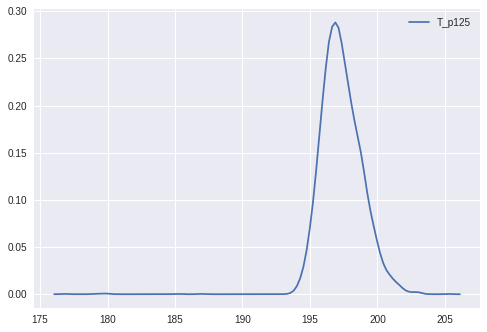

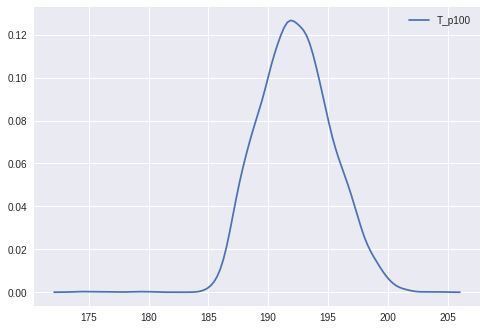

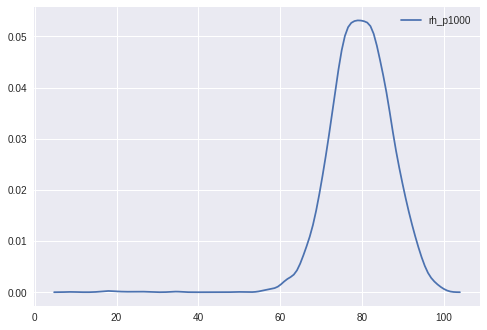

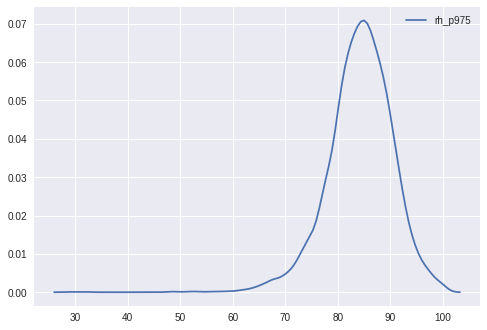

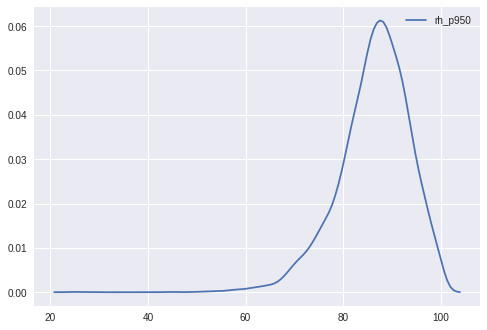

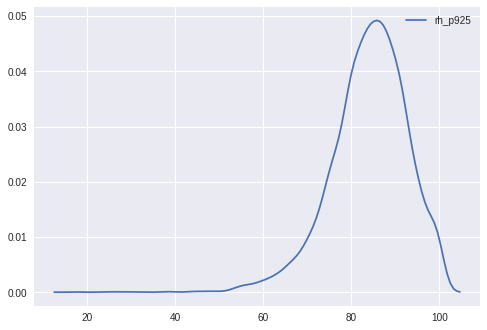

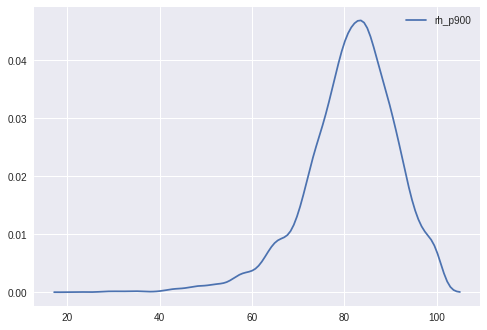

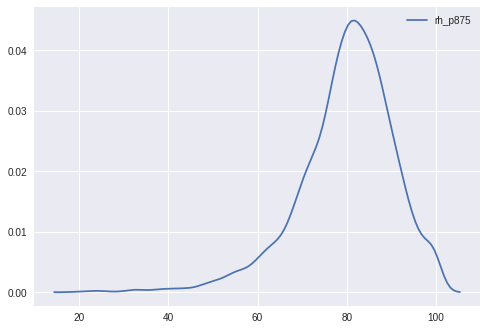

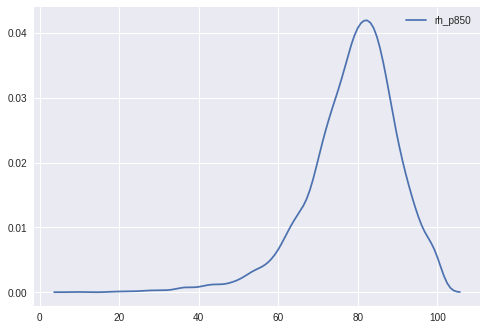

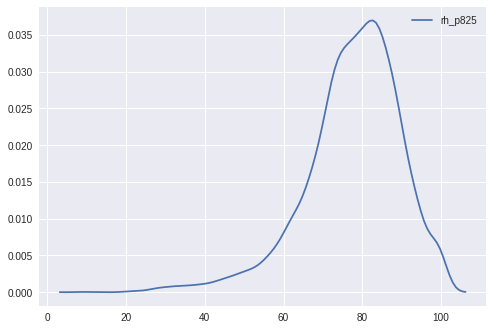

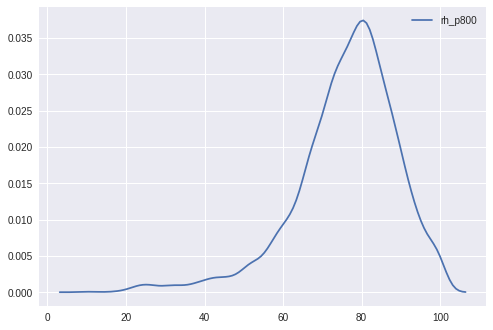

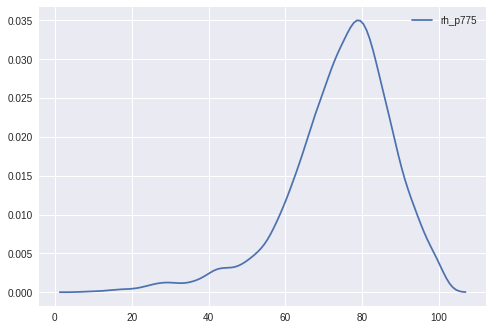

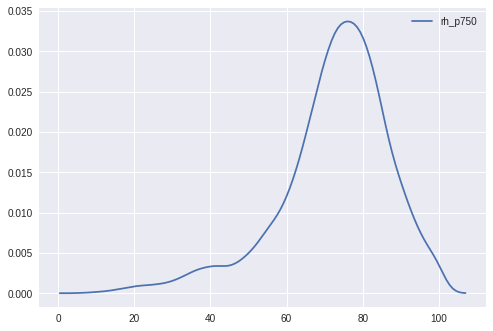

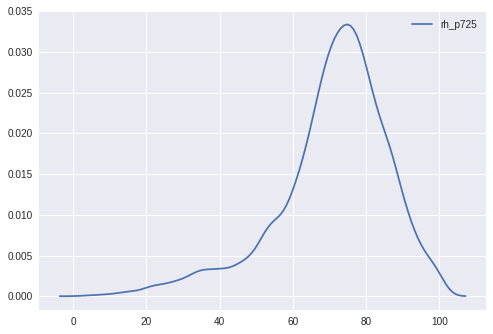

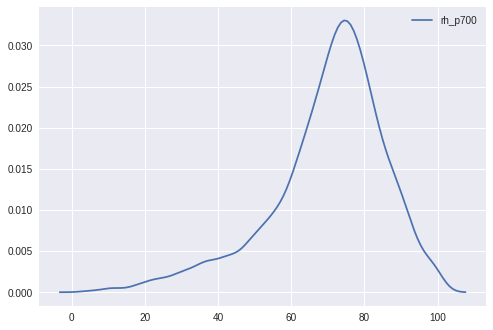

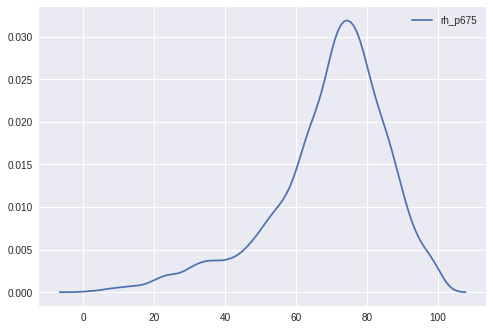

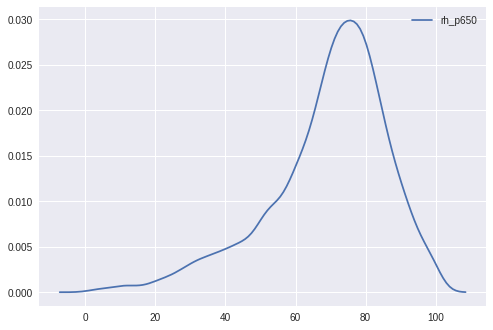

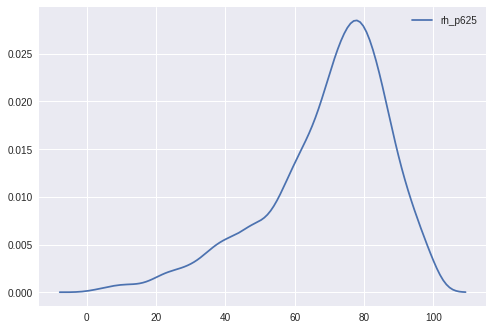

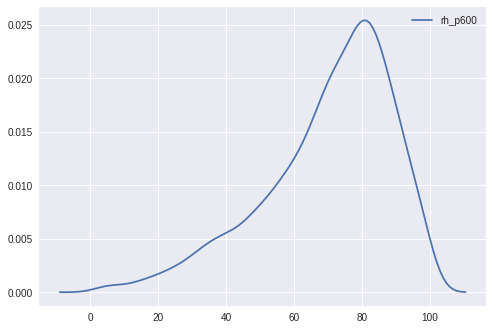

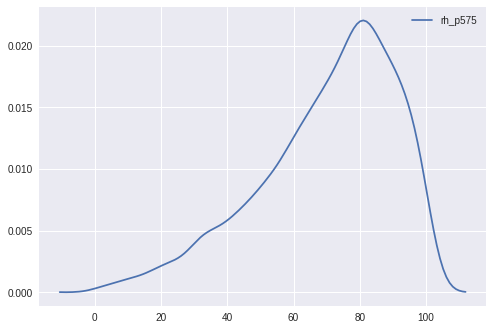

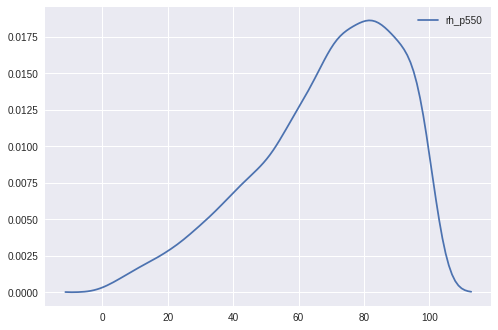

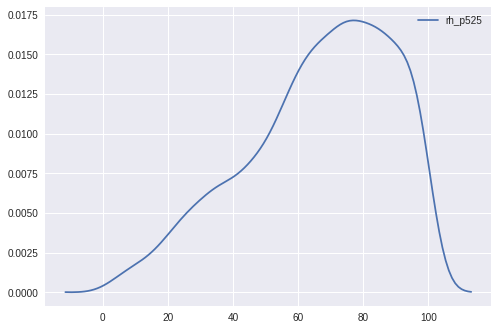

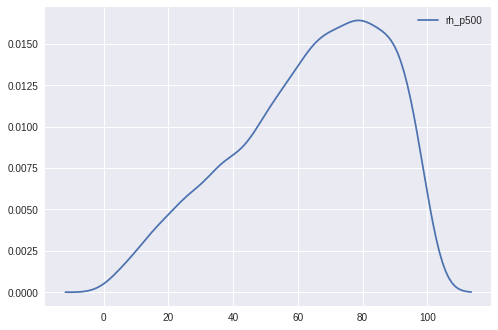

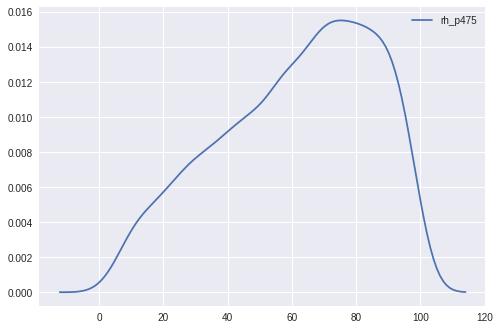

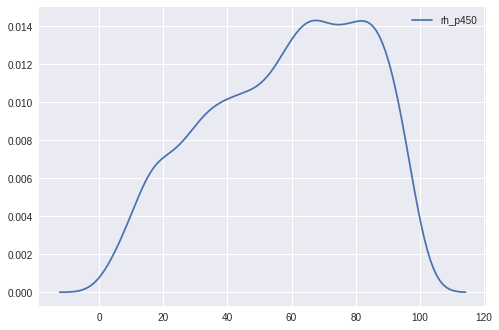

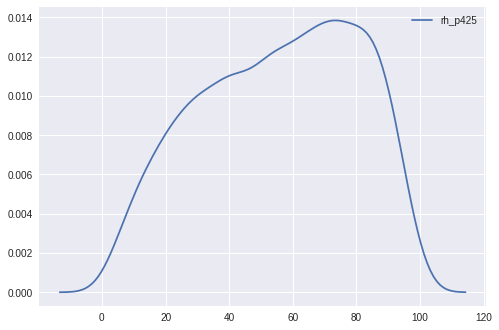

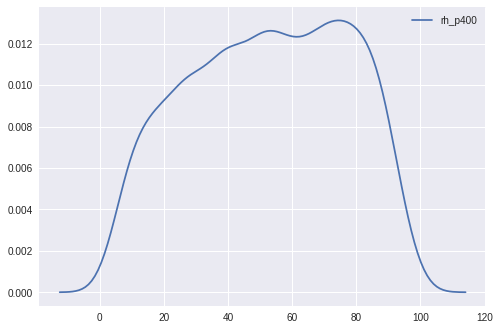

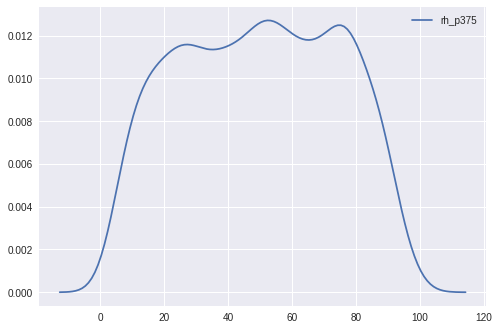

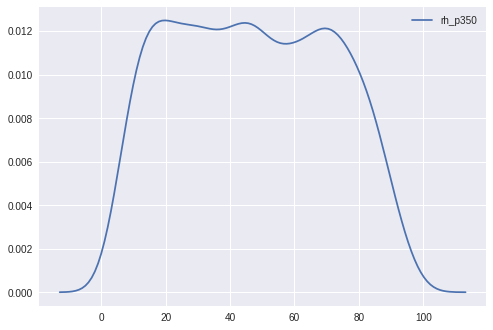

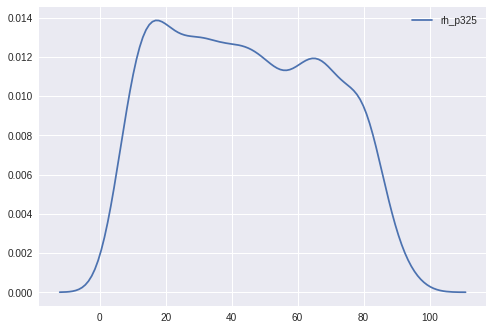

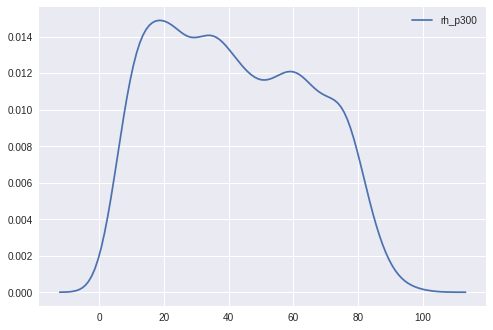

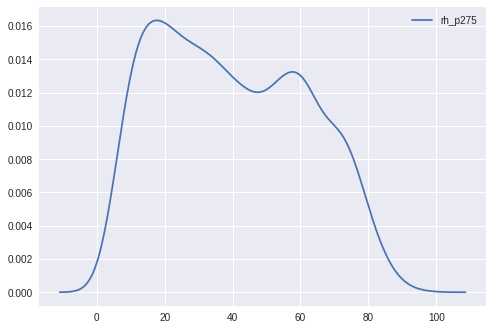

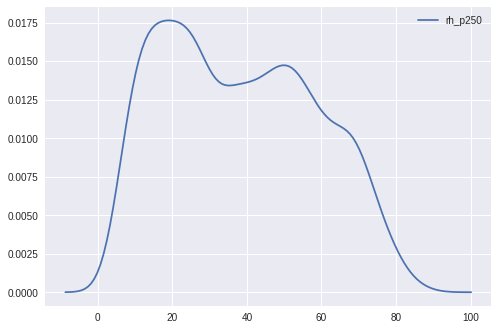

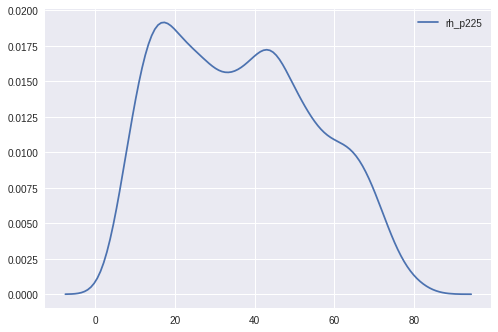

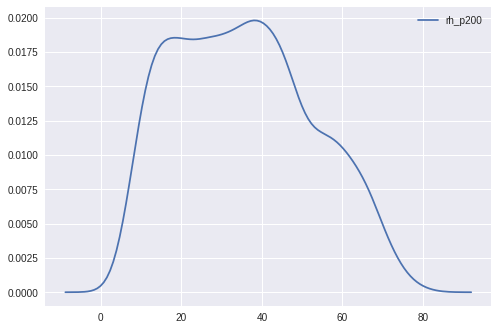

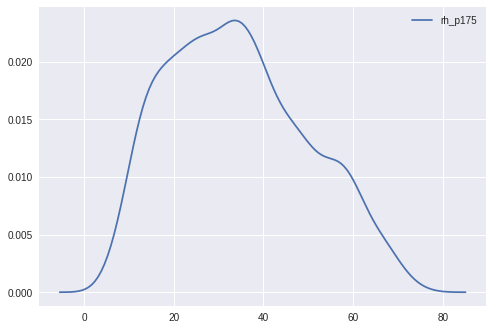

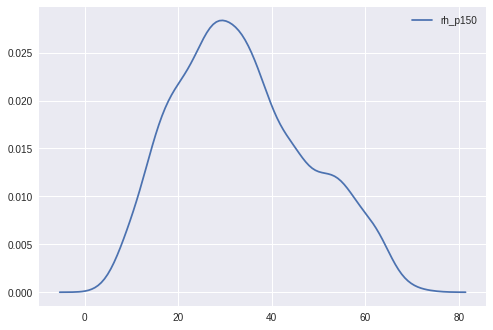

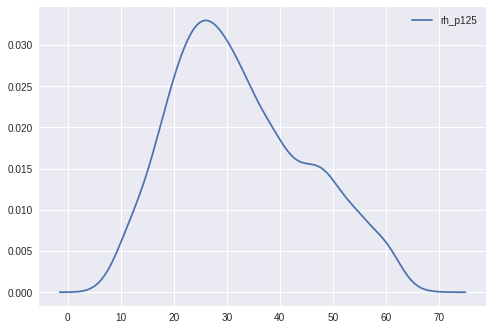

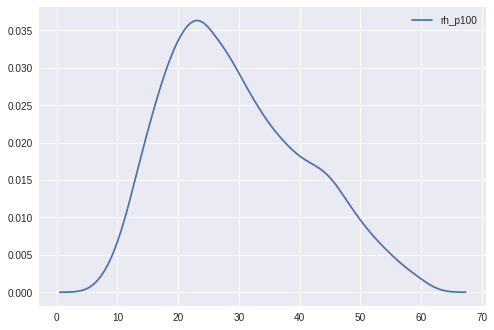

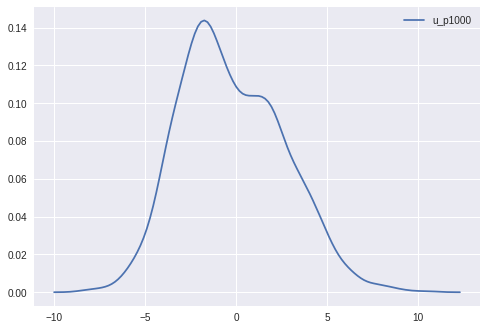

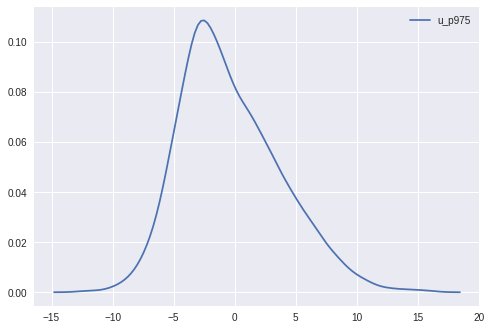

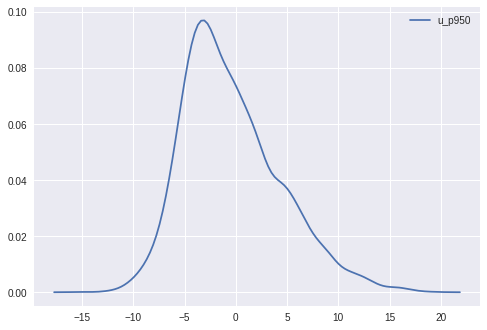

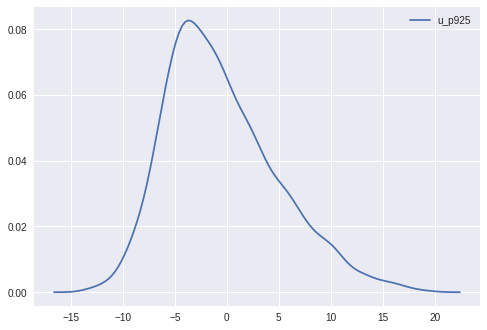

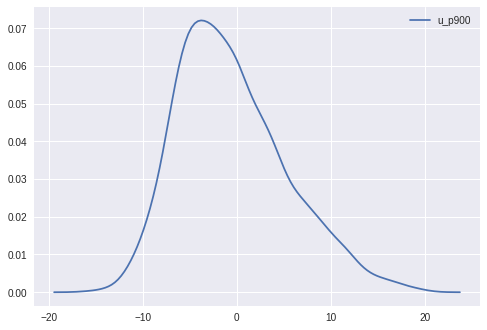

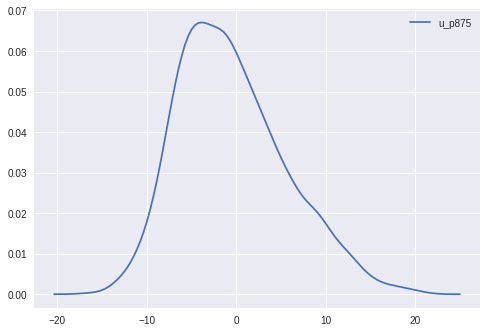

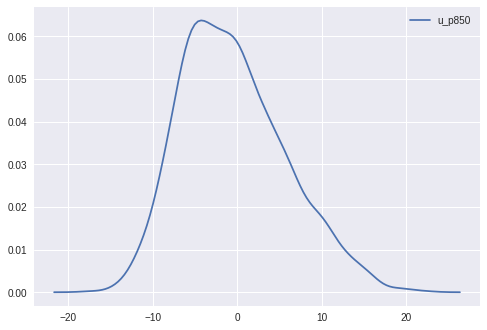

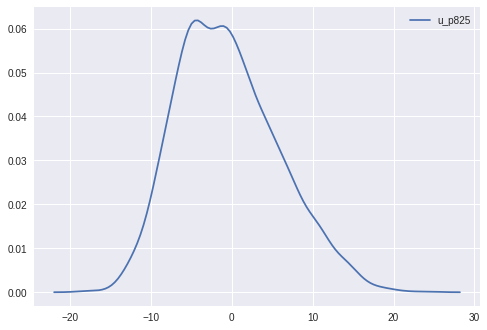

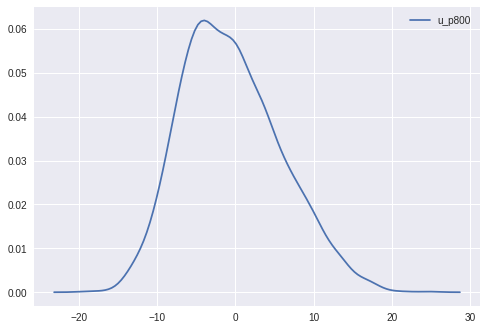

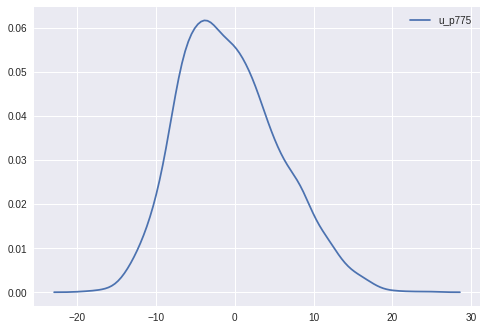

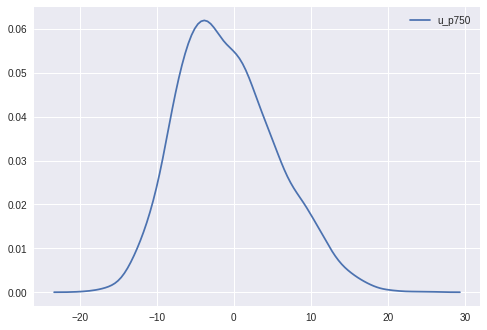

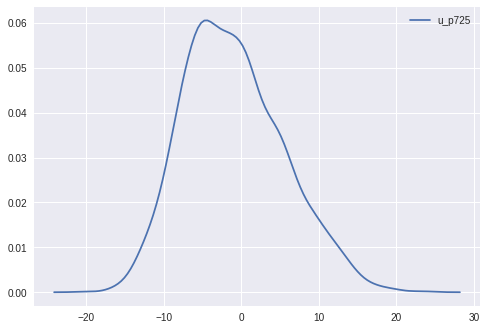

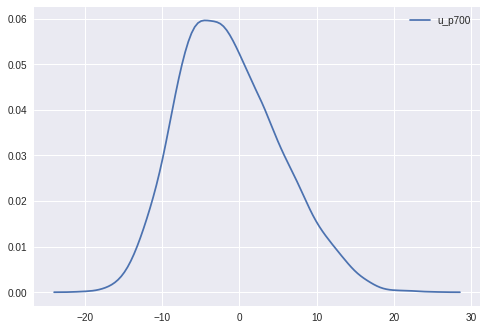

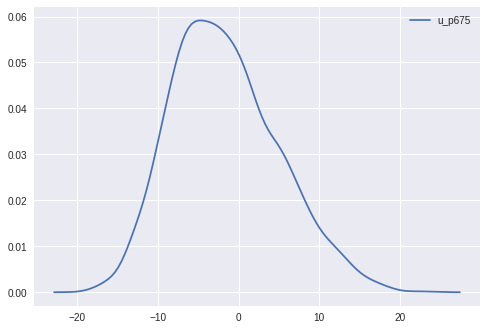

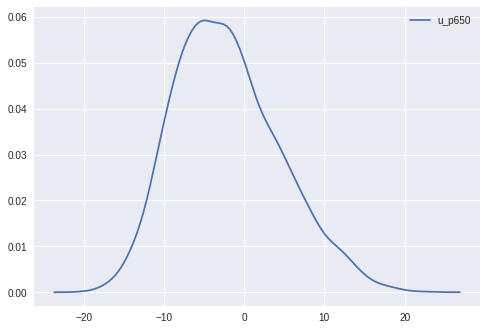

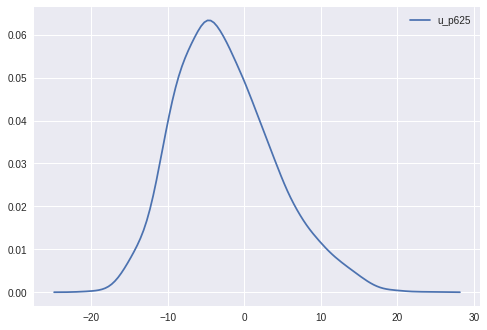

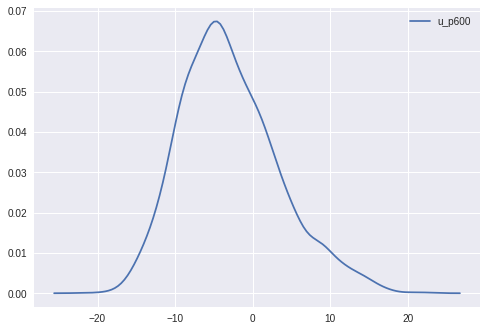

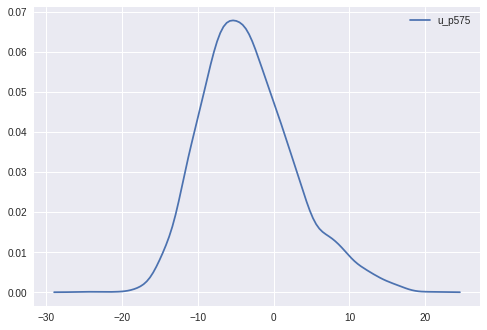

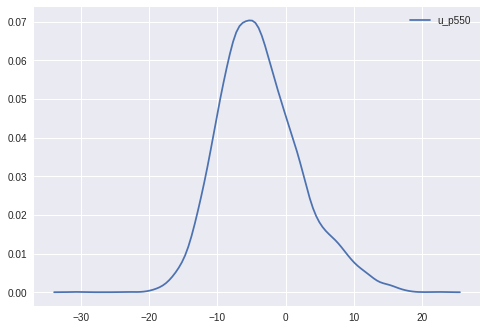

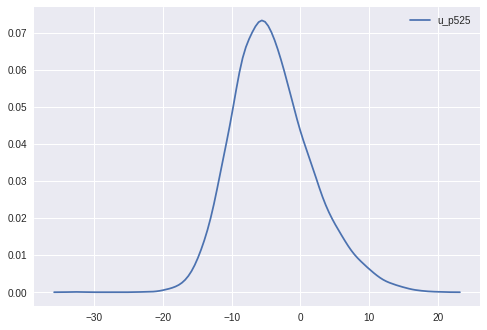

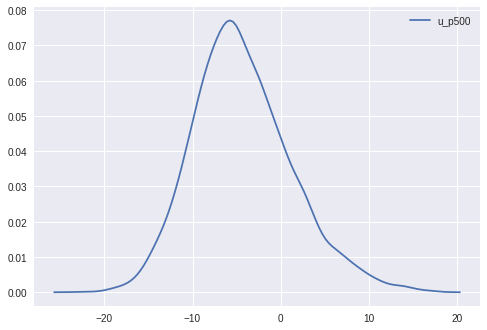

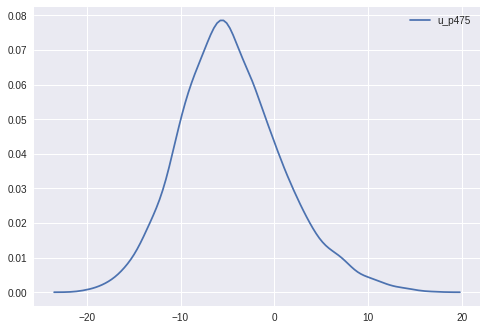

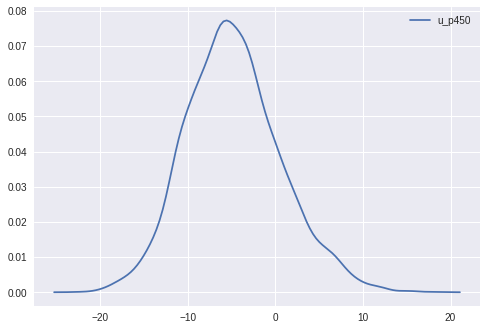

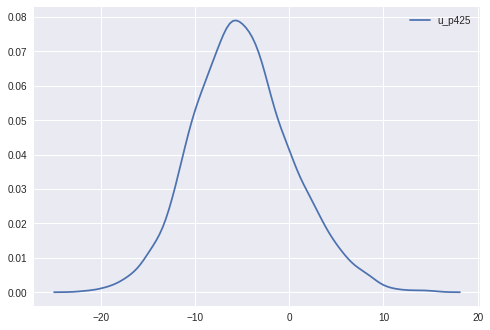

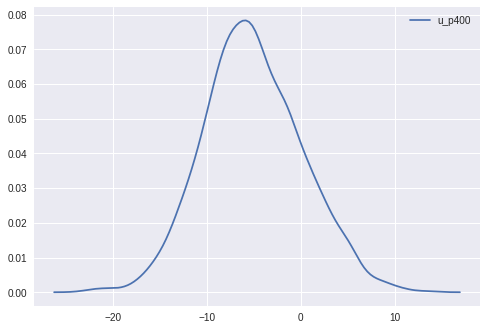

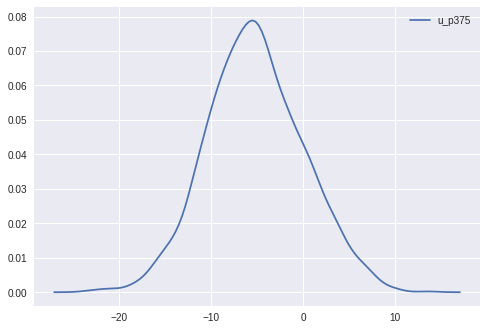

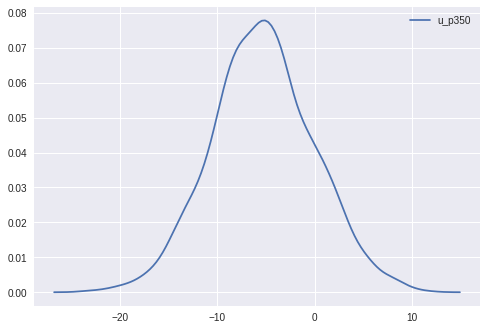

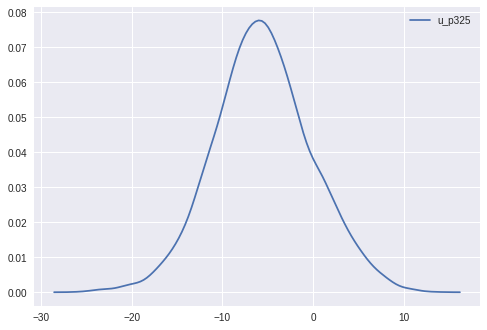

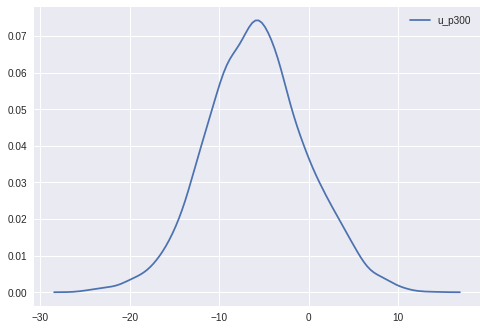

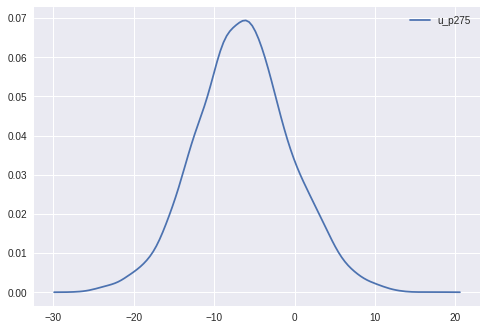

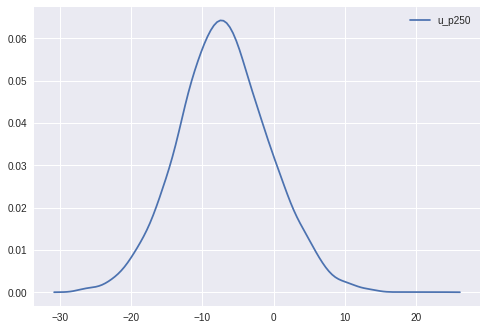

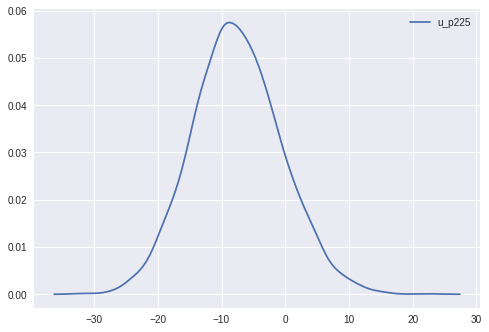

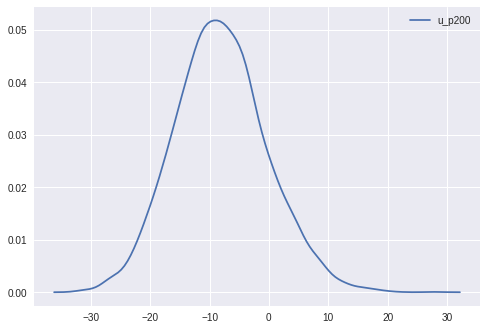

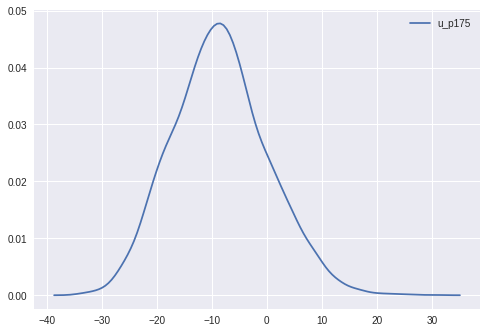

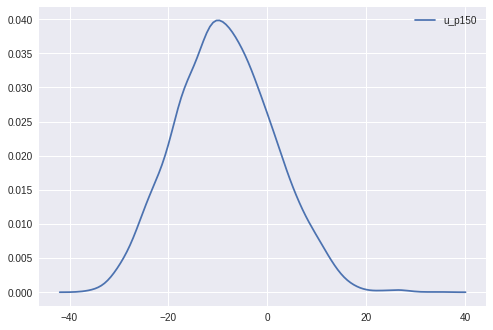

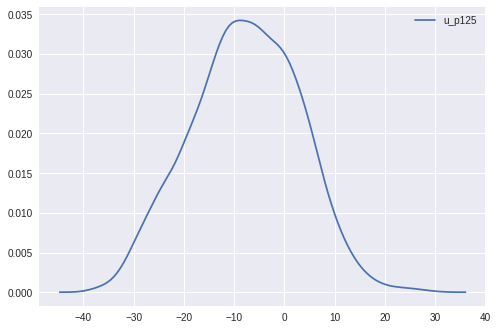

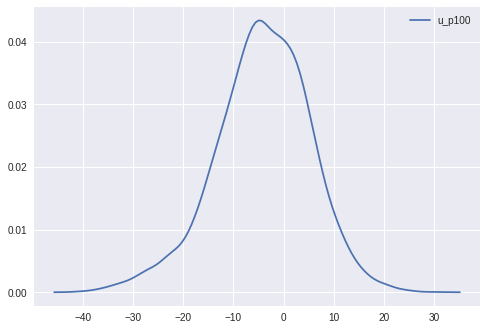

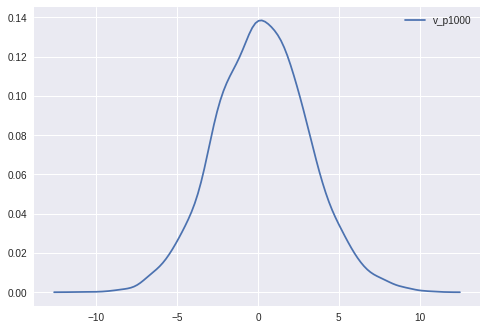

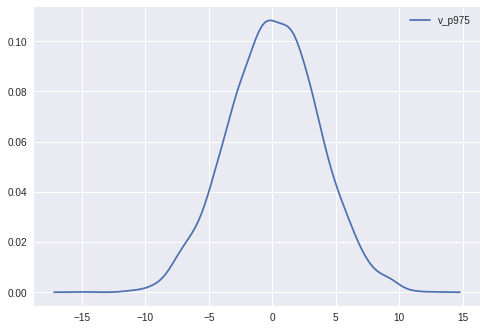

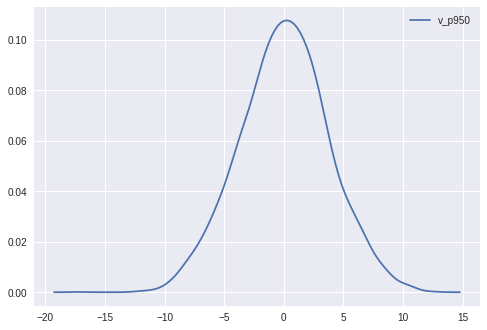

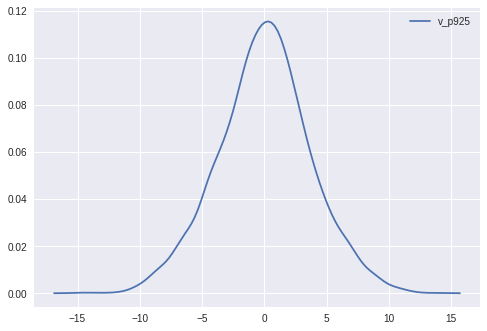

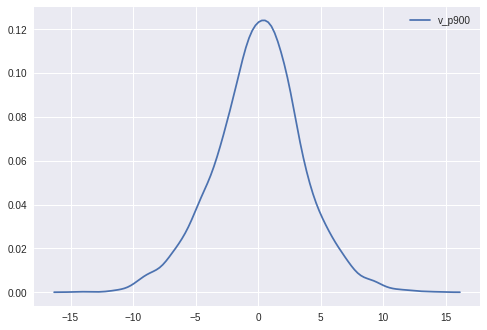

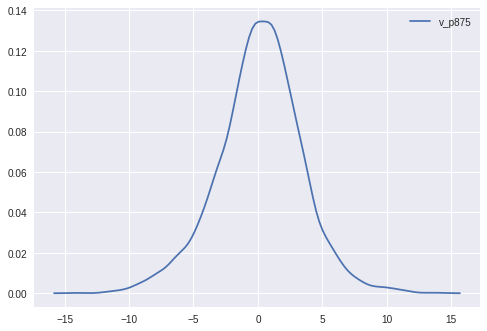

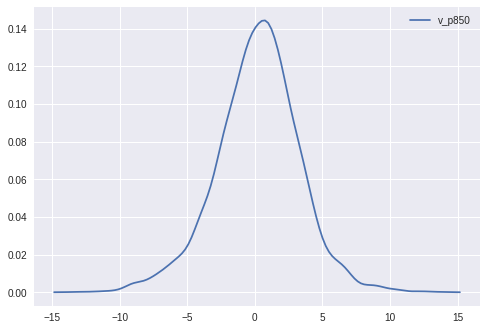

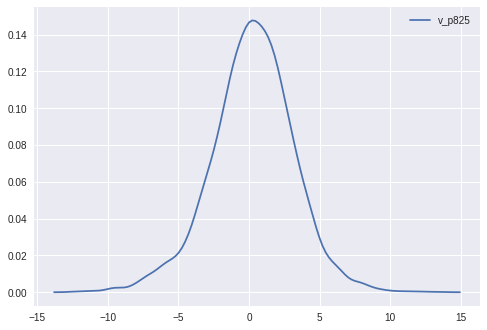

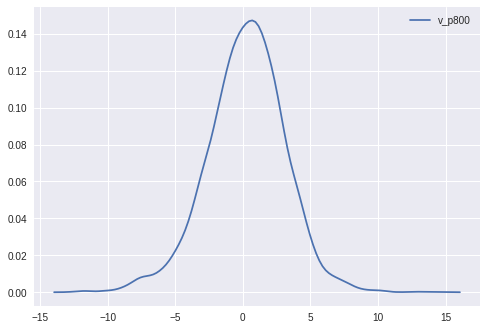

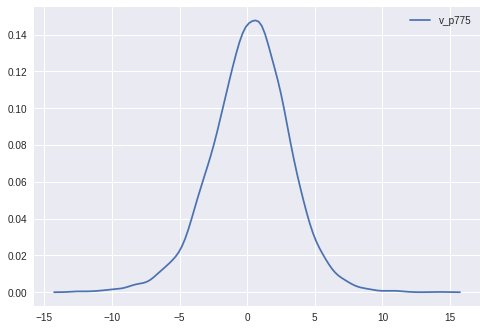

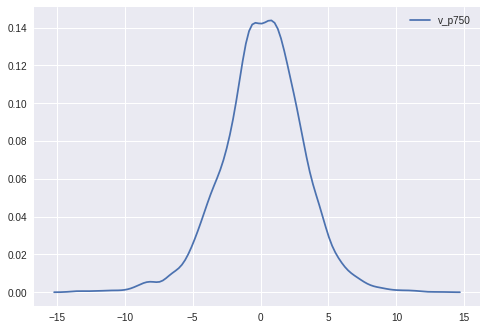

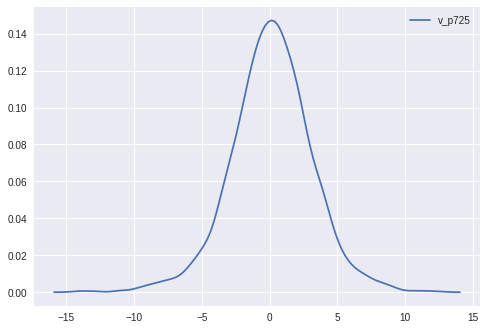

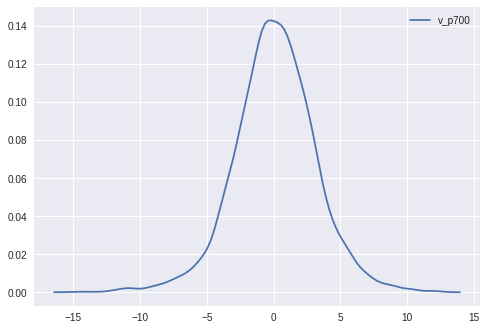

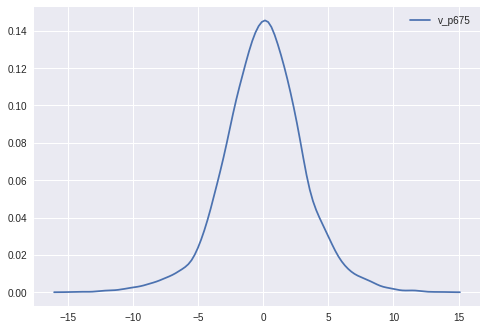

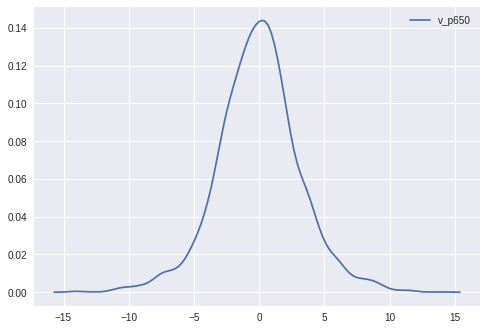

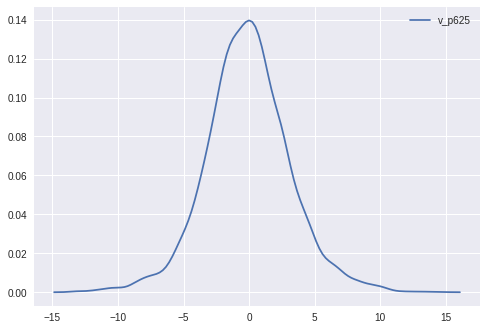

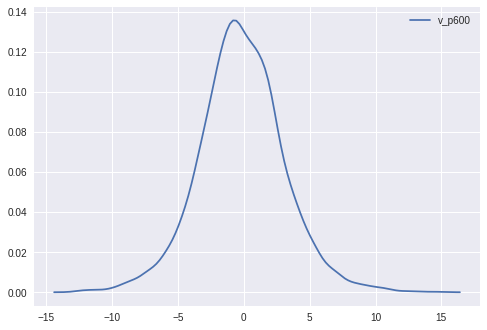

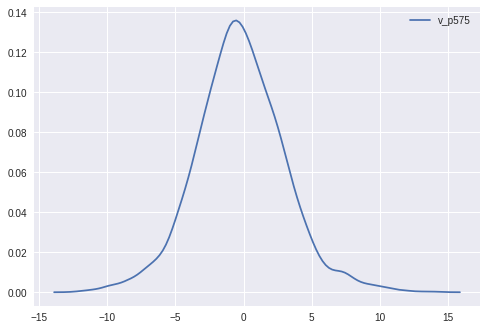

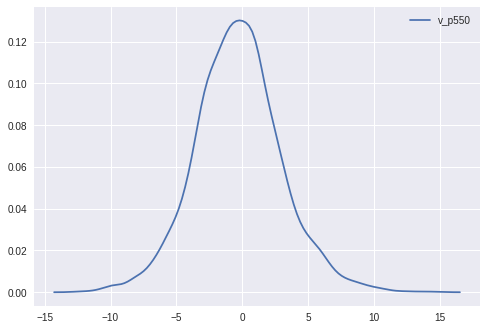

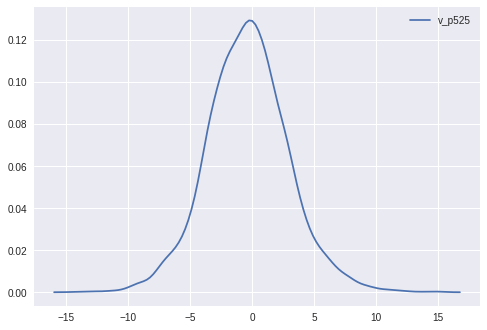

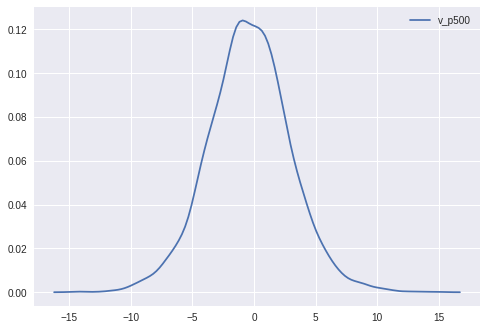

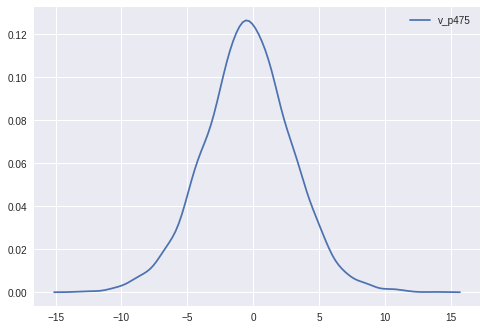

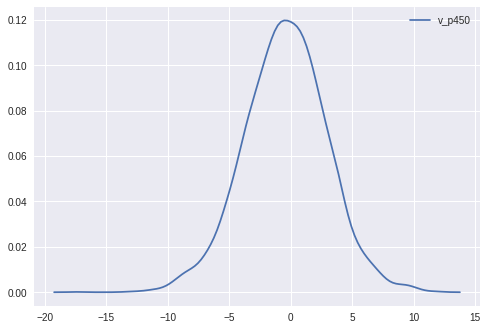

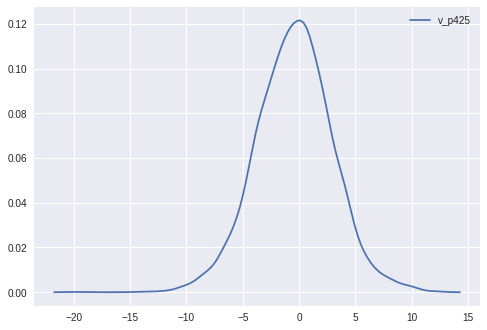

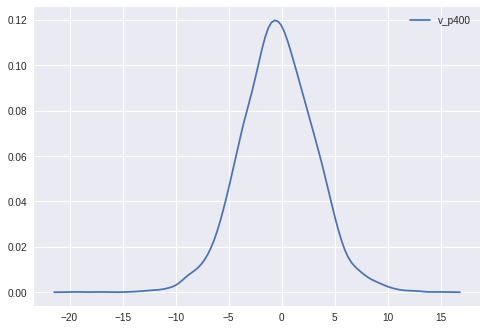

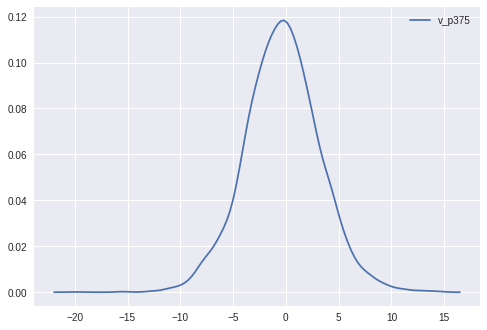

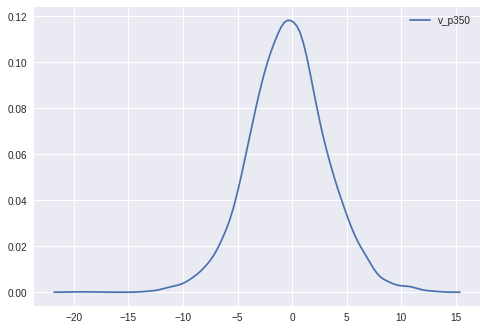

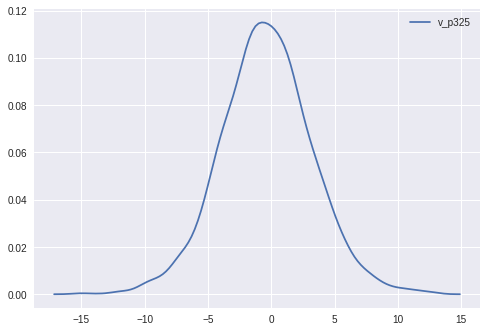

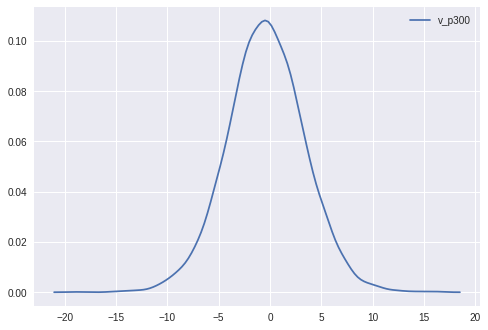

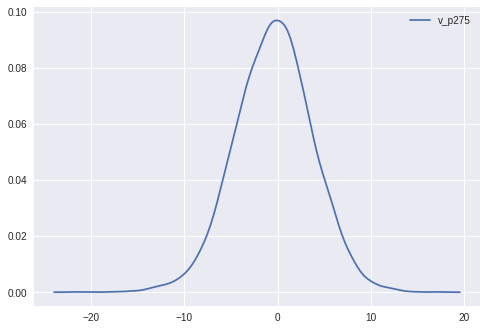

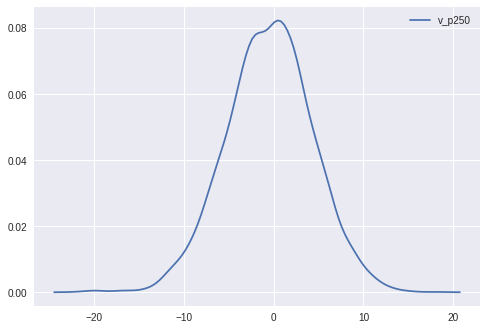

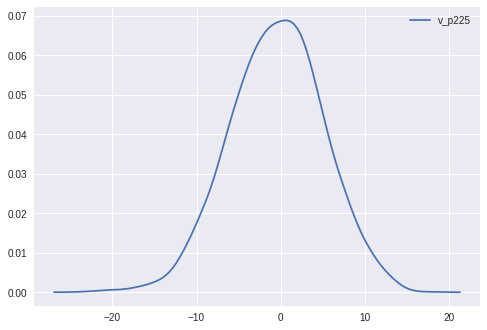

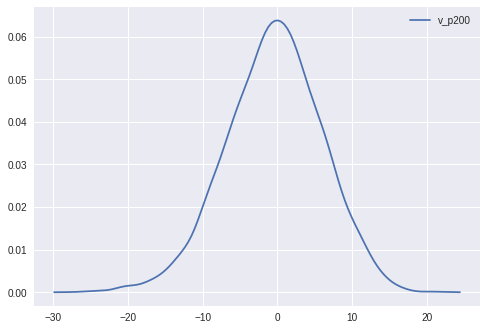

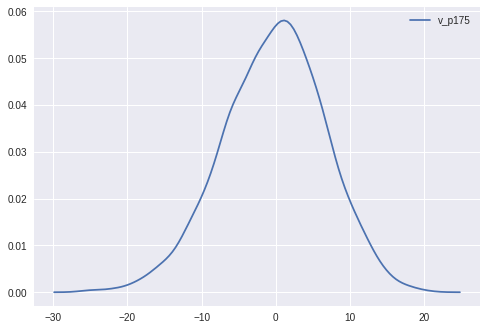

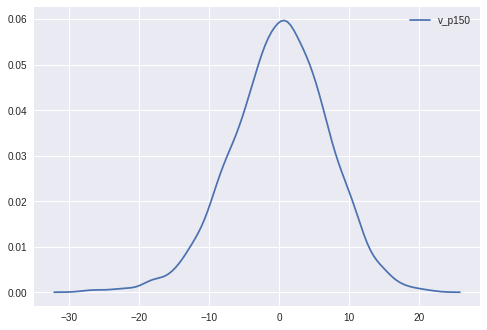

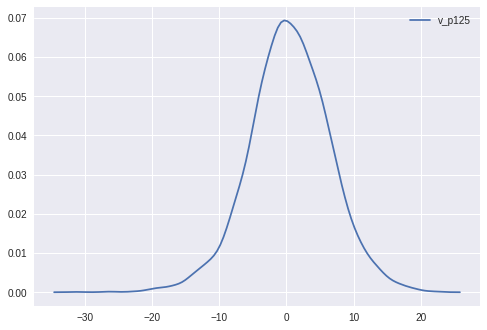

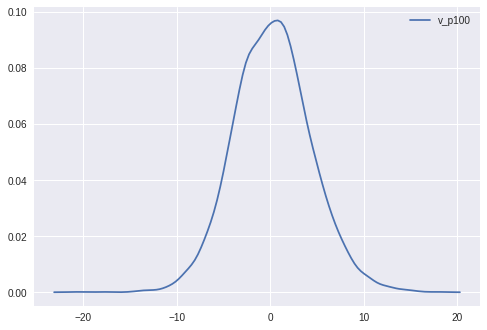

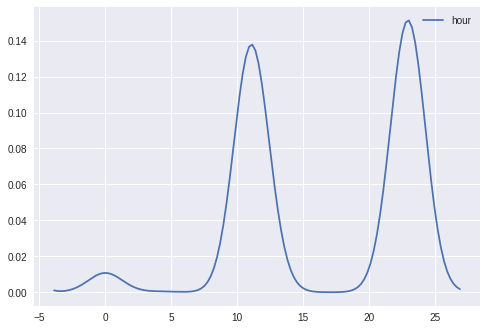

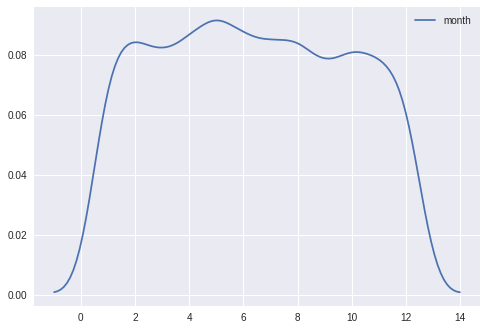

In [20]:
# KDE plot

for _col in list(df_no_nan):
  if _col != 'time':
    sns.kdeplot(df_no_nan[_col])
    plt.show()

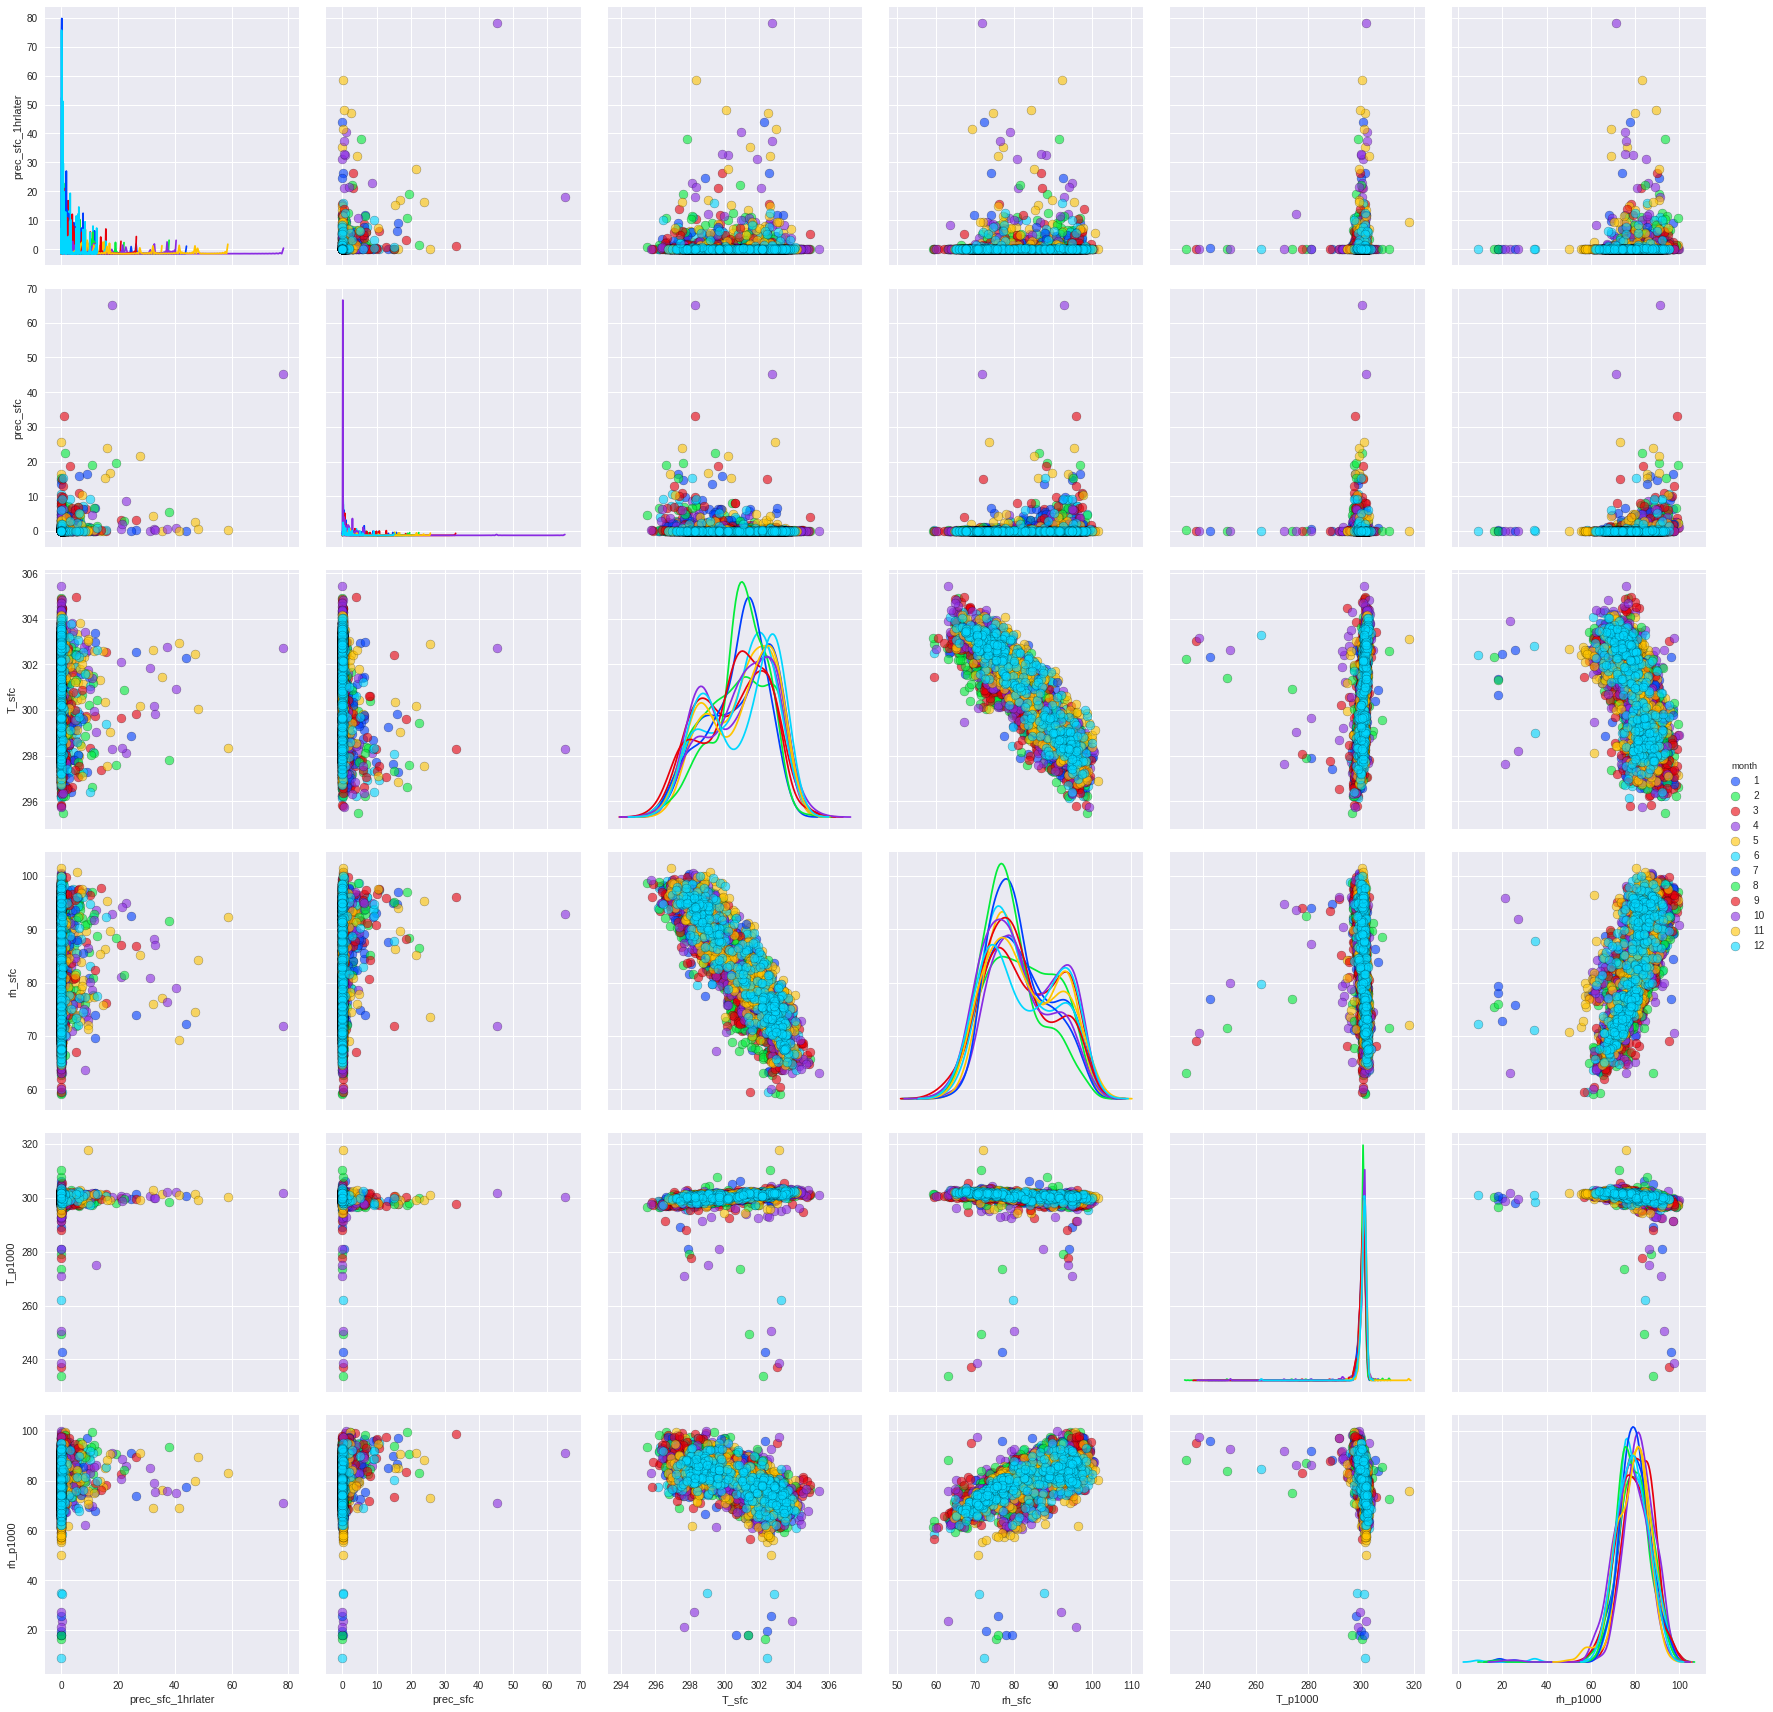

In [23]:
# Pair plots

sns_plot = sns.pairplot(df_no_nan.drop(columns=['time']),
                        vars = ['prec_sfc_1hrlater', 'prec_sfc', 'T_sfc', 'rh_sfc', 'T_p1000', 'rh_p1000'],
                        hue = 'month',
                        palette = 'bright',
                        diag_kind = 'kde',
                        plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                        size = 4)
plt.show()

In [0]:
# Save it to .csv

DIR = '/content/gdrive/My Drive/Colab Notebooks/Parameterization/data/stage-1_cleaned/'
f = DIR + 'twparmbeatmC1_no_nan.csv'

df_no_nan.to_csv(f)

In [0]:
# Generate cyclic hour - OBSOLETE
"""
hour24 = df_no_nan['time'].dt.hour.values
theta_hour = 2*np.pi * hour24/24
try:
  df_no_nan.insert(loc=0, column='hour_sin', value=np.sin(theta_hour))
except:
  print('Column hour_sin has already inserted.')
try:
  df_no_nan.insert(loc=0, column='hour_cos', value=np.cos(theta_hour))
except:
  print('Column hour_cos has already inserted.')
  
df_nn = df_no_nan.reset_index().drop(columns=['time','index']) # delete time column, reset index
df_nn
"""